# FAZENDO O TRATAMENTO DOS DADOS PARA GERAR GRÁFICOS DE VELOCIDADE DO VENTO E POTENCIA GERADA POR ESTAÇÃO

In [2]:
from pandas import pandas as pd

## PREPARANDO A TABELA DE DADOS AGRUPADOS

In [4]:
planilha = pd.read_excel('dados agrupados.xlsx', sheet_name=None)
tabelas = planilha.keys()

In [5]:
tabelas

dict_keys(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])

## PREPARANDO AS VARIÁVEIS LOCALMENTE

In [6]:
a2010 = pd.DataFrame()
a2011 = pd.DataFrame()
a2012 = pd.DataFrame()
a2013 = pd.DataFrame()
a2014 = pd.DataFrame()
a2015 = pd.DataFrame()
a2016 = pd.DataFrame()
a2017 = pd.DataFrame()
a2018 = pd.DataFrame()
a2019 = pd.DataFrame()
a2020 = pd.DataFrame()
data_frame = [a2010, a2011,a2012,a2013,a2014,a2015,a2016,a2017,a2018,a2019,a2020]

In [7]:
for i, a in zip(tabelas,range(11)):
    data_frame[a] = planilha[i]

## CRIANDO UMA TABELA ÚNICA COM TODAS AS FREQUÊNCIAS DAS ESTAÇÕES COM OS DADOS ORGANIZADOS

In [8]:
tabela = pd.concat(data_frame, axis=False)

In [9]:
tabela.sort_values('codigo',inplace=True)

In [10]:
tabela.describe

<bound method NDFrame.describe of     Unnamed: 0 regiao  uf                      estacao codigo   latitude  \
0            0     SE  MG                    BARBACENA   A502 -21.228889   
0            0     SE  MG                    BARBACENA   A502 -21.228373   
0            0     SE  MG                    BARBACENA   A502 -21.228373   
0            0     SE  MG                    BARBACENA   A502 -21.228889   
0            0     SE  MG                    BARBACENA   A502 -21.228889   
..         ...    ...  ..                          ...    ...        ...   
66          66     SE  MG  BELO HORIZONTE - CERCADINHO   F501 -19.980034   
59          59     SE  MG  BELO HORIZONTE - CERCADINHO   F501 -19.980000   
65          65     SE  MG  BELO HORIZONTE - CERCADINHO   F501 -19.980000   
54          54     SE  MG  BELO HORIZONTE - CERCADINHO   F501 -19.980000   
65          65     SE  MG  BELO HORIZONTE - CERCADINHO   F501 -19.980000   

    longitude  altitude    fundacao       [0,2)  ... 

In [11]:
codigos = pd.DataFrame(columns=['codigo','quatidade'])
for i in data_frame[10]['codigo']:
    n = tabela['codigo'].loc[tabela['codigo']==i].count()
    codigos.loc[len(codigos)] = [i,n]

In [ ]:
data_frame.col

## CALCULANDO AS MÉDIAS

In [47]:
tabela.columns

Index(['Unnamed: 0', 'regiao', 'uf', 'estacao', 'codigo', 'latitude',
       'longitude', 'altitude', 'fundacao', '[0,2)', '[2,3)', '[3,4)', '[4,5)',
       '[5,6)', '[6,7)', '[7,8)', '[8,9)', '[9,10)', '[10,11)', '[11,12)',
       '[12,13)', '[13,14)', '[14,15)', '[15,16)', '[16,17)', '[17,18)',
       '[18,19)', '[19,20)', '[20,>)'],
      dtype='object')

In [48]:
codigos.columns

Index(['codigo', 'quatidade'], dtype='object')

In [49]:
media = tabela[['[0,2)', '[2,3)', '[3,4)', '[4,5)',
       '[5,6)', '[6,7)', '[7,8)', '[8,9)', '[9,10)', '[10,11)', '[11,12)',
       '[12,13)', '[13,14)', '[14,15)', '[15,16)', '[16,17)', '[17,18)',
       '[18,19)', '[19,20)', '[20,>)']].loc[tabela['codigo']=='A502'].mean()

In [50]:
medias = pd.DataFrame(columns=['codigo','[0,2)', '[2,3)', '[3,4)', '[4,5)',
       '[5,6)', '[6,7)', '[7,8)', '[8,9)', '[9,10)', '[10,11)', '[11,12)',
       '[12,13)', '[13,14)', '[14,15)', '[15,16)', '[16,17)', '[17,18)',
       '[18,19)', '[19,20)', '[20,>)'])


In [51]:
for c in codigos['codigo']:
    lista = [c]
    media = tabela[['[0,2)', '[2,3)', '[3,4)', '[4,5)',
       '[5,6)', '[6,7)', '[7,8)', '[8,9)', '[9,10)', '[10,11)', '[11,12)',
       '[12,13)', '[13,14)', '[14,15)', '[15,16)', '[16,17)', '[17,18)',
       '[18,19)', '[19,20)', '[20,>)']].loc[tabela['codigo']==c].mean()

    for i in media:
        lista.append(i)

    medias.loc[len(medias)] = lista

    

## SALVANDO AS TABELAS 'medias' E 'codigos' EM UM NOVO ARQUIVO EXCEL

In [55]:
salvarSheet = pd.ExcelWriter('dados limpos.xlsx' , engine='xlsxwriter')


In [56]:
medias.to_excel(salvarSheet,sheet_name='medias')

In [57]:
codigos.to_excel(salvarSheet,sheet_name='codigos')

## VISUALIZAÇÃO

In [58]:
import matplotlib.pyplot as plt


In [59]:
medias.columns

Index(['codigo', '[0,2)', '[2,3)', '[3,4)', '[4,5)', '[5,6)', '[6,7)', '[7,8)',
       '[8,9)', '[9,10)', '[10,11)', '[11,12)', '[12,13)', '[13,14)',
       '[14,15)', '[15,16)', '[16,17)', '[17,18)', '[18,19)', '[19,20)',
       '[20,>)'],
      dtype='object')

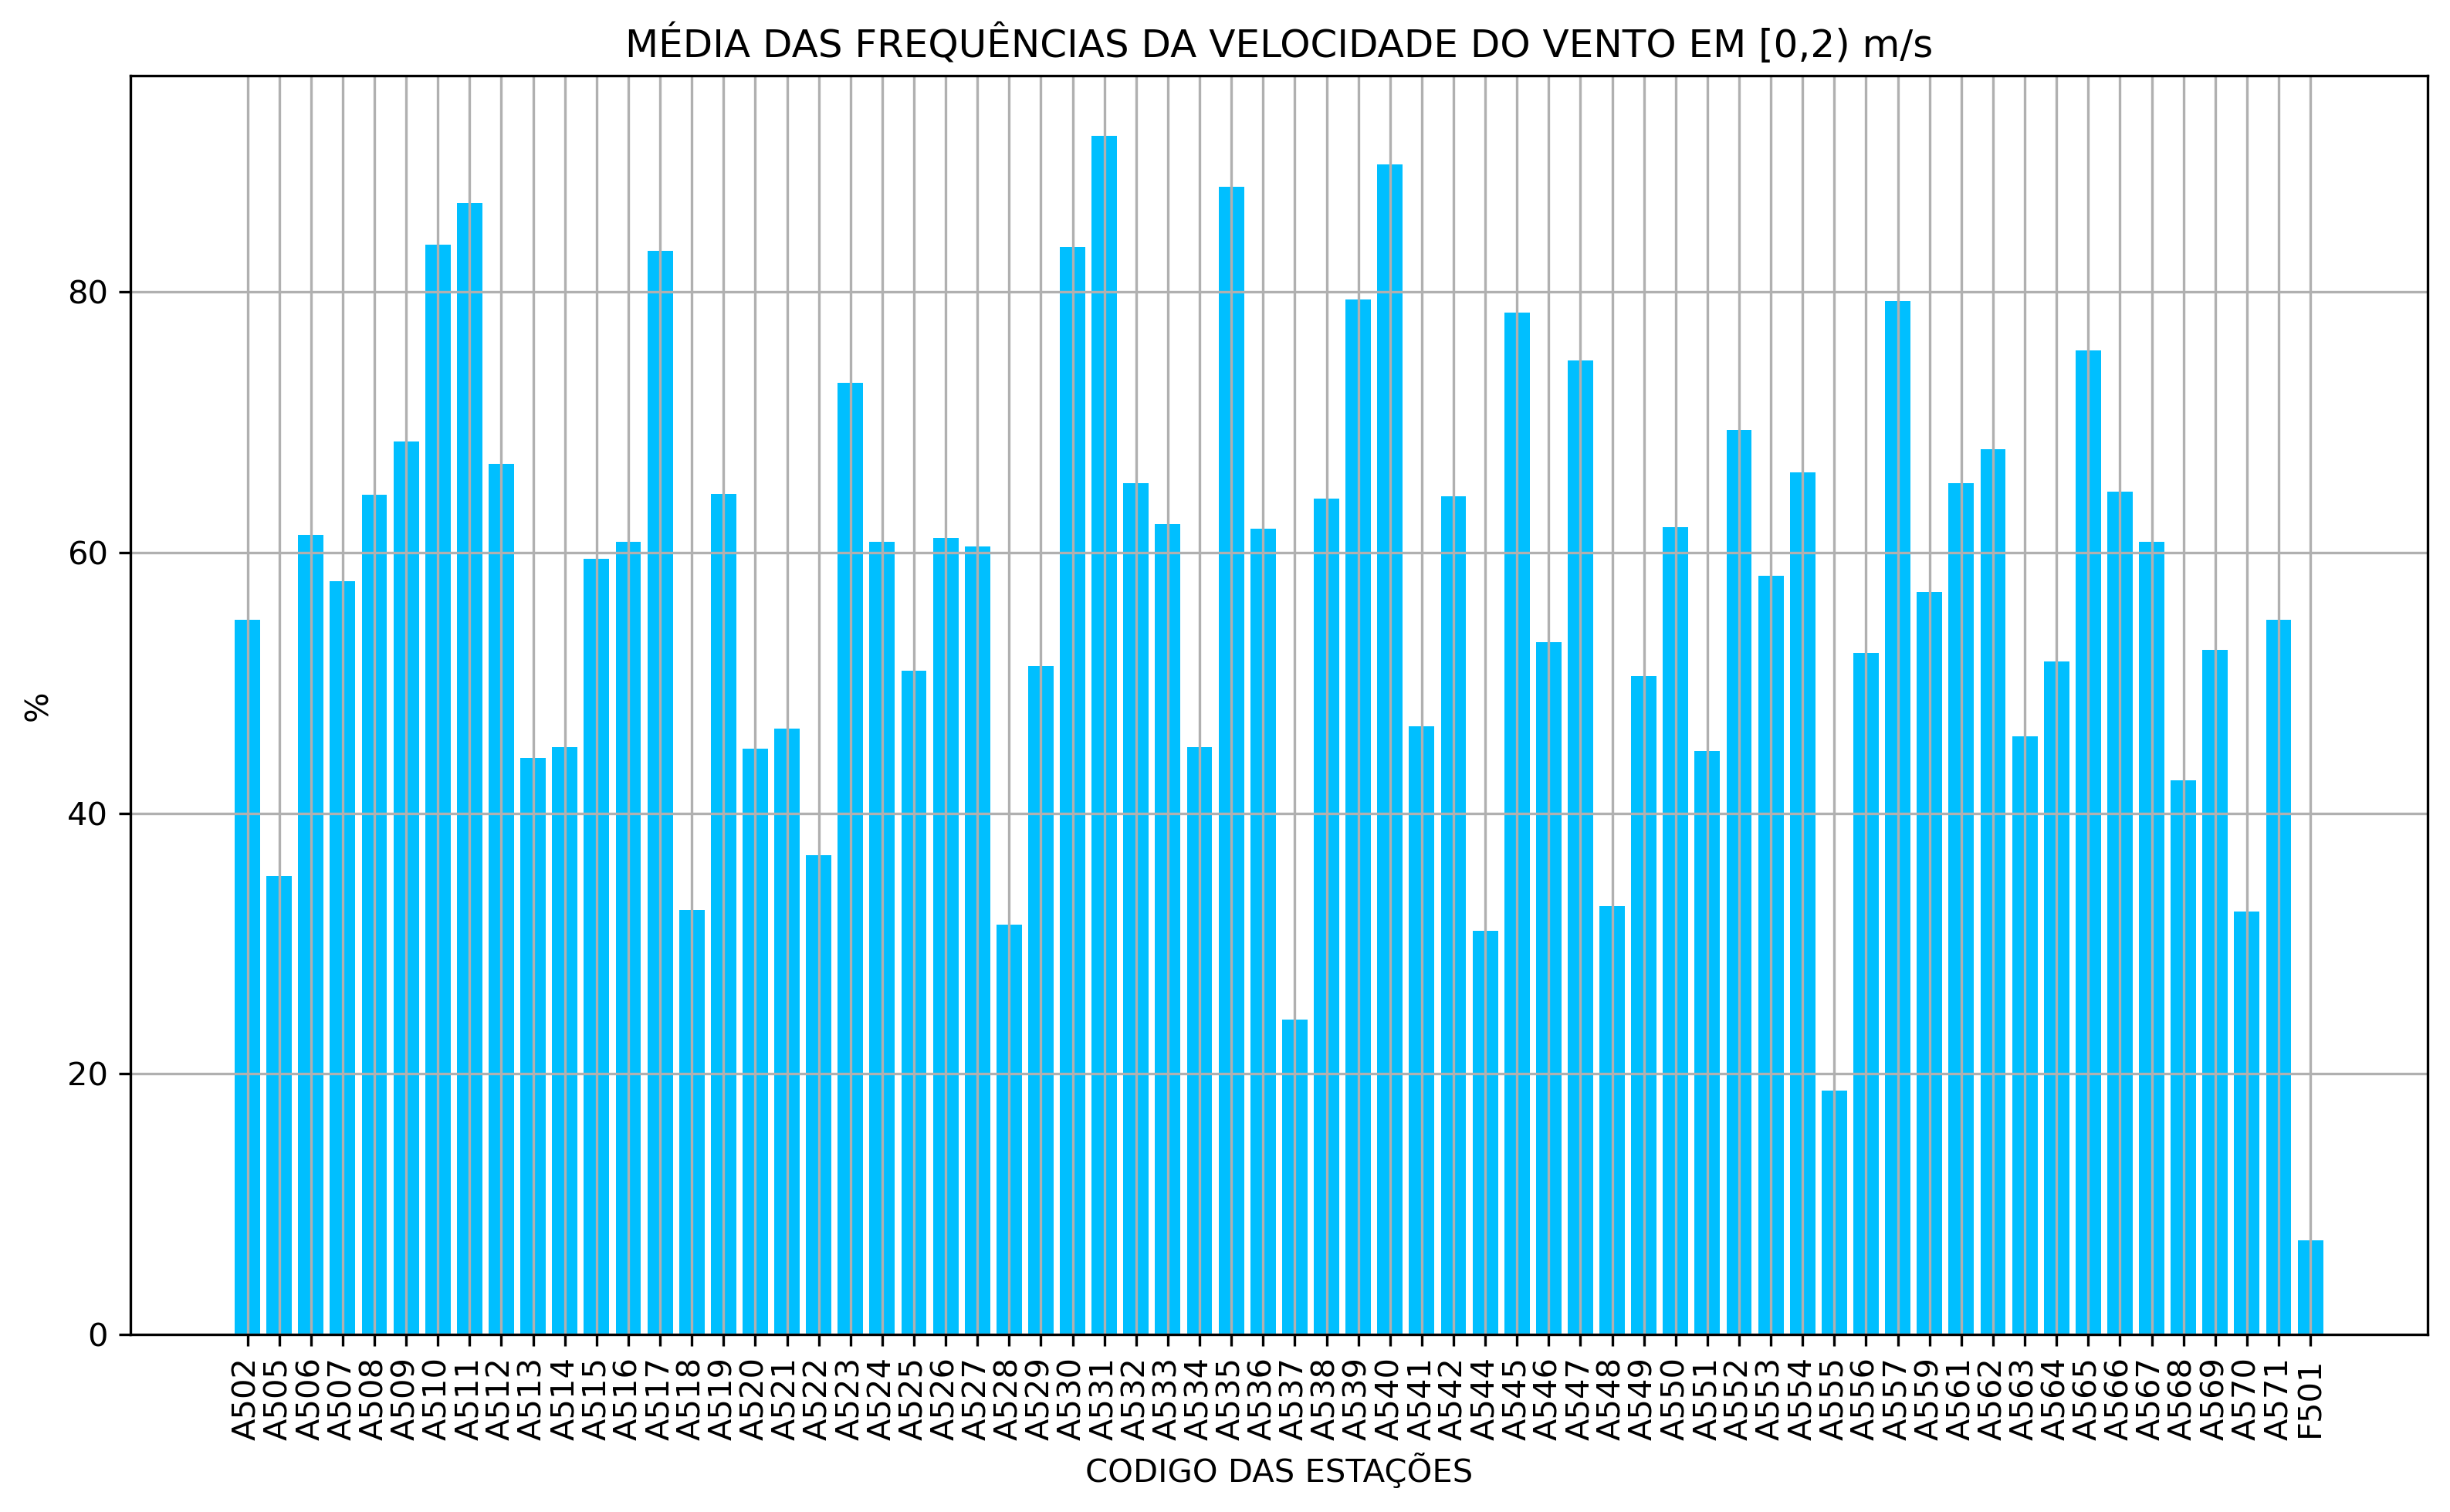

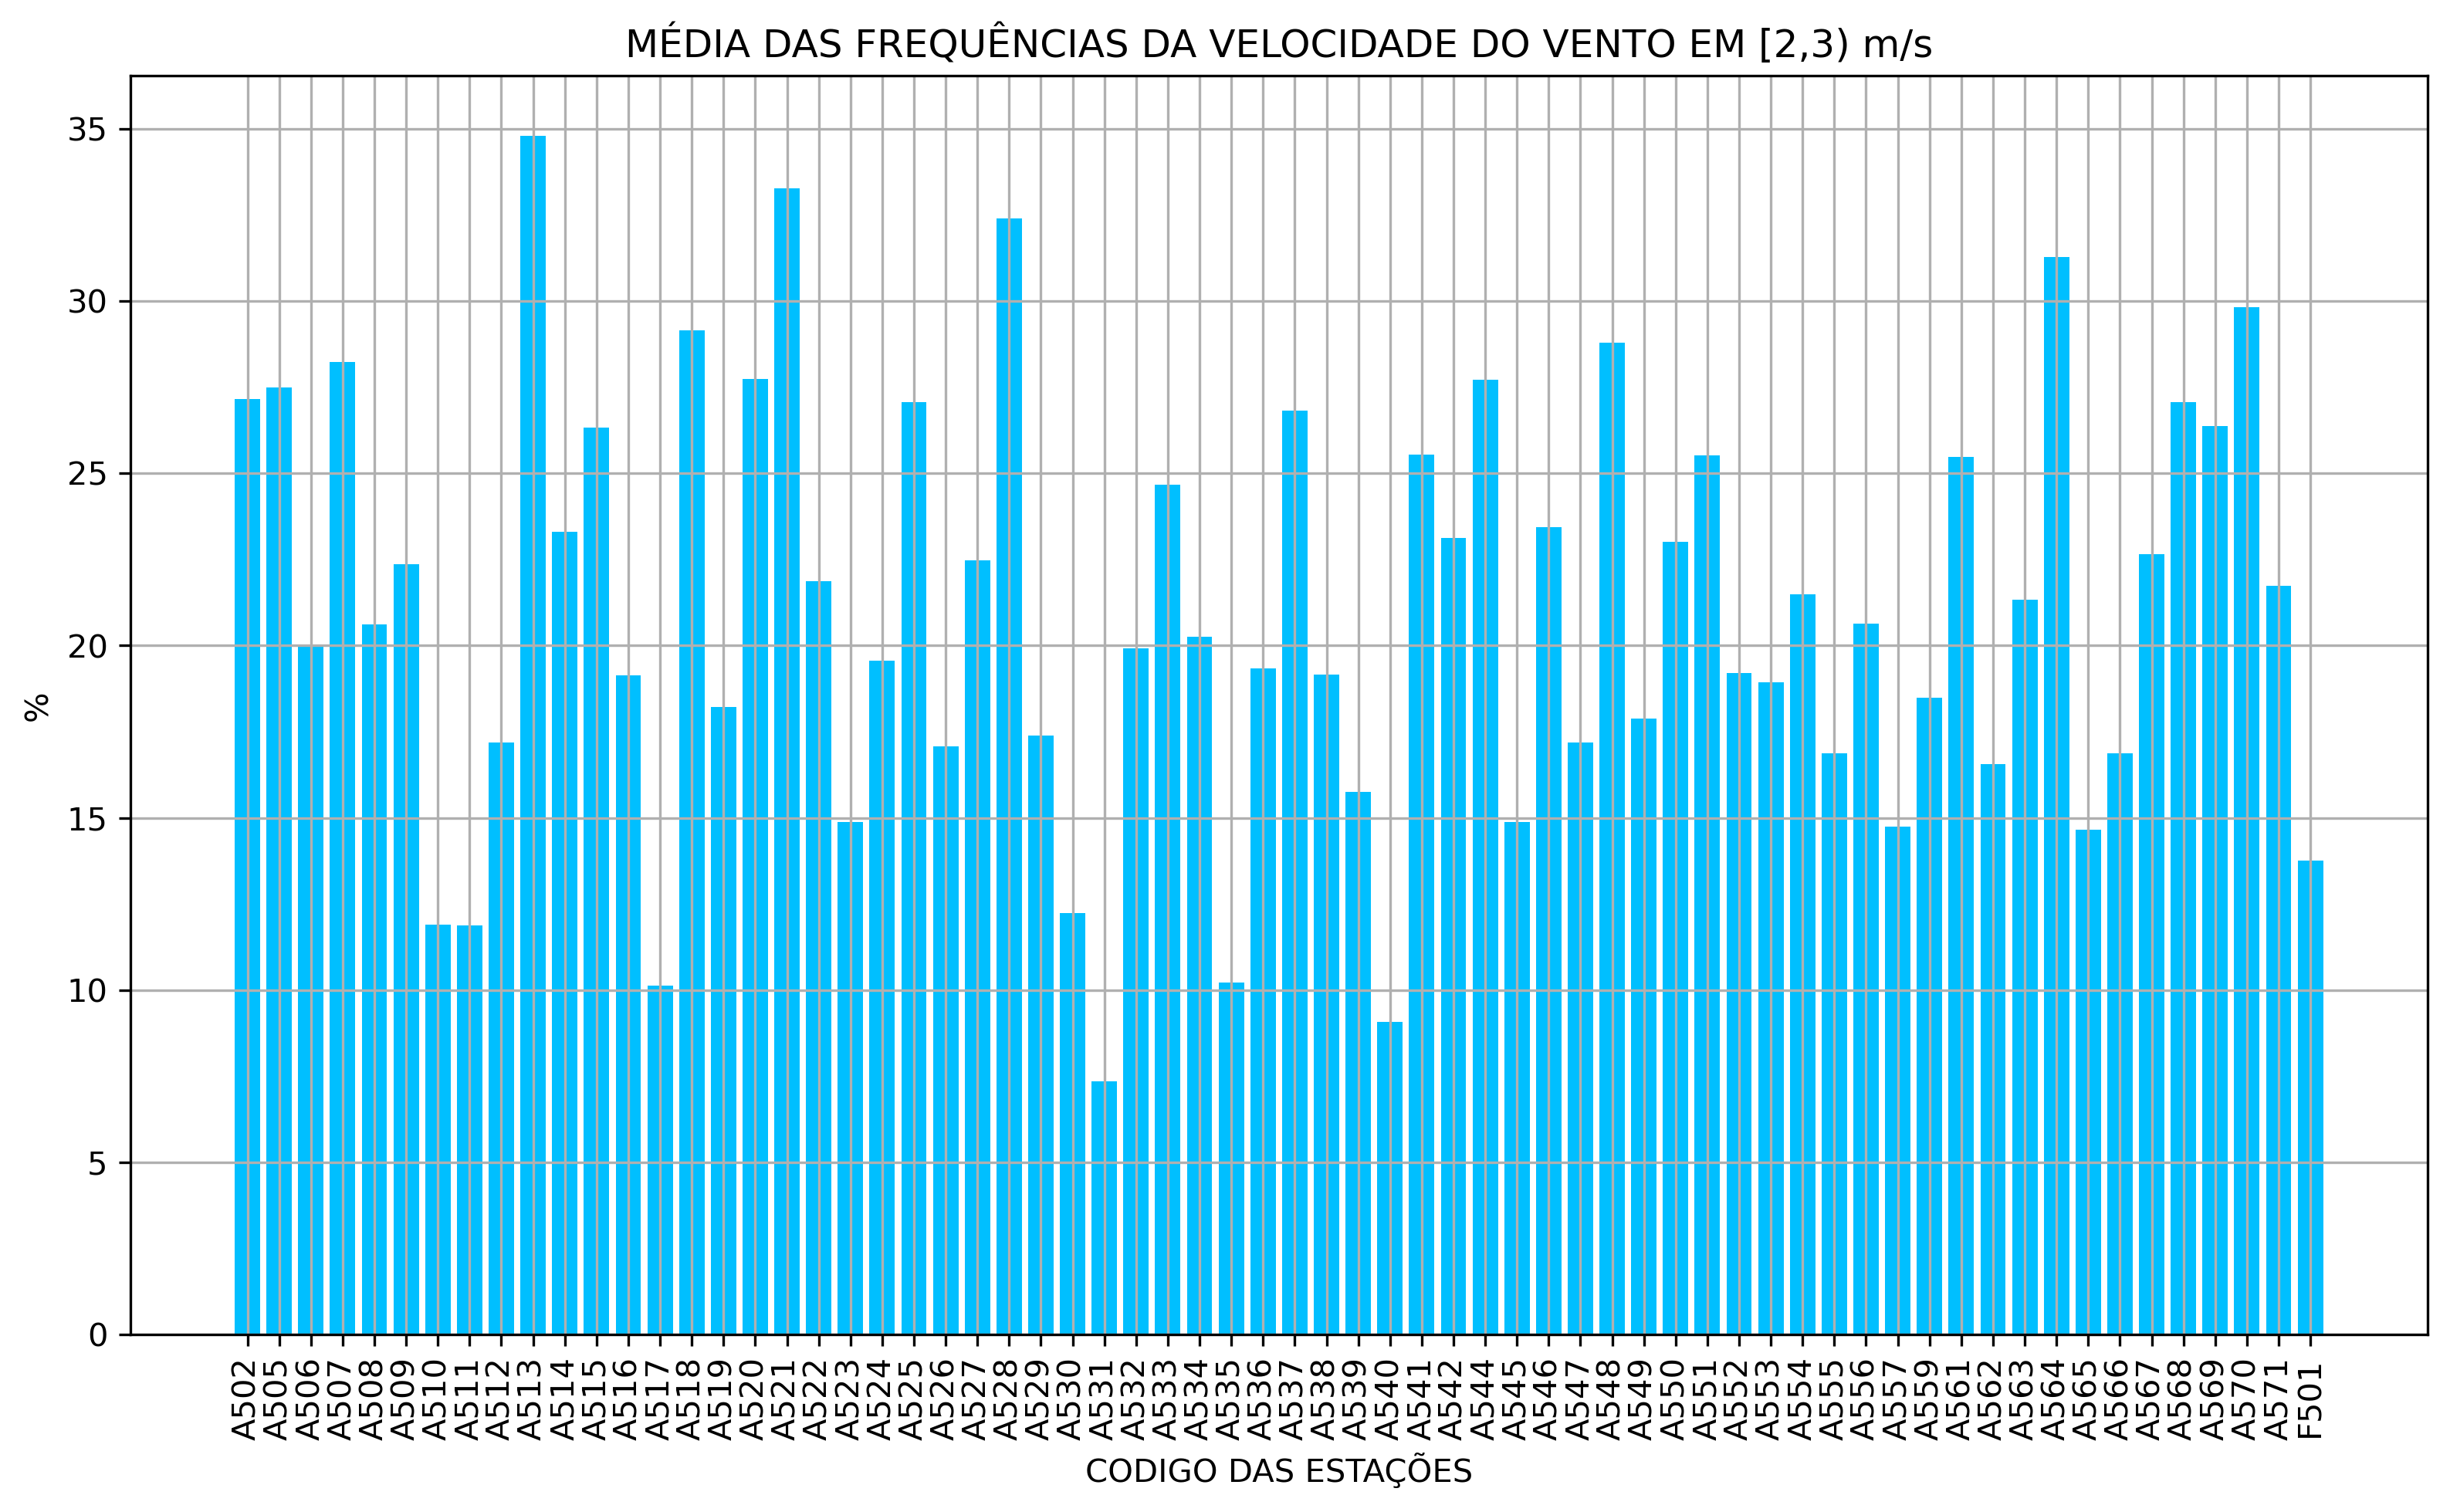

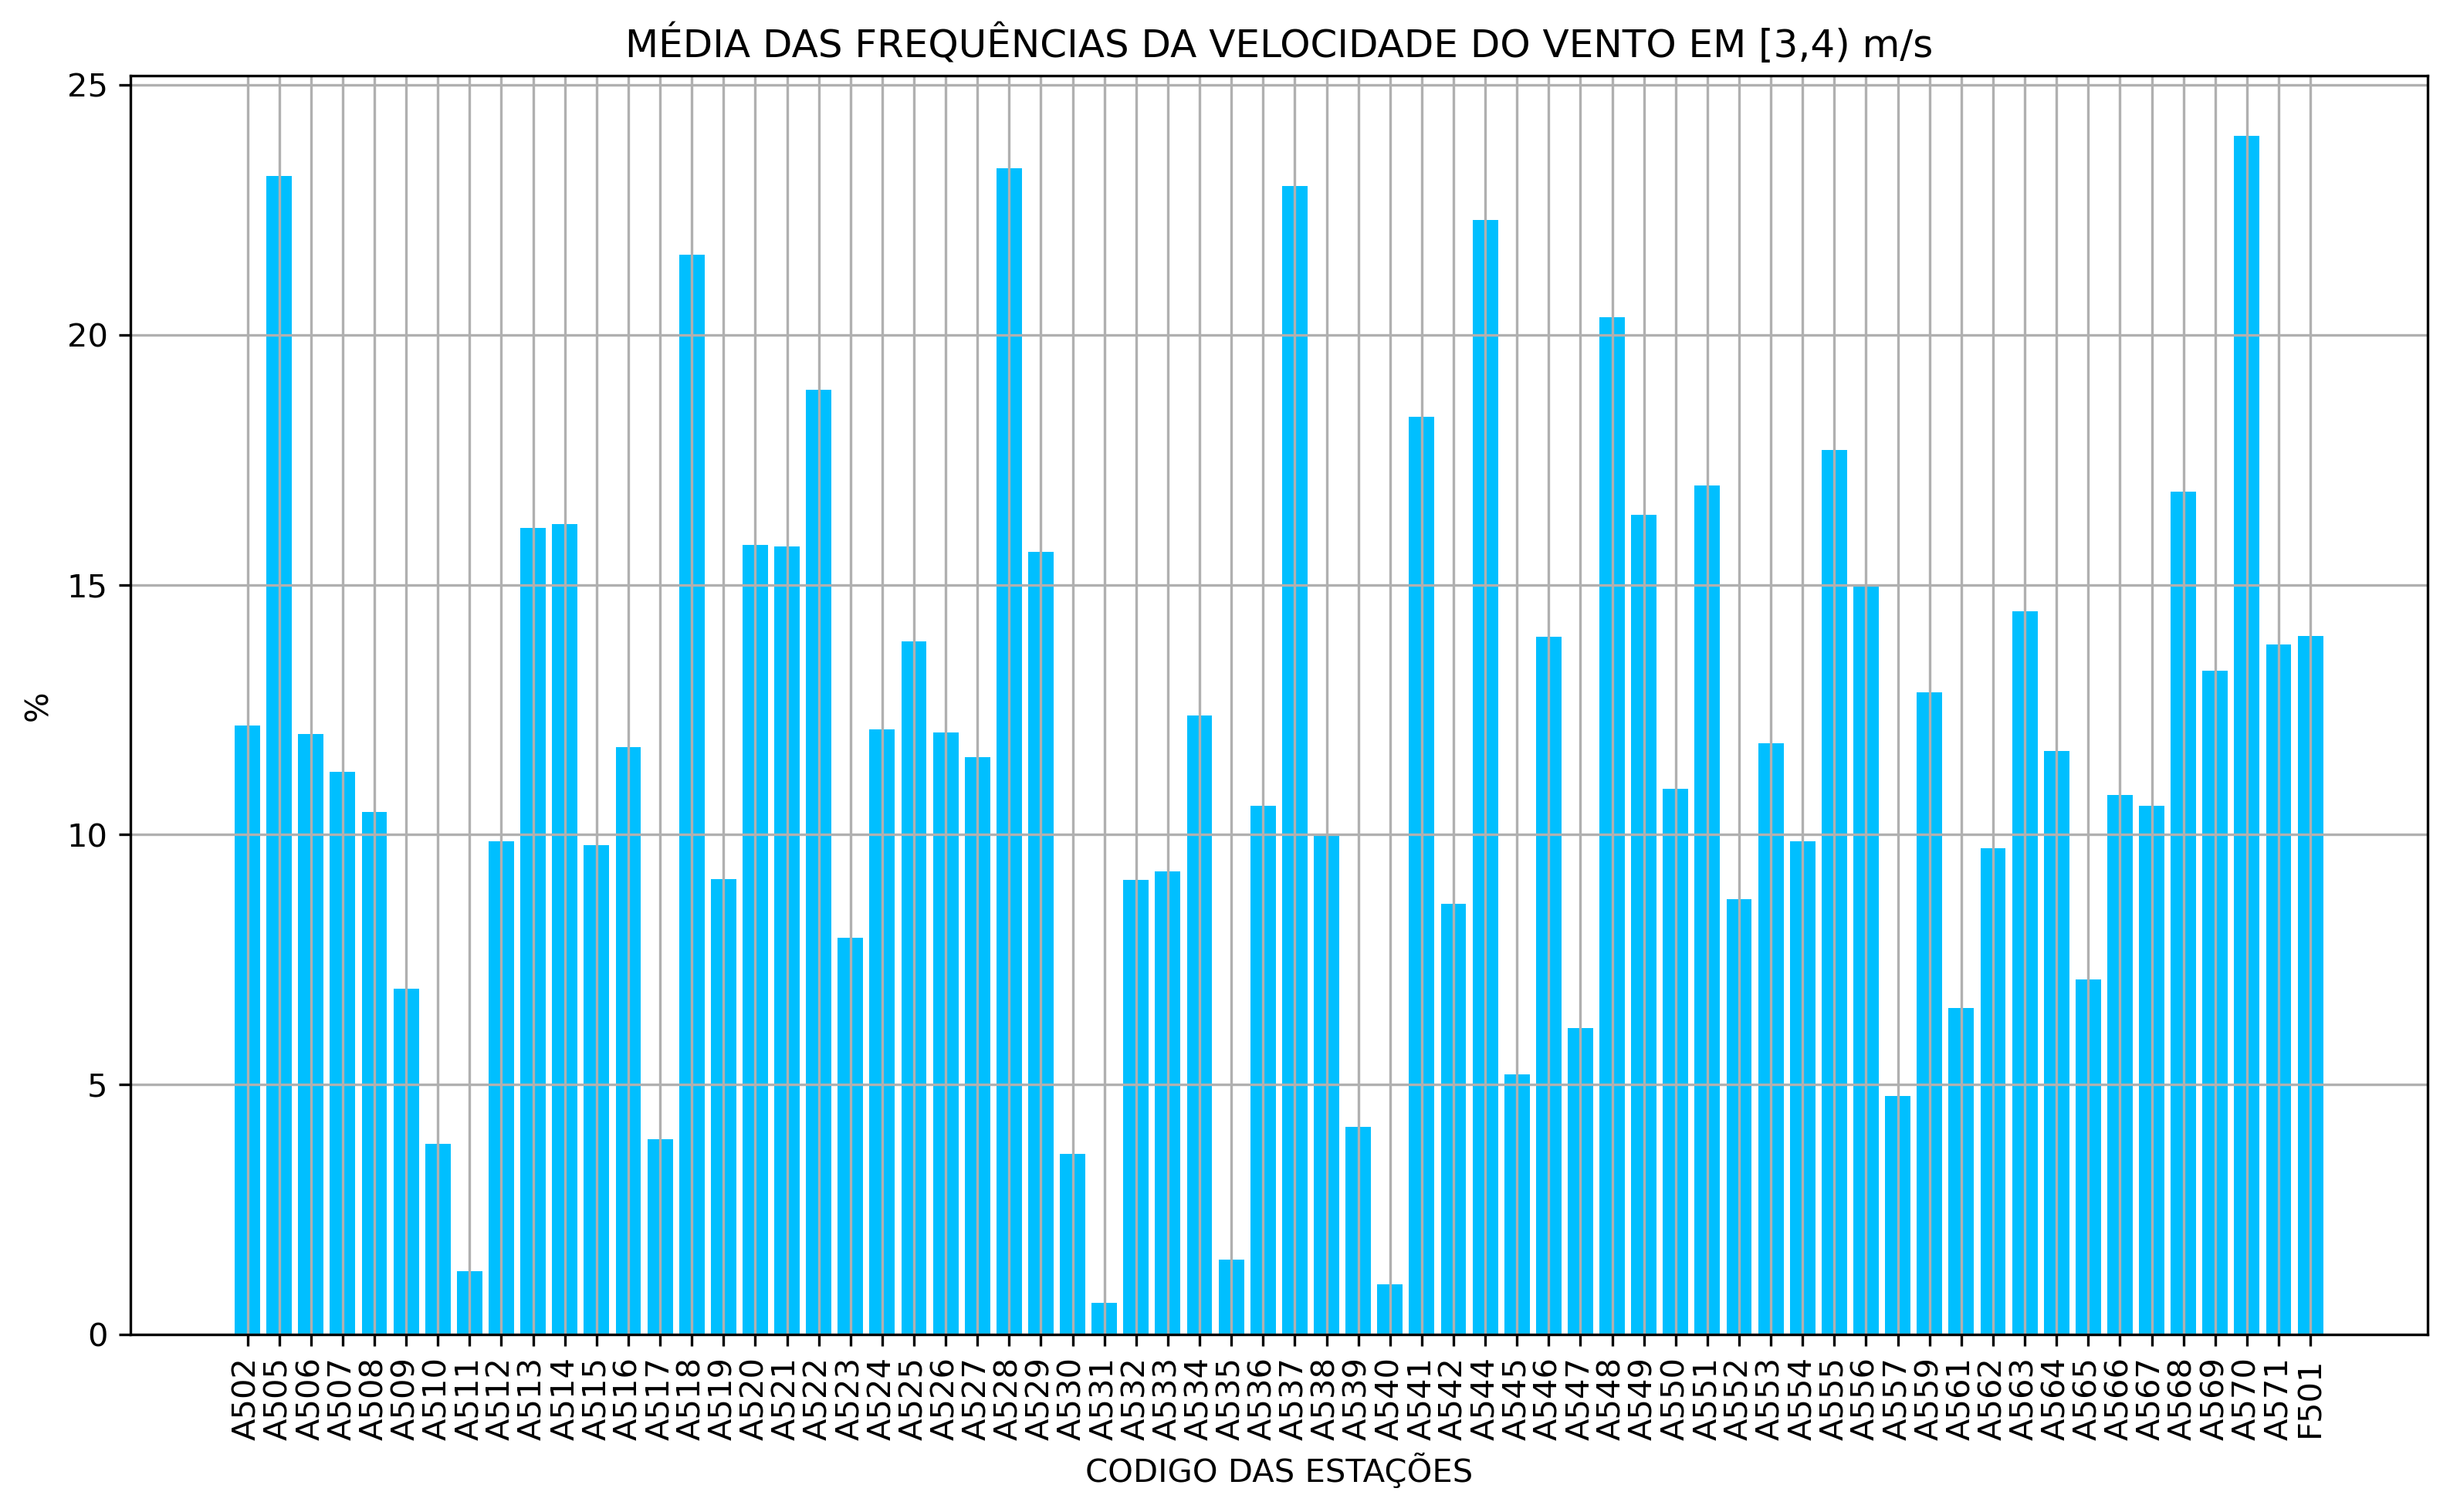

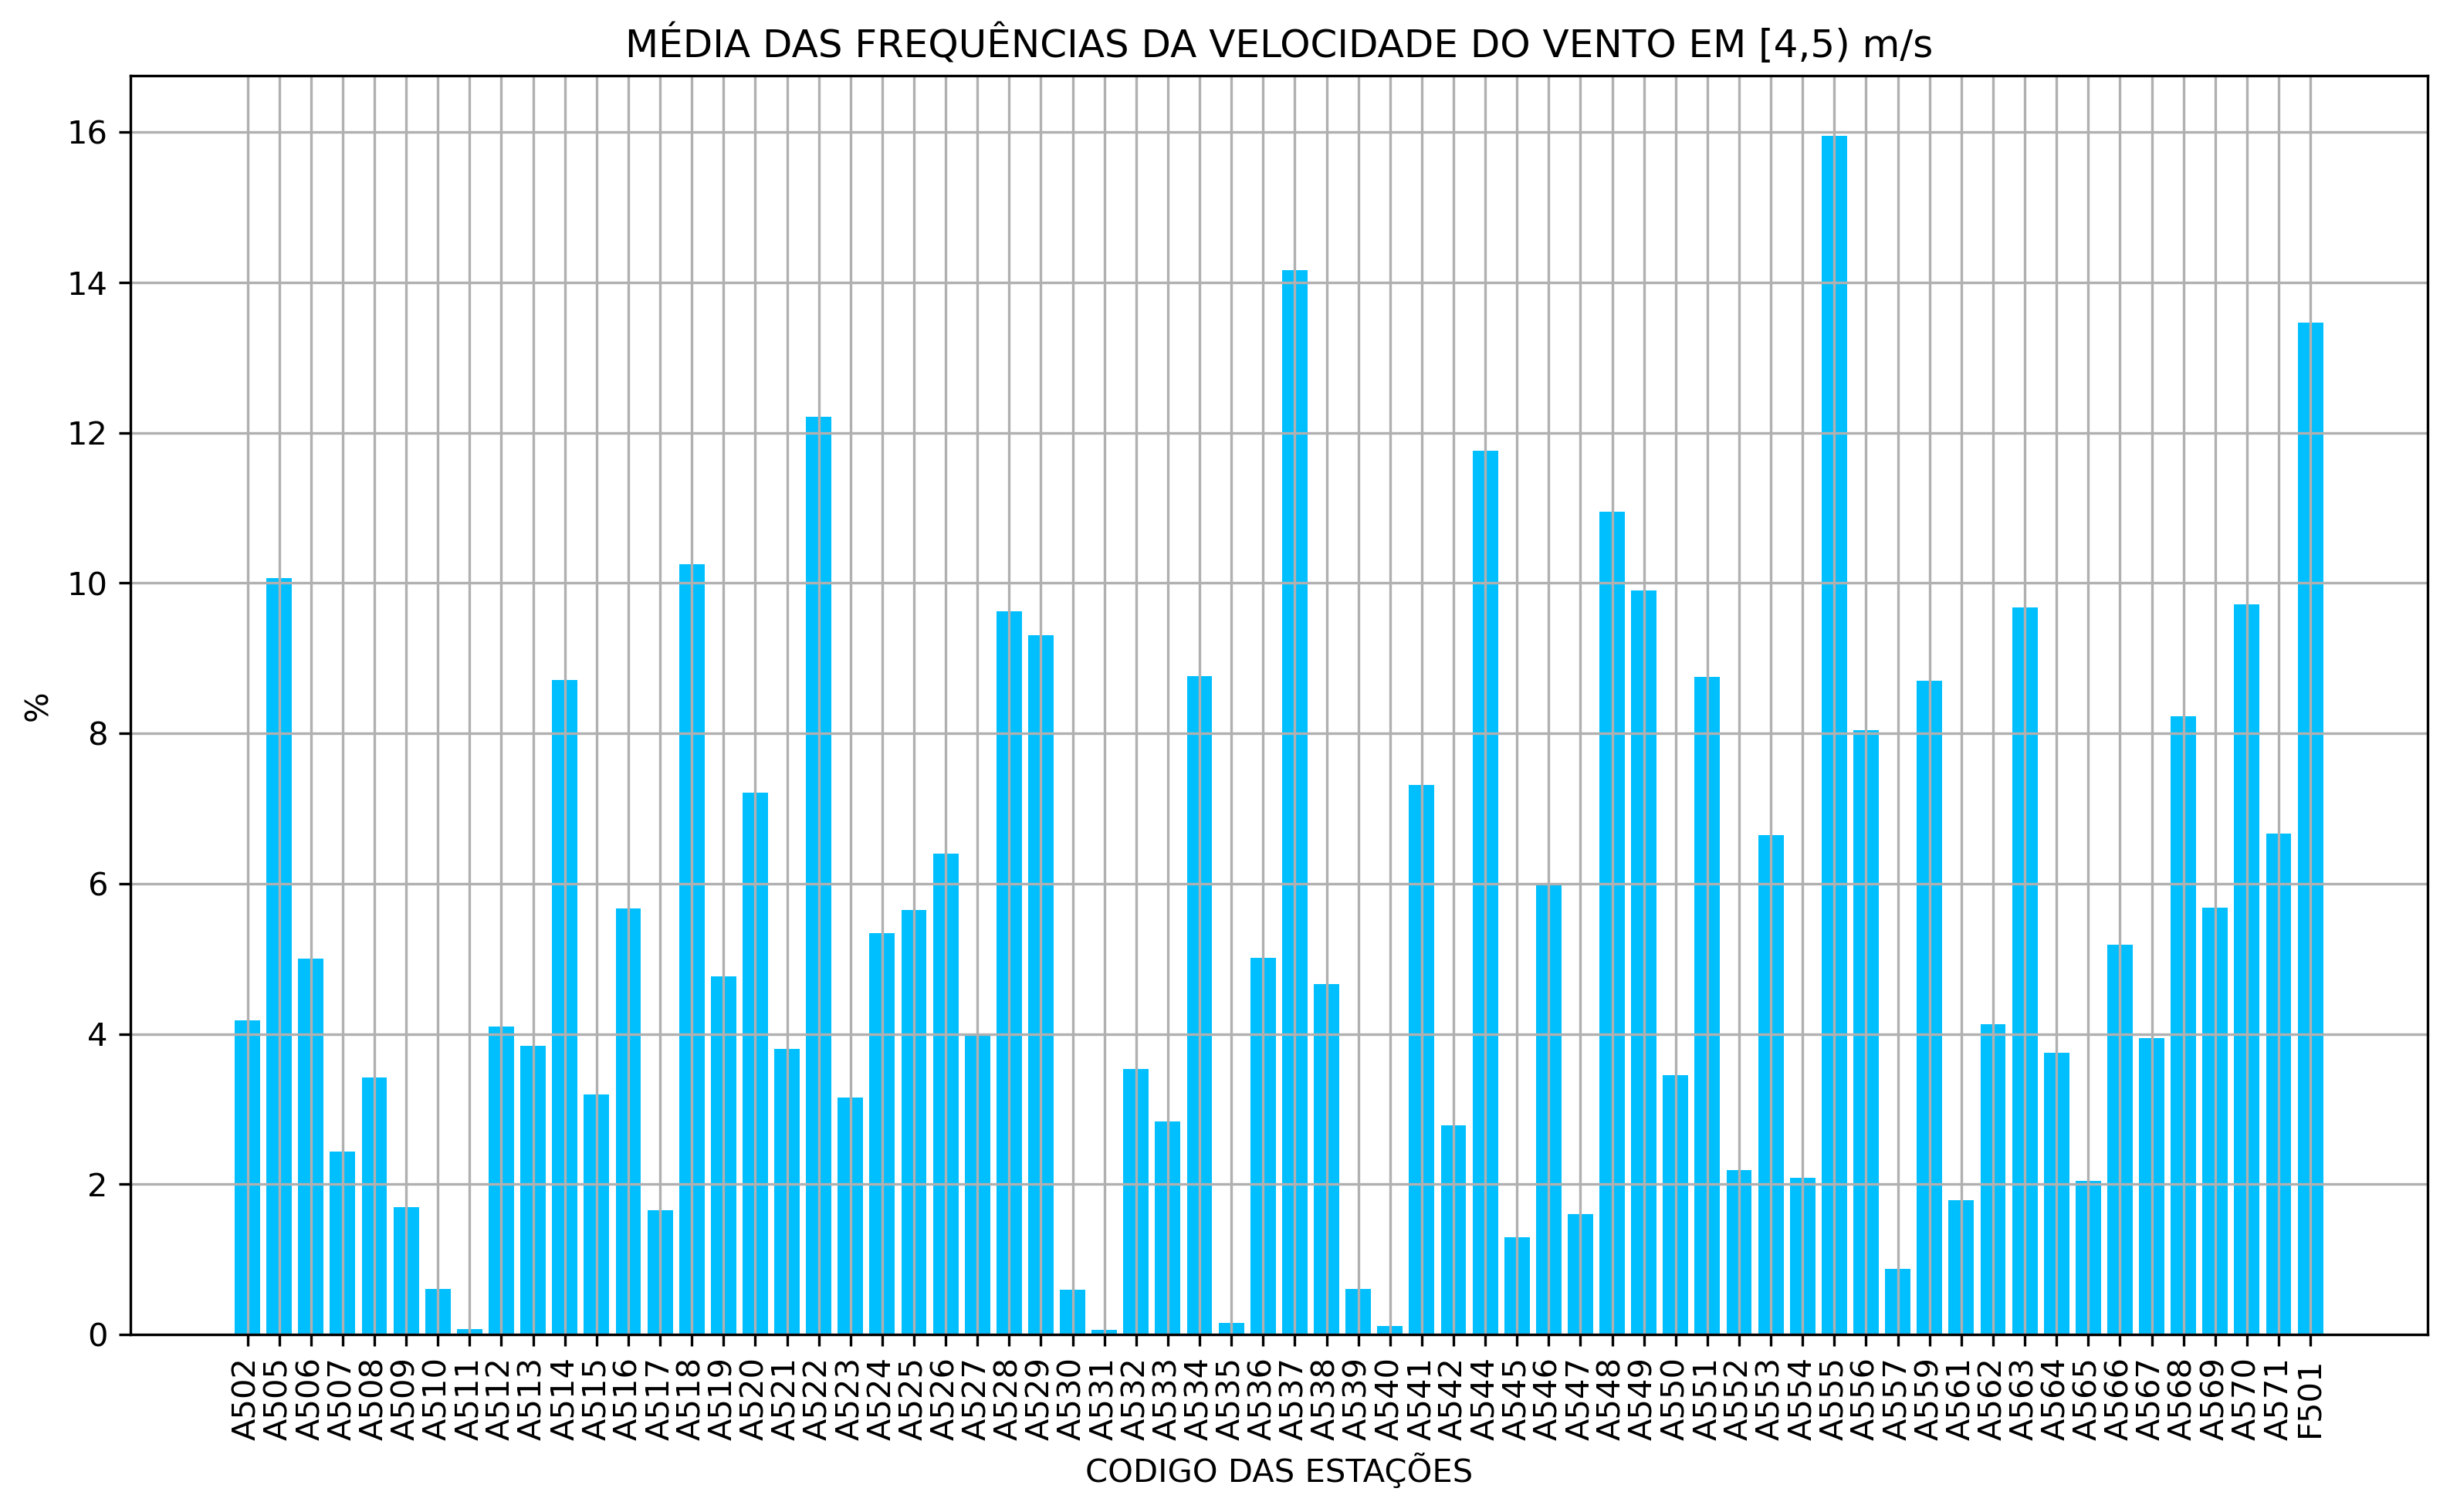

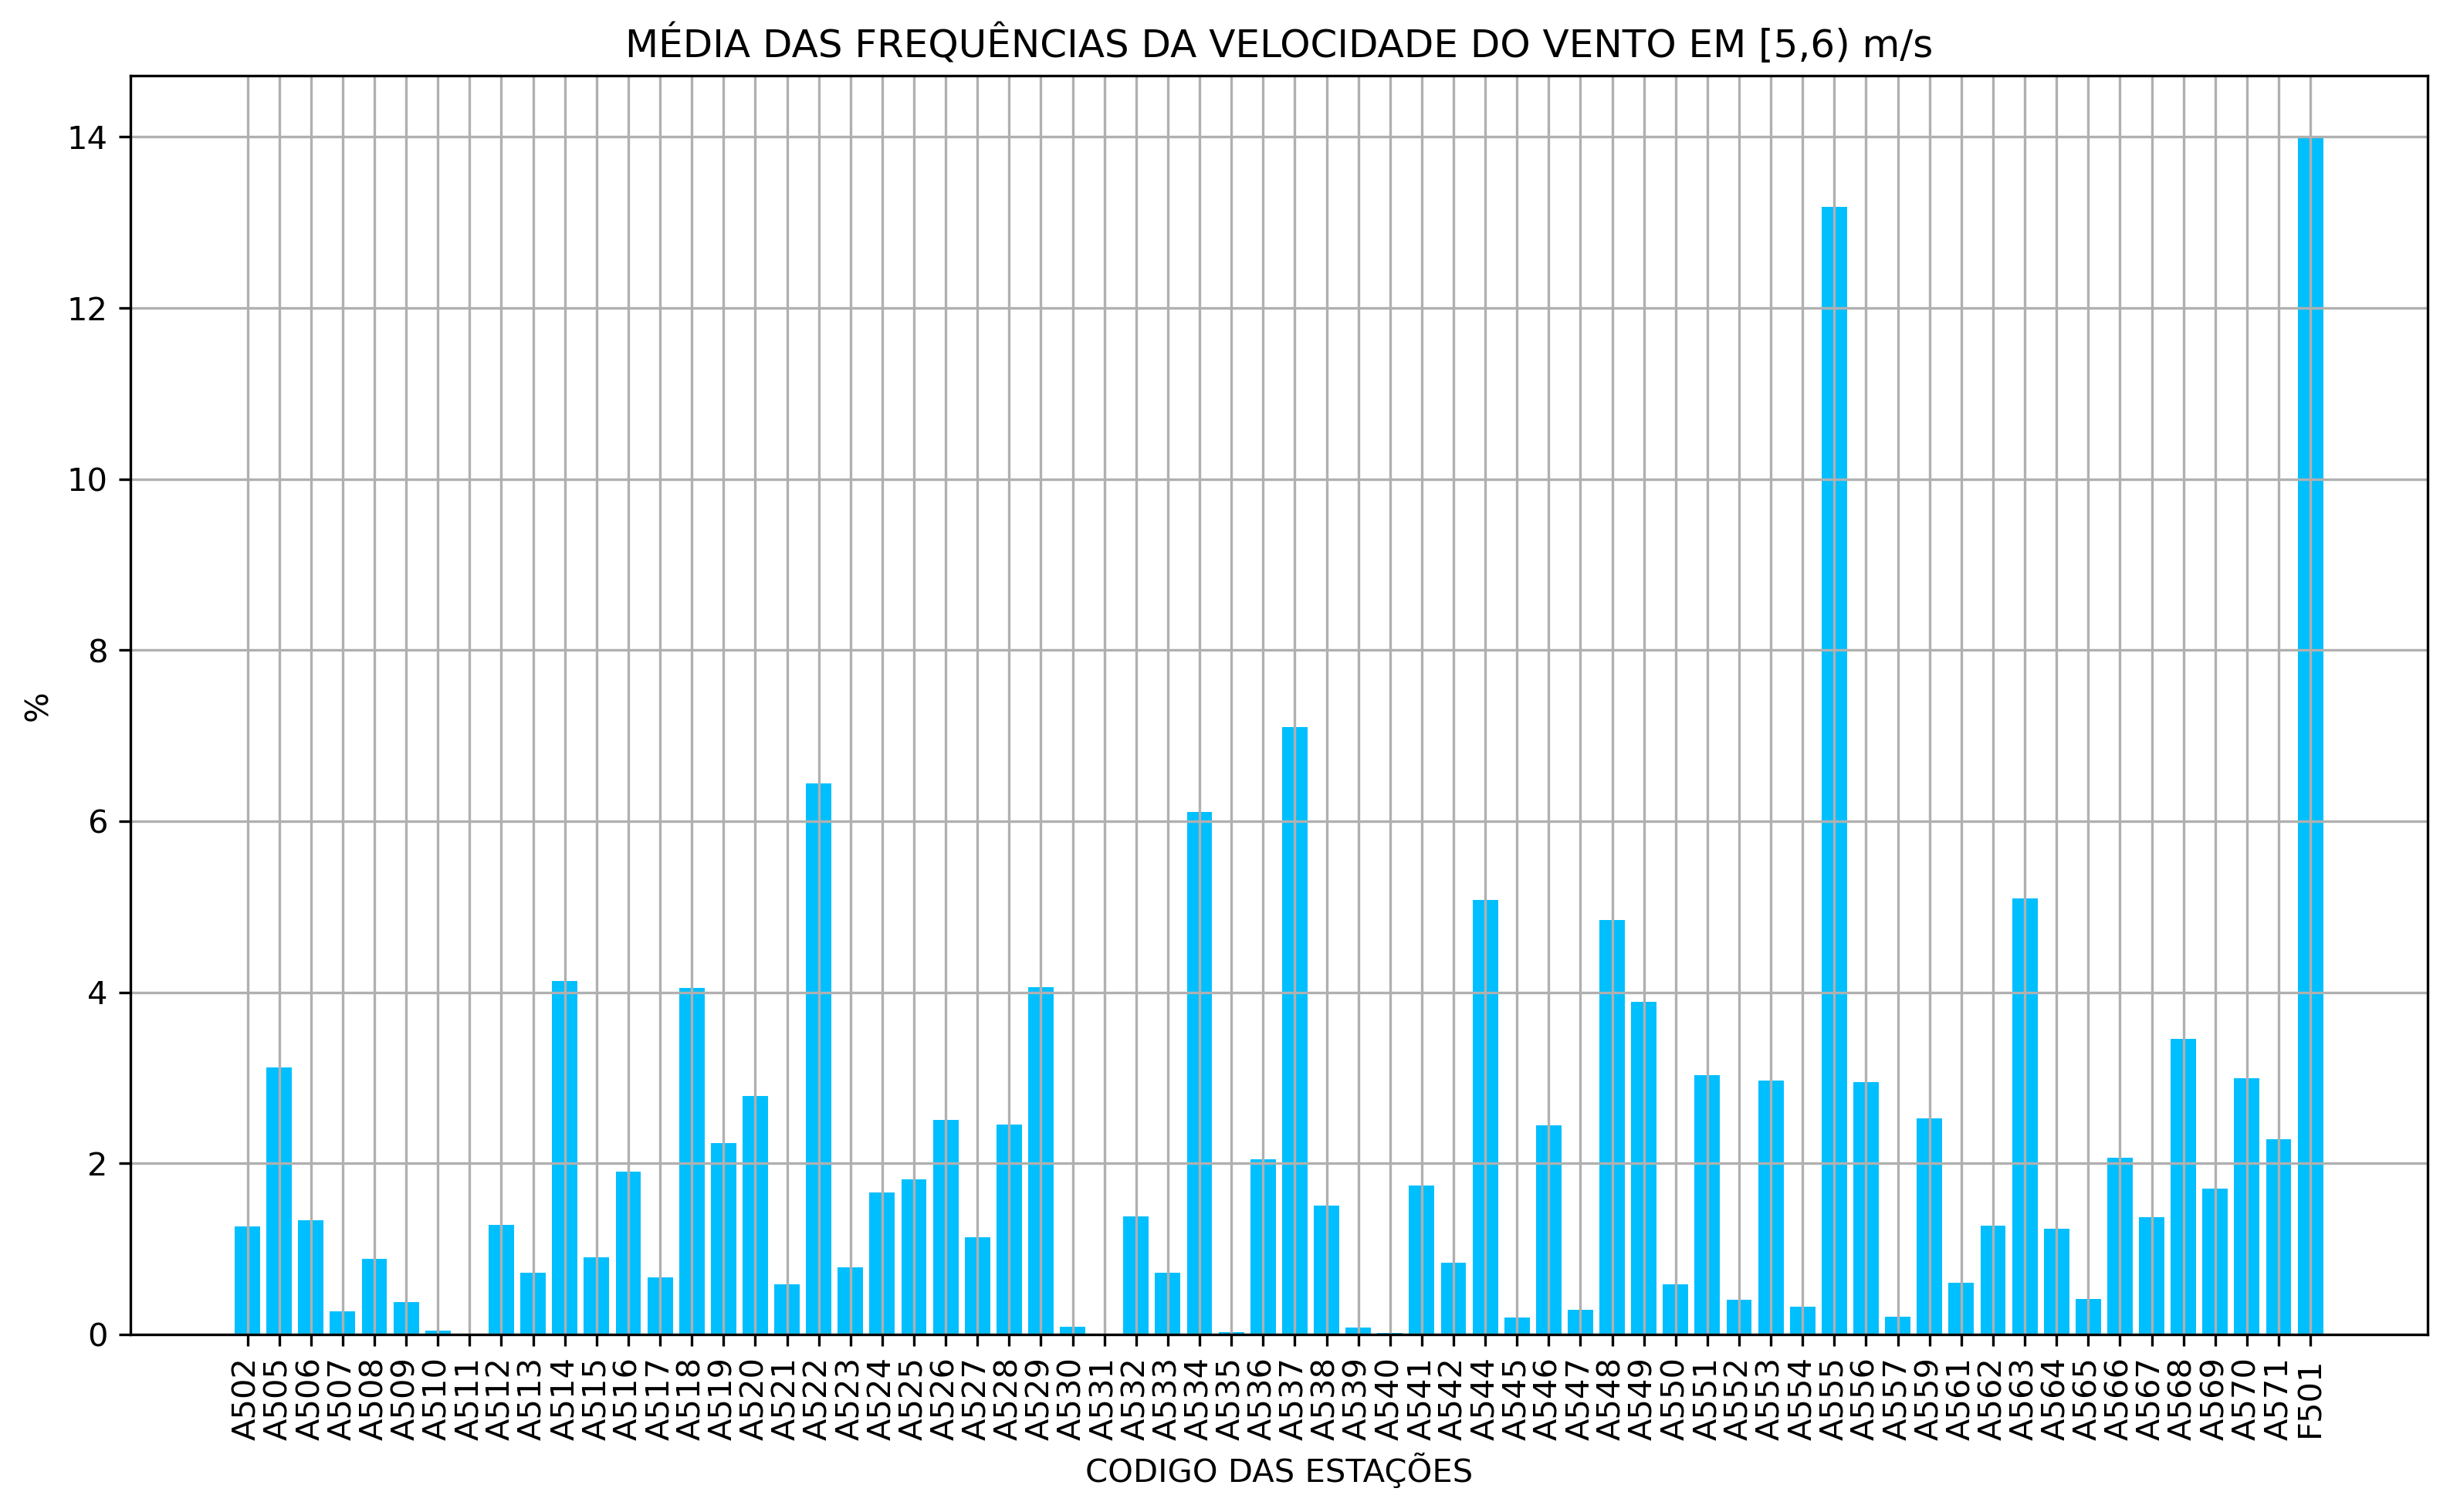

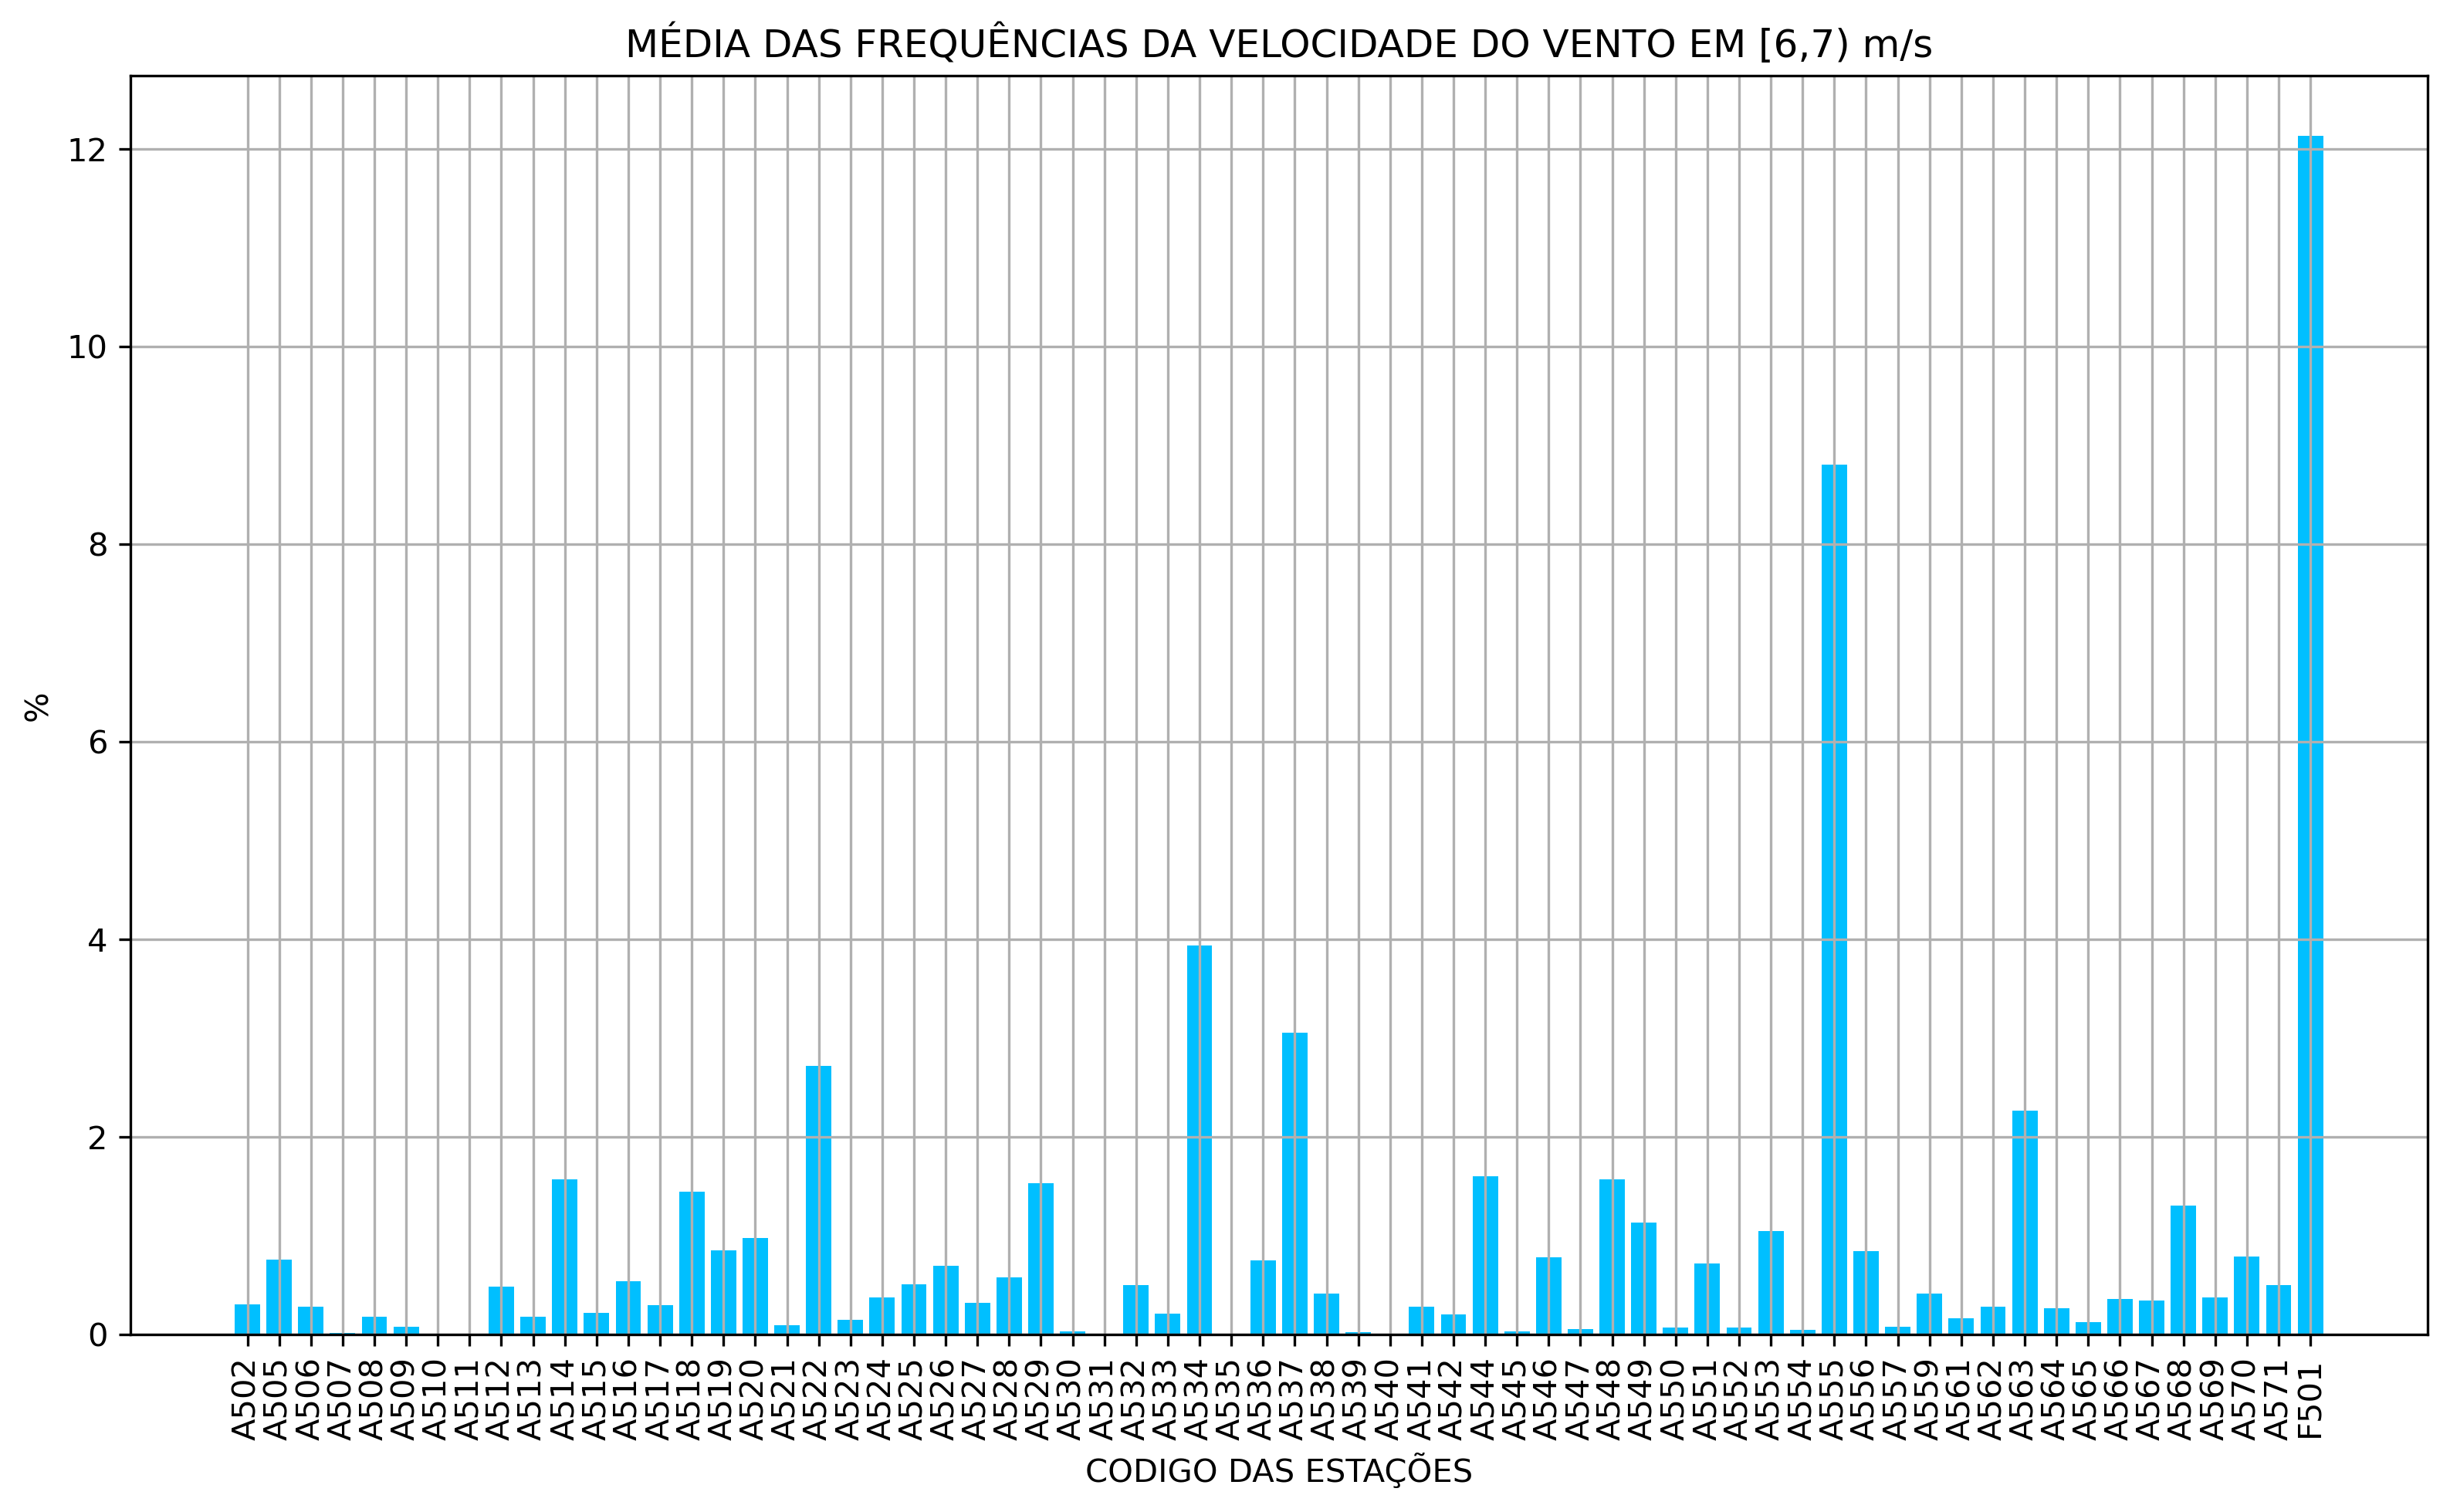

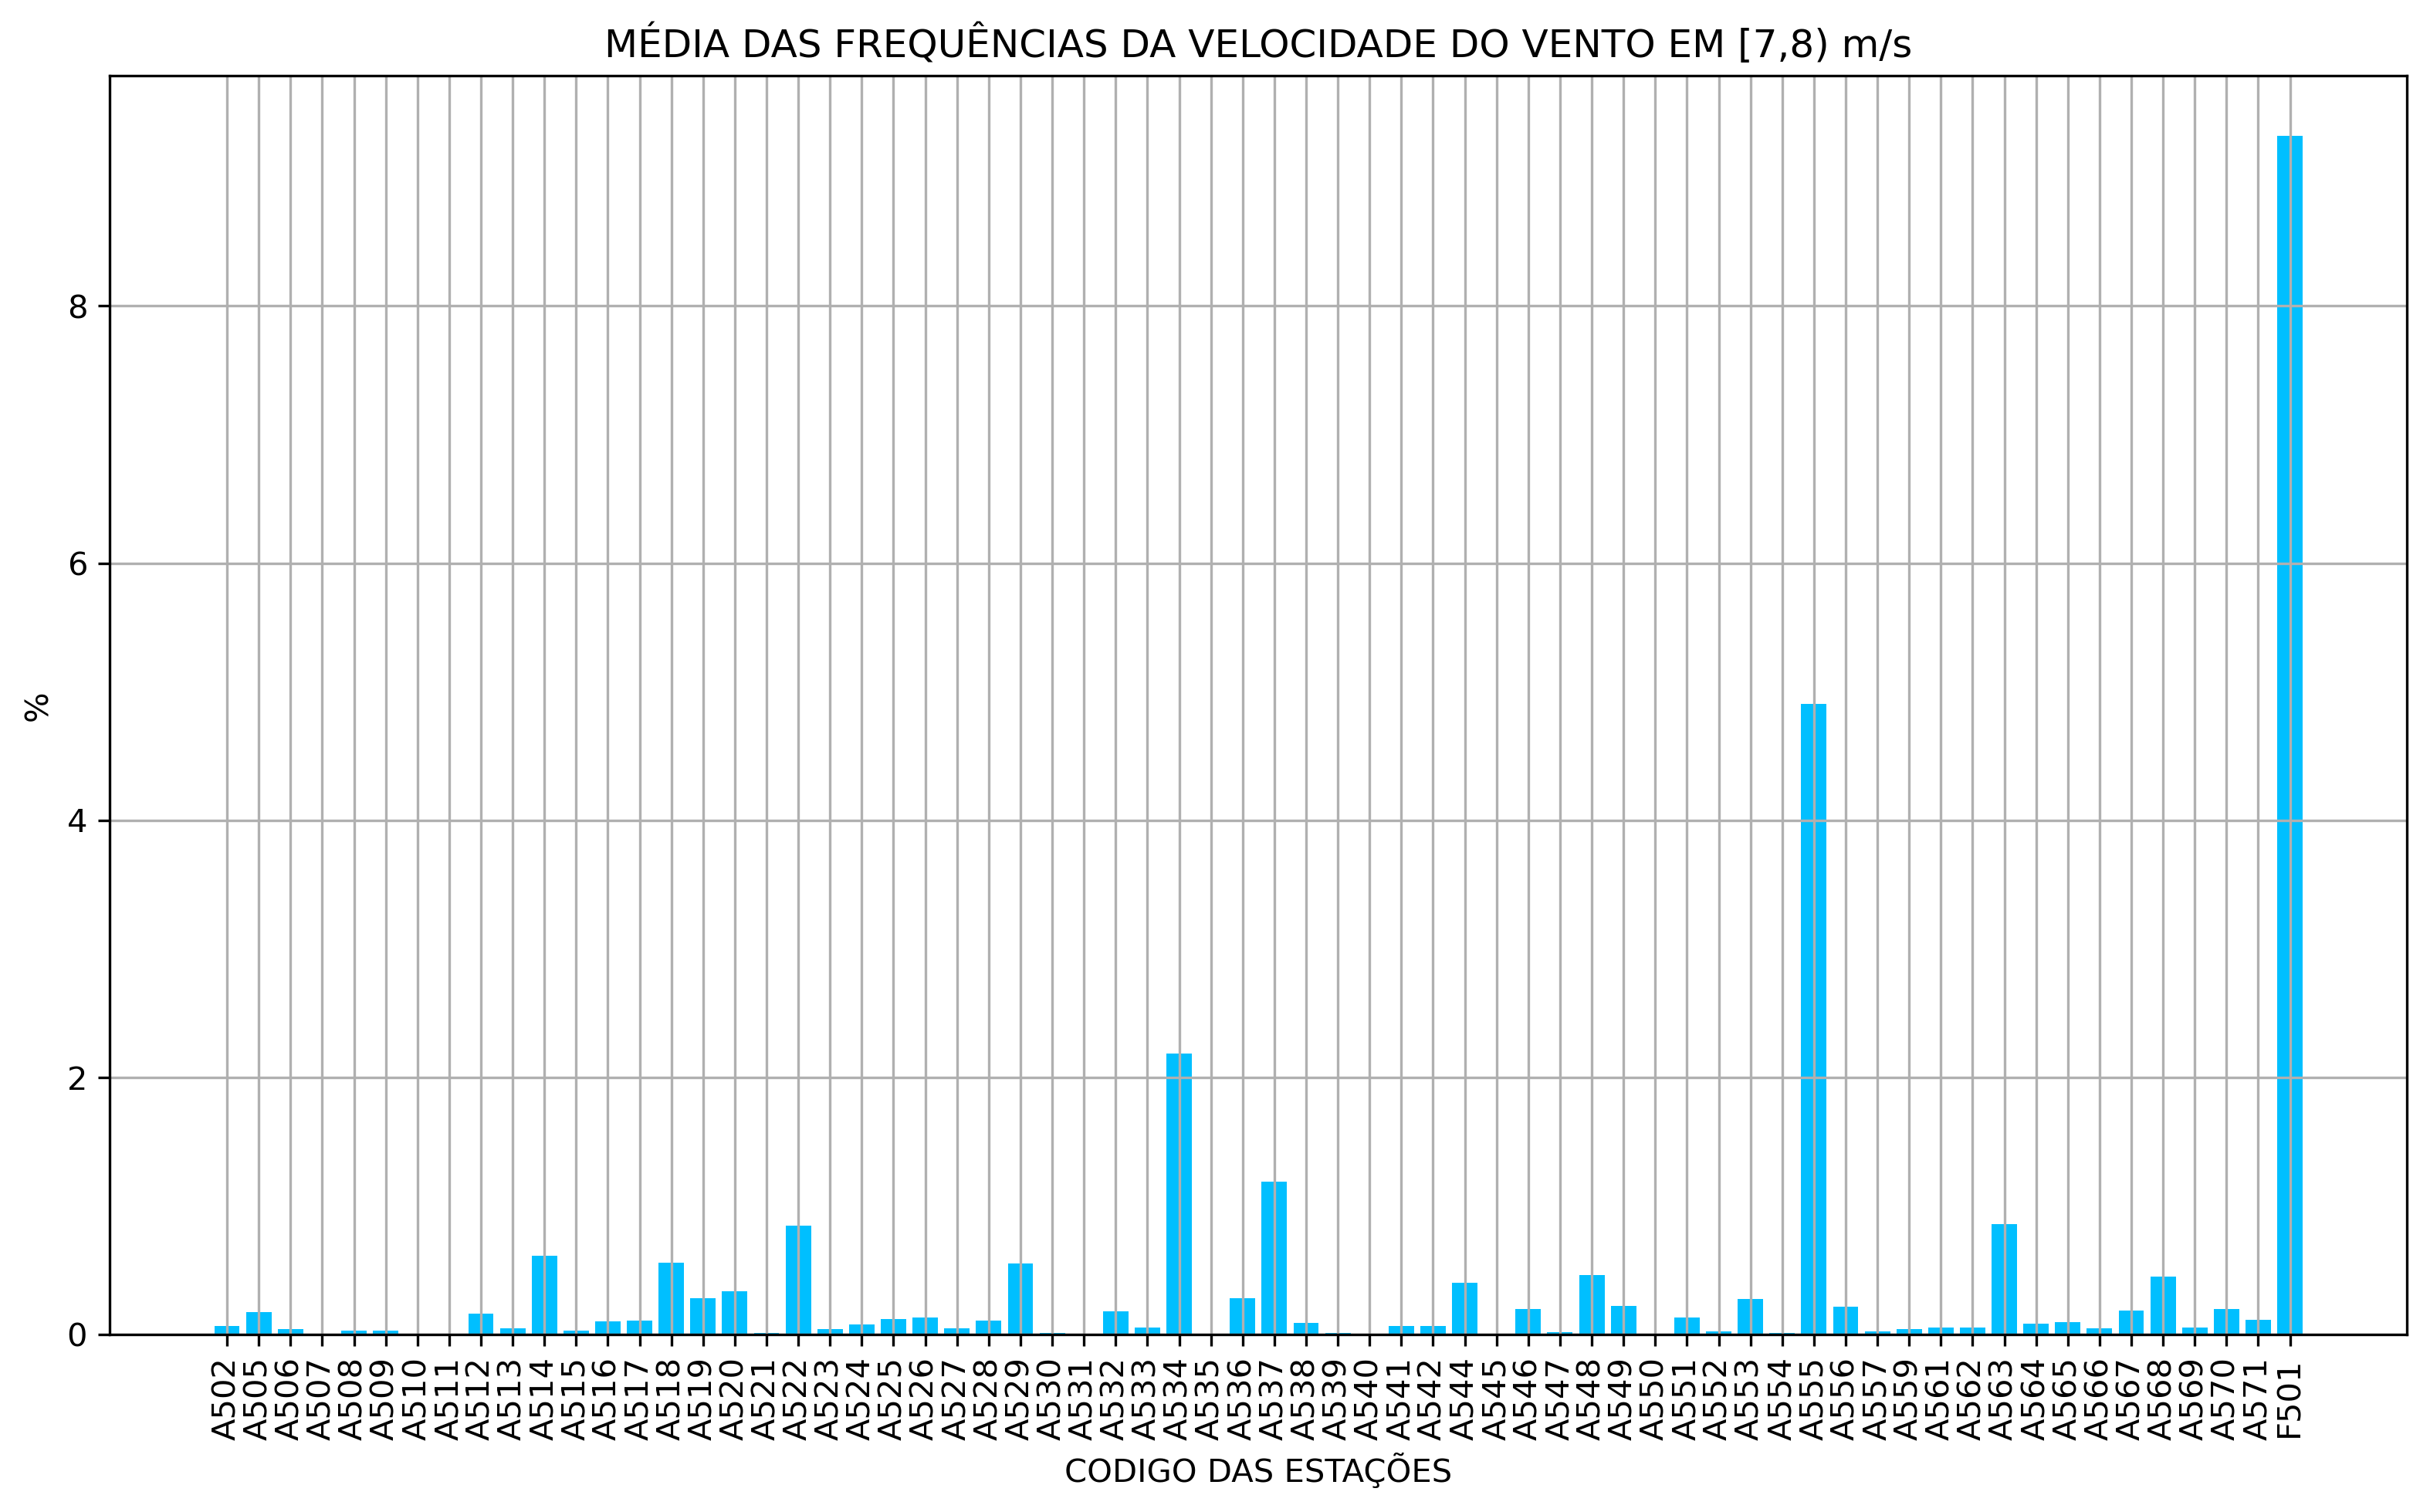

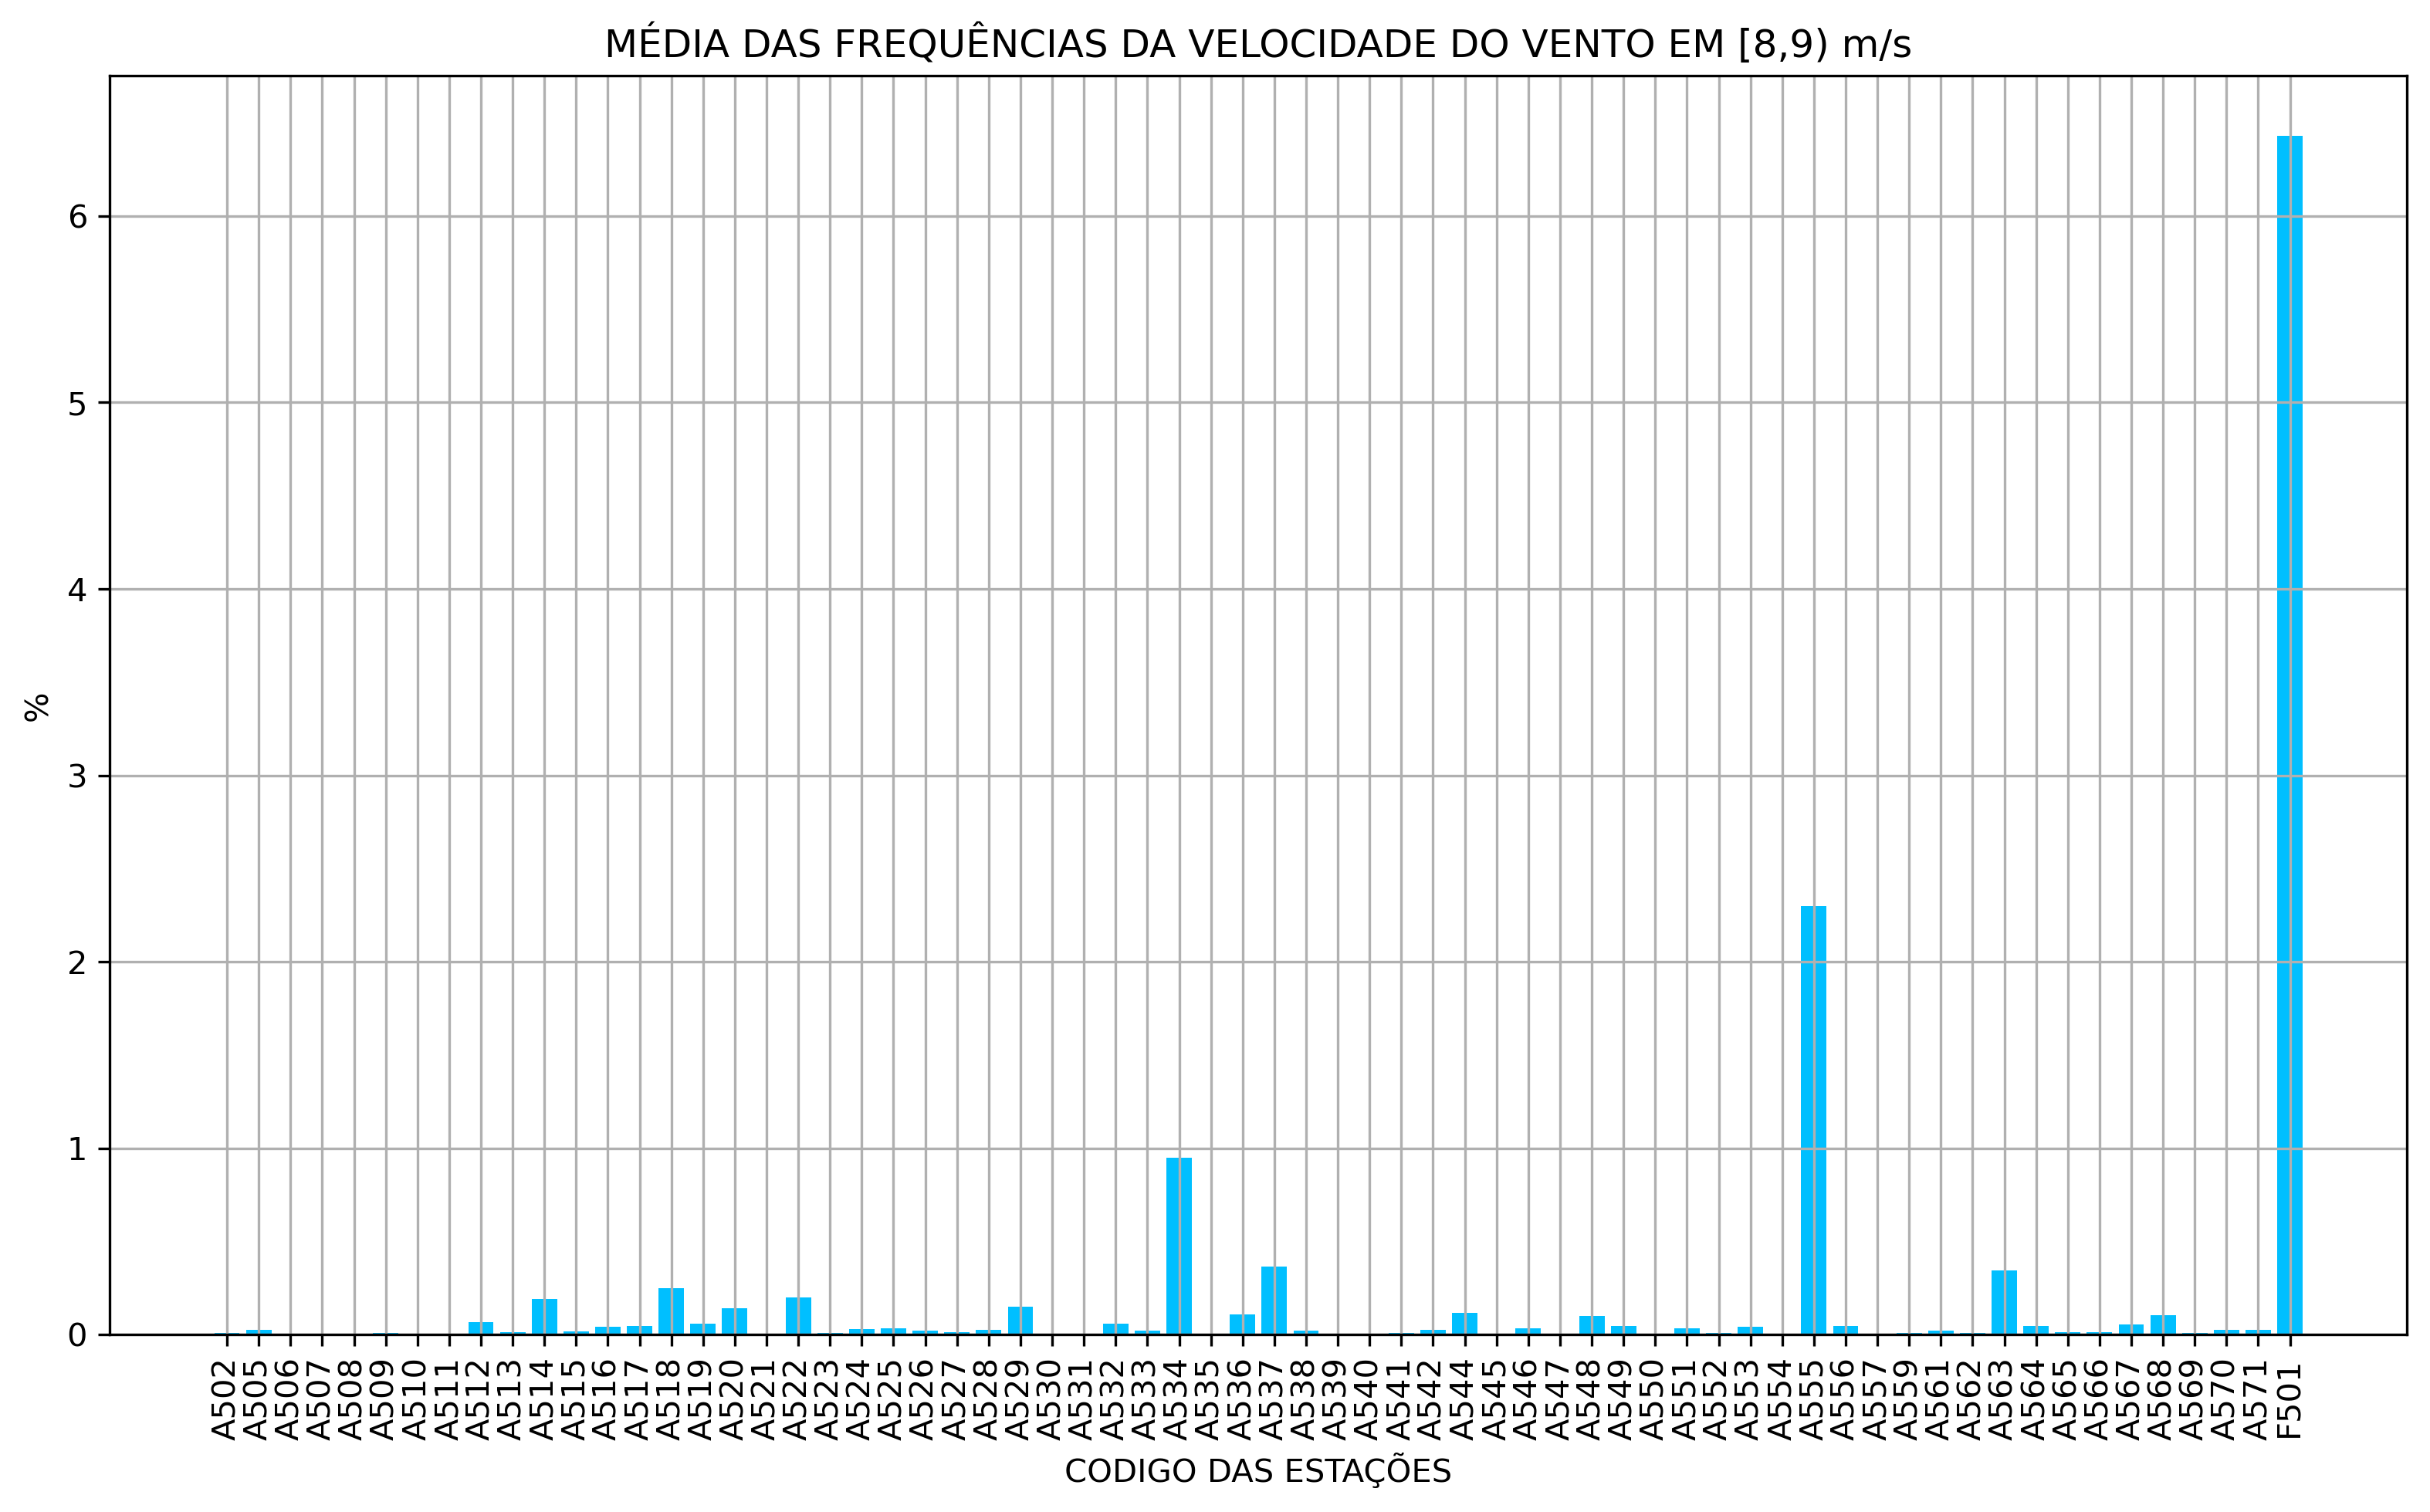

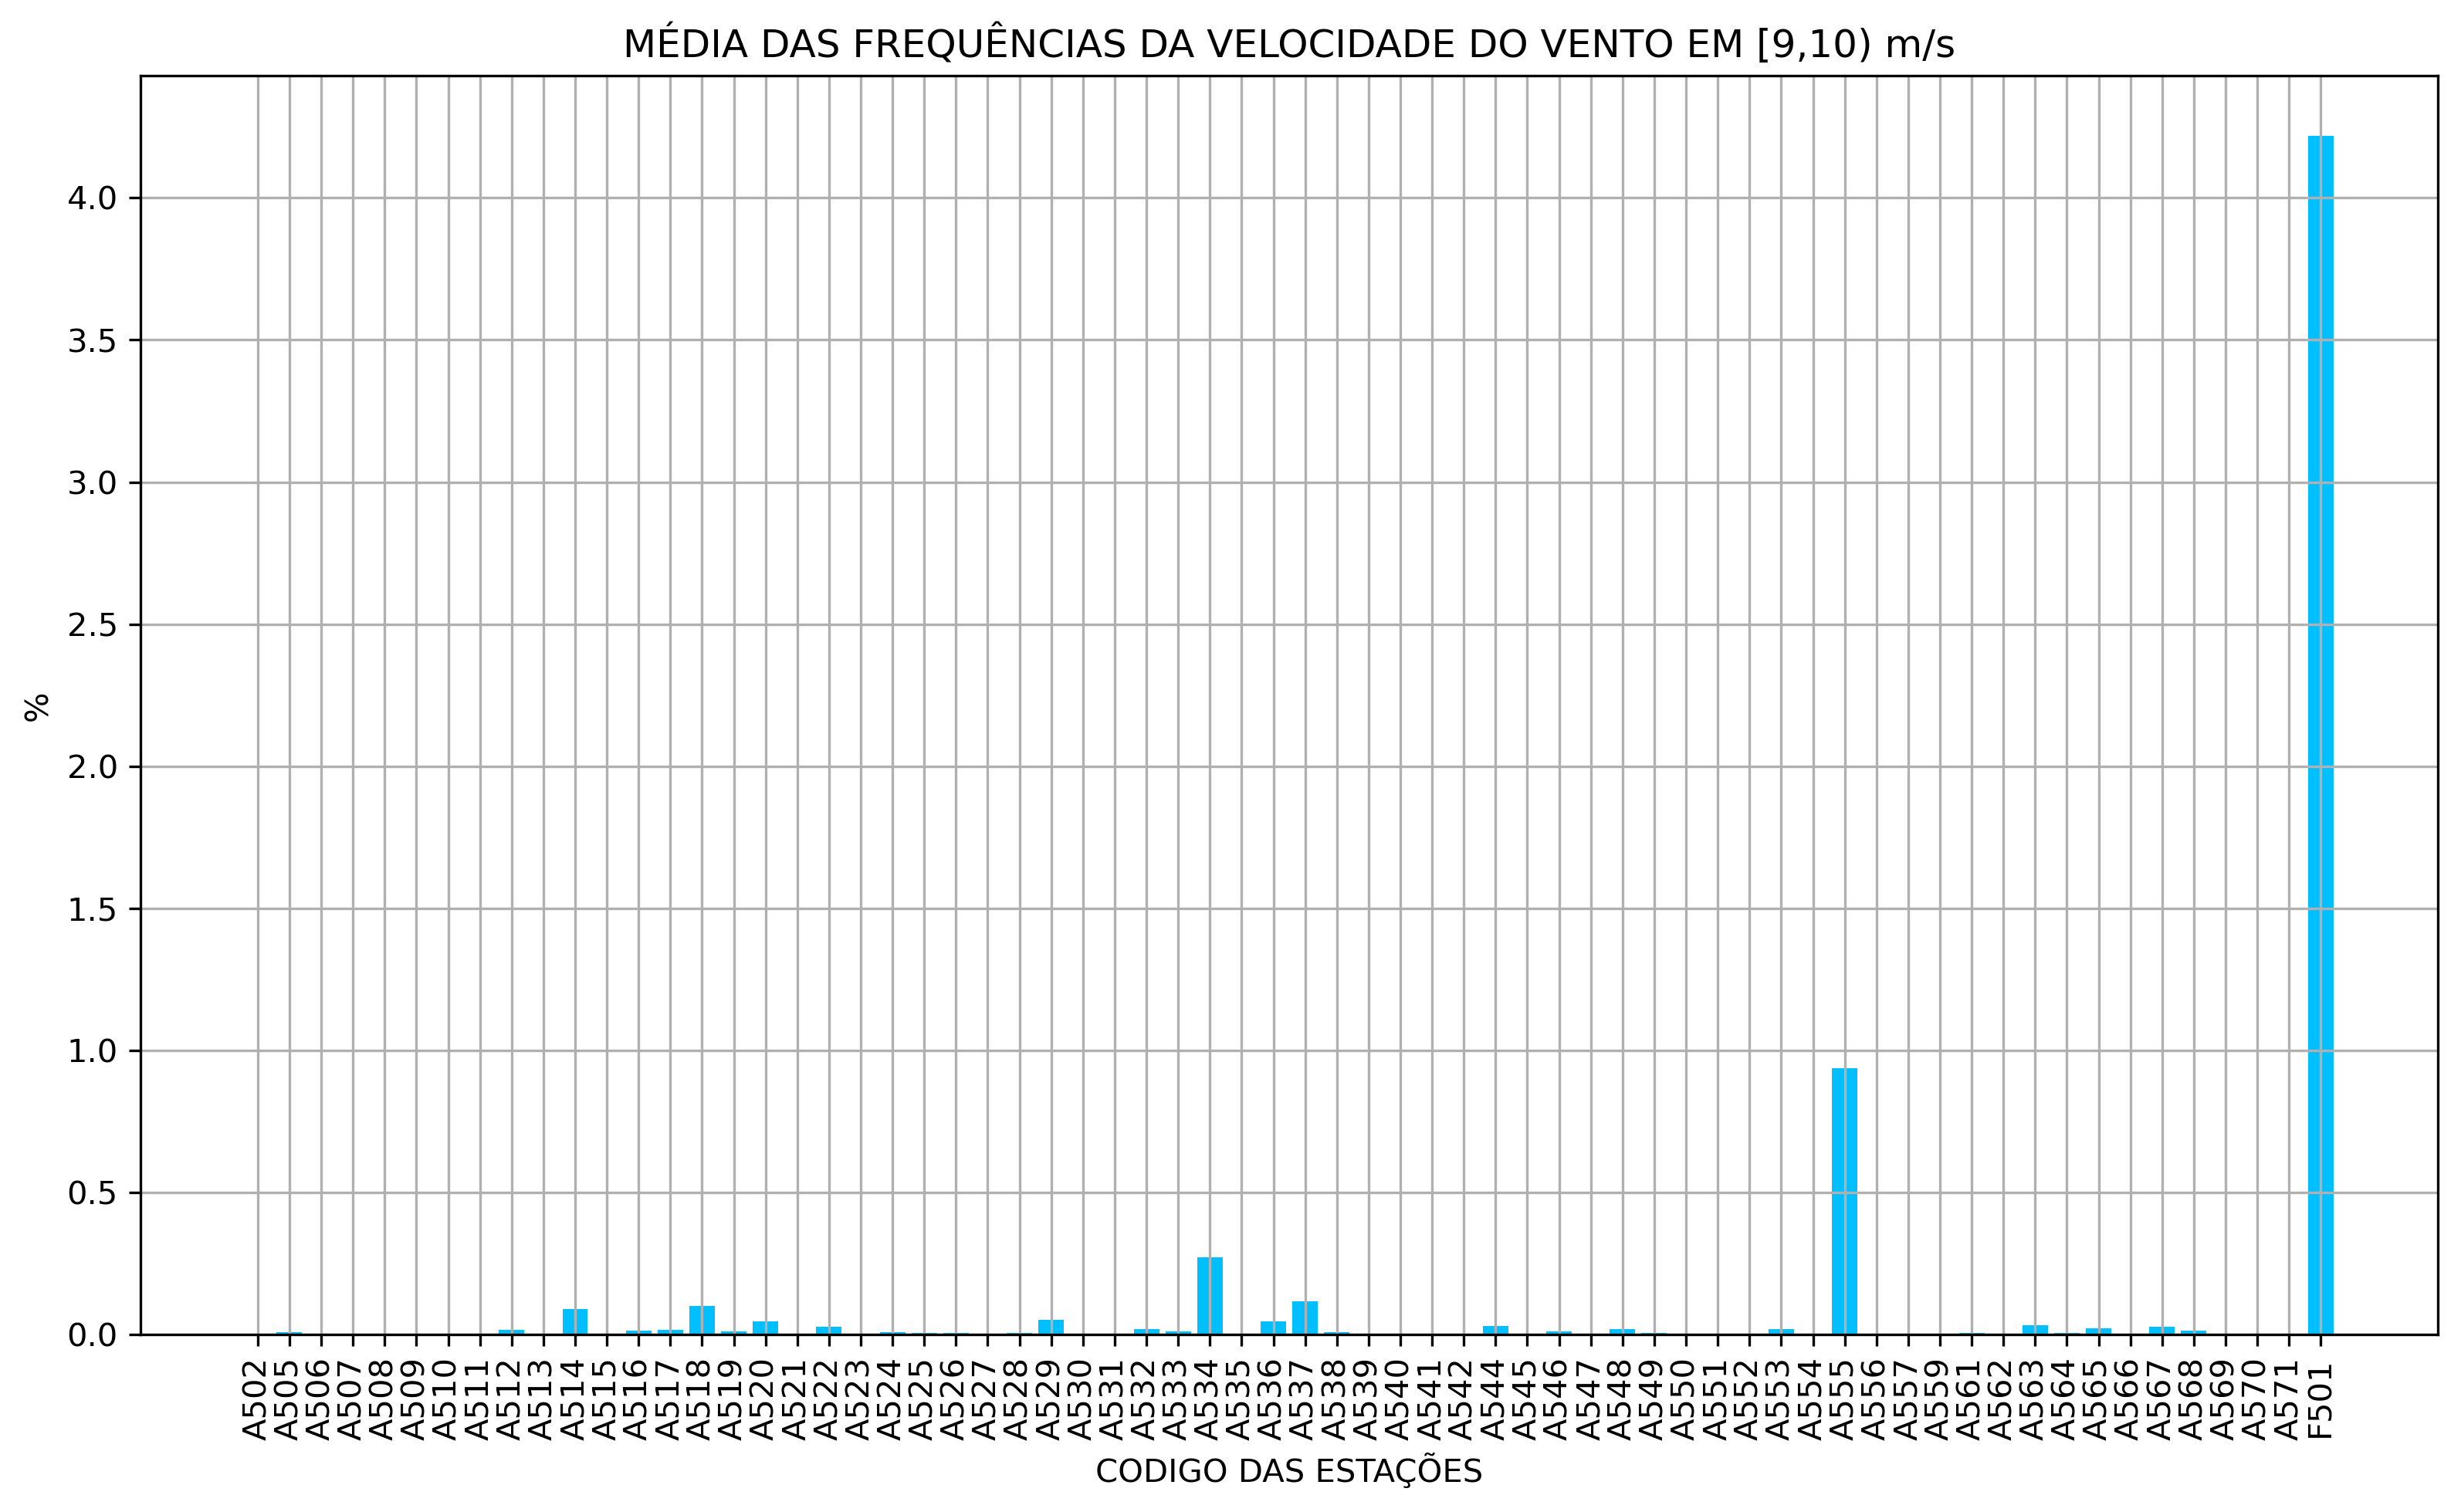

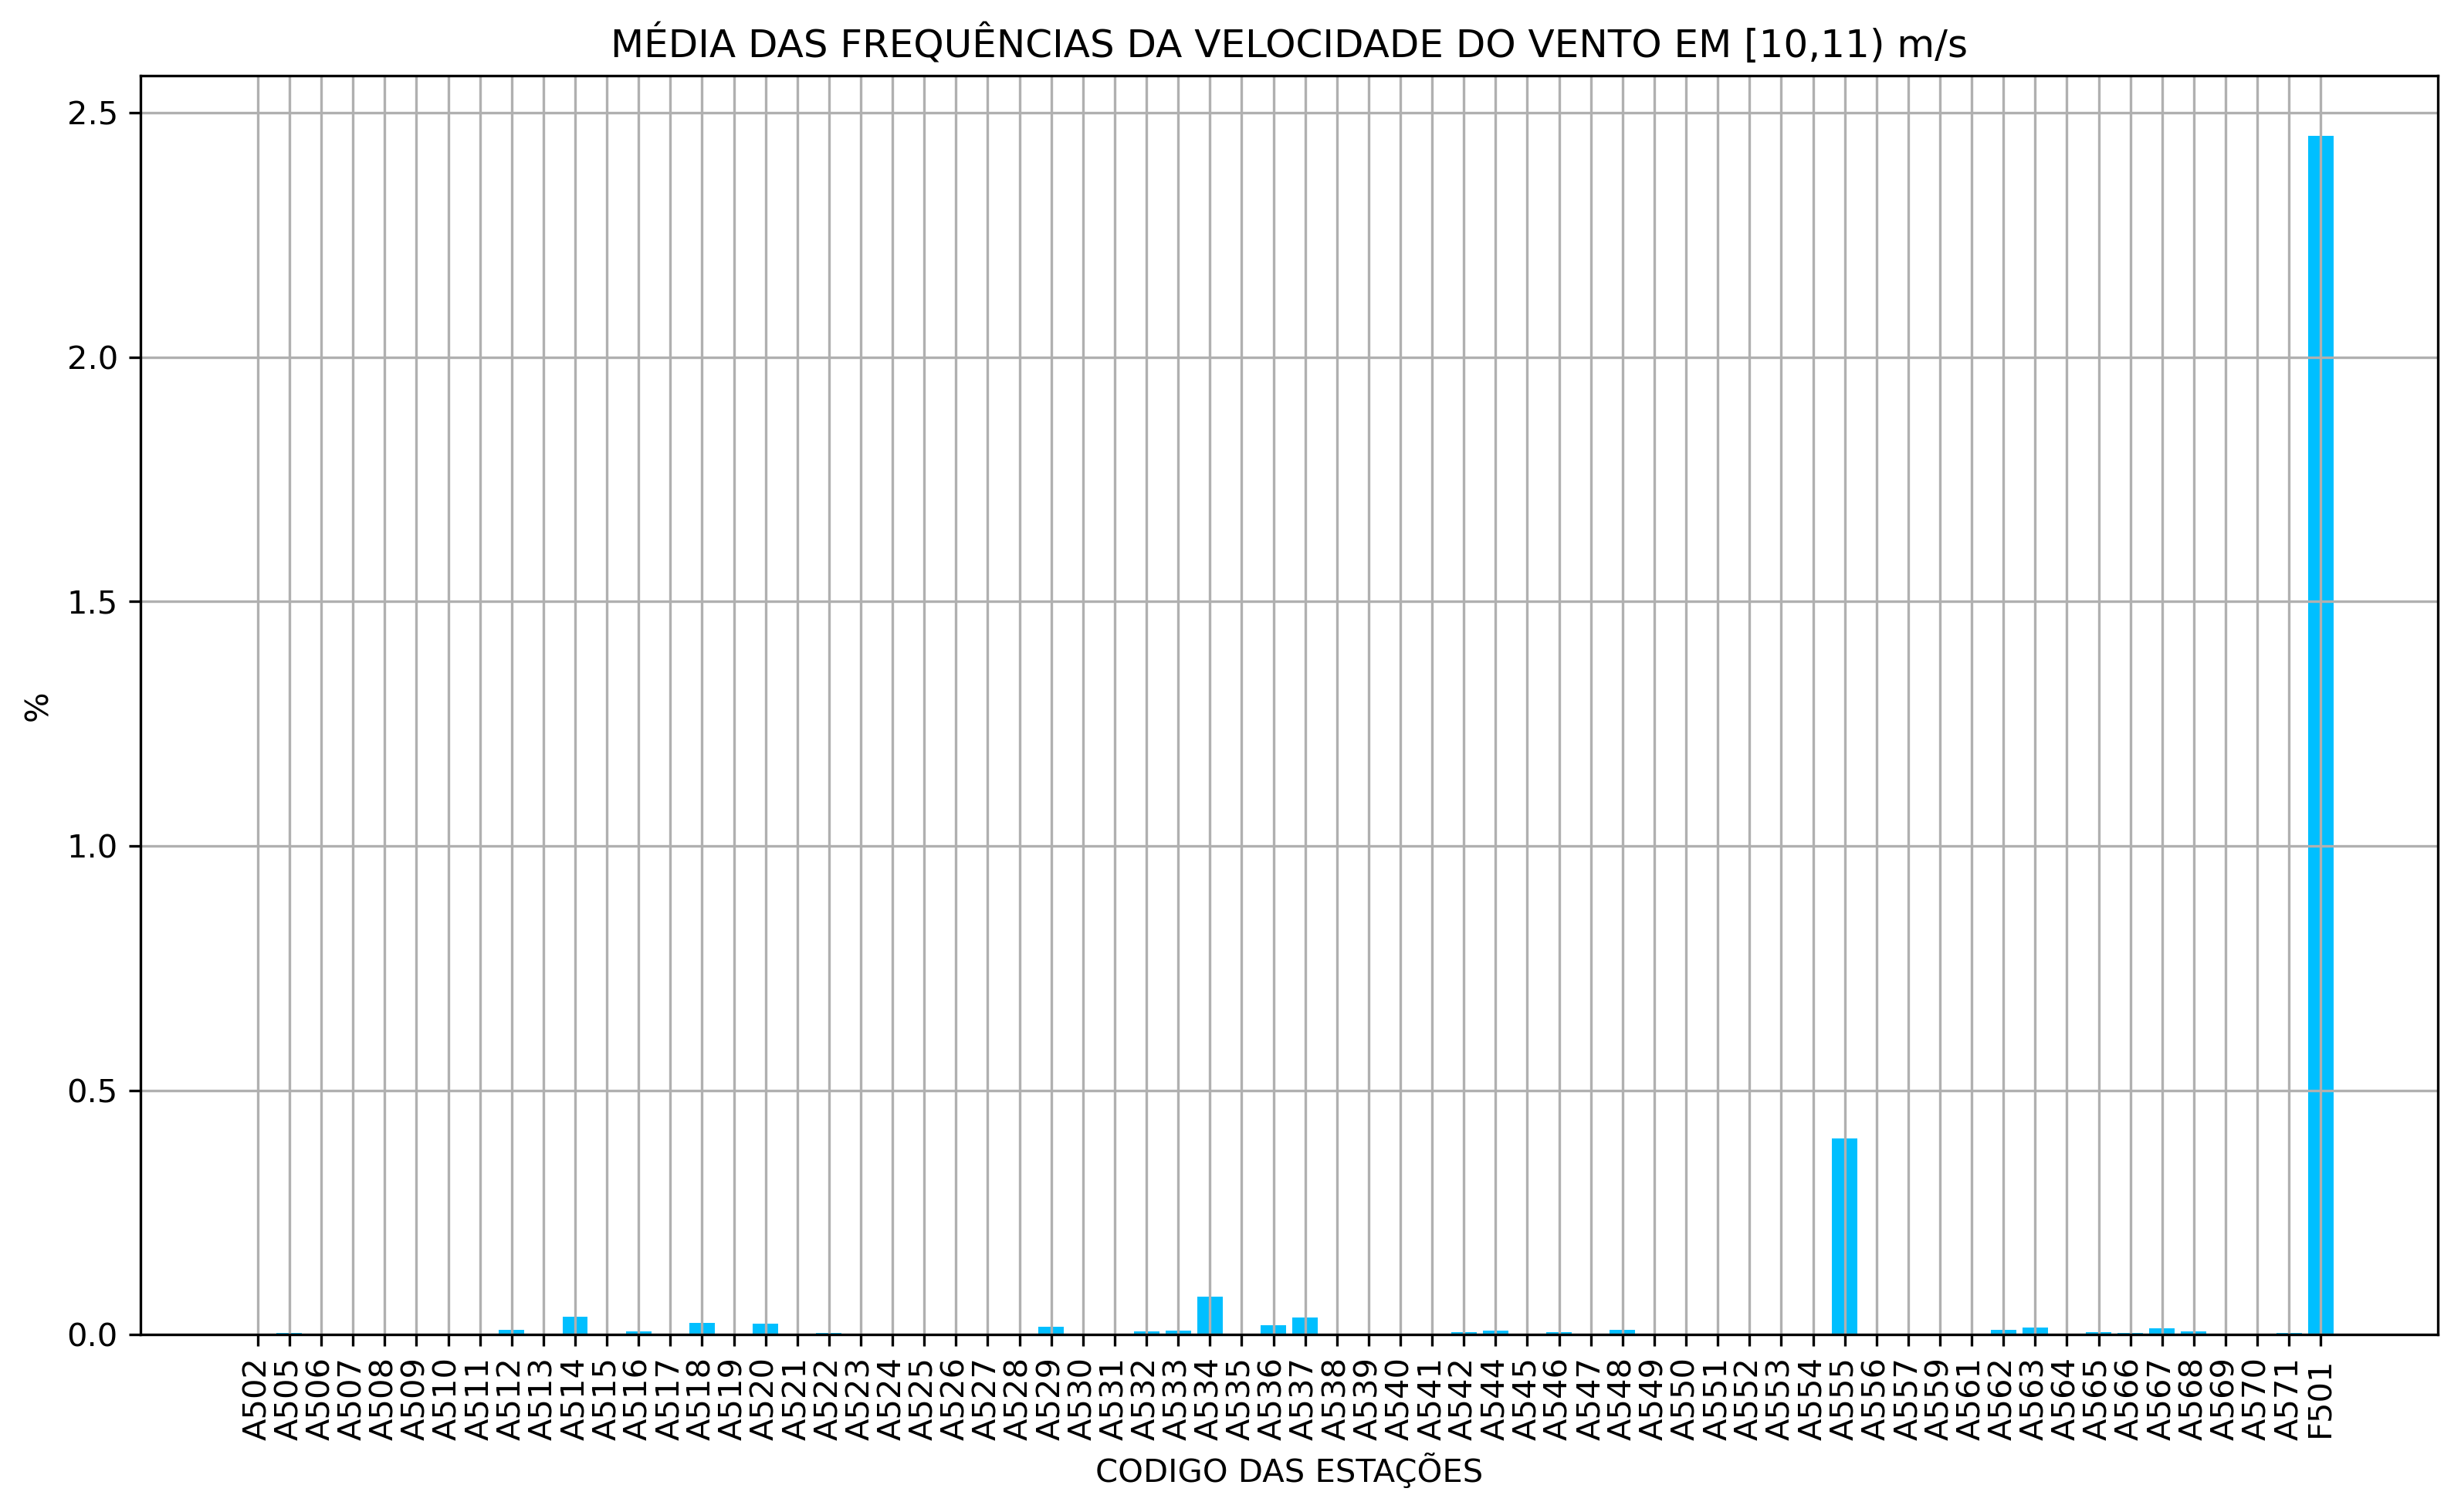

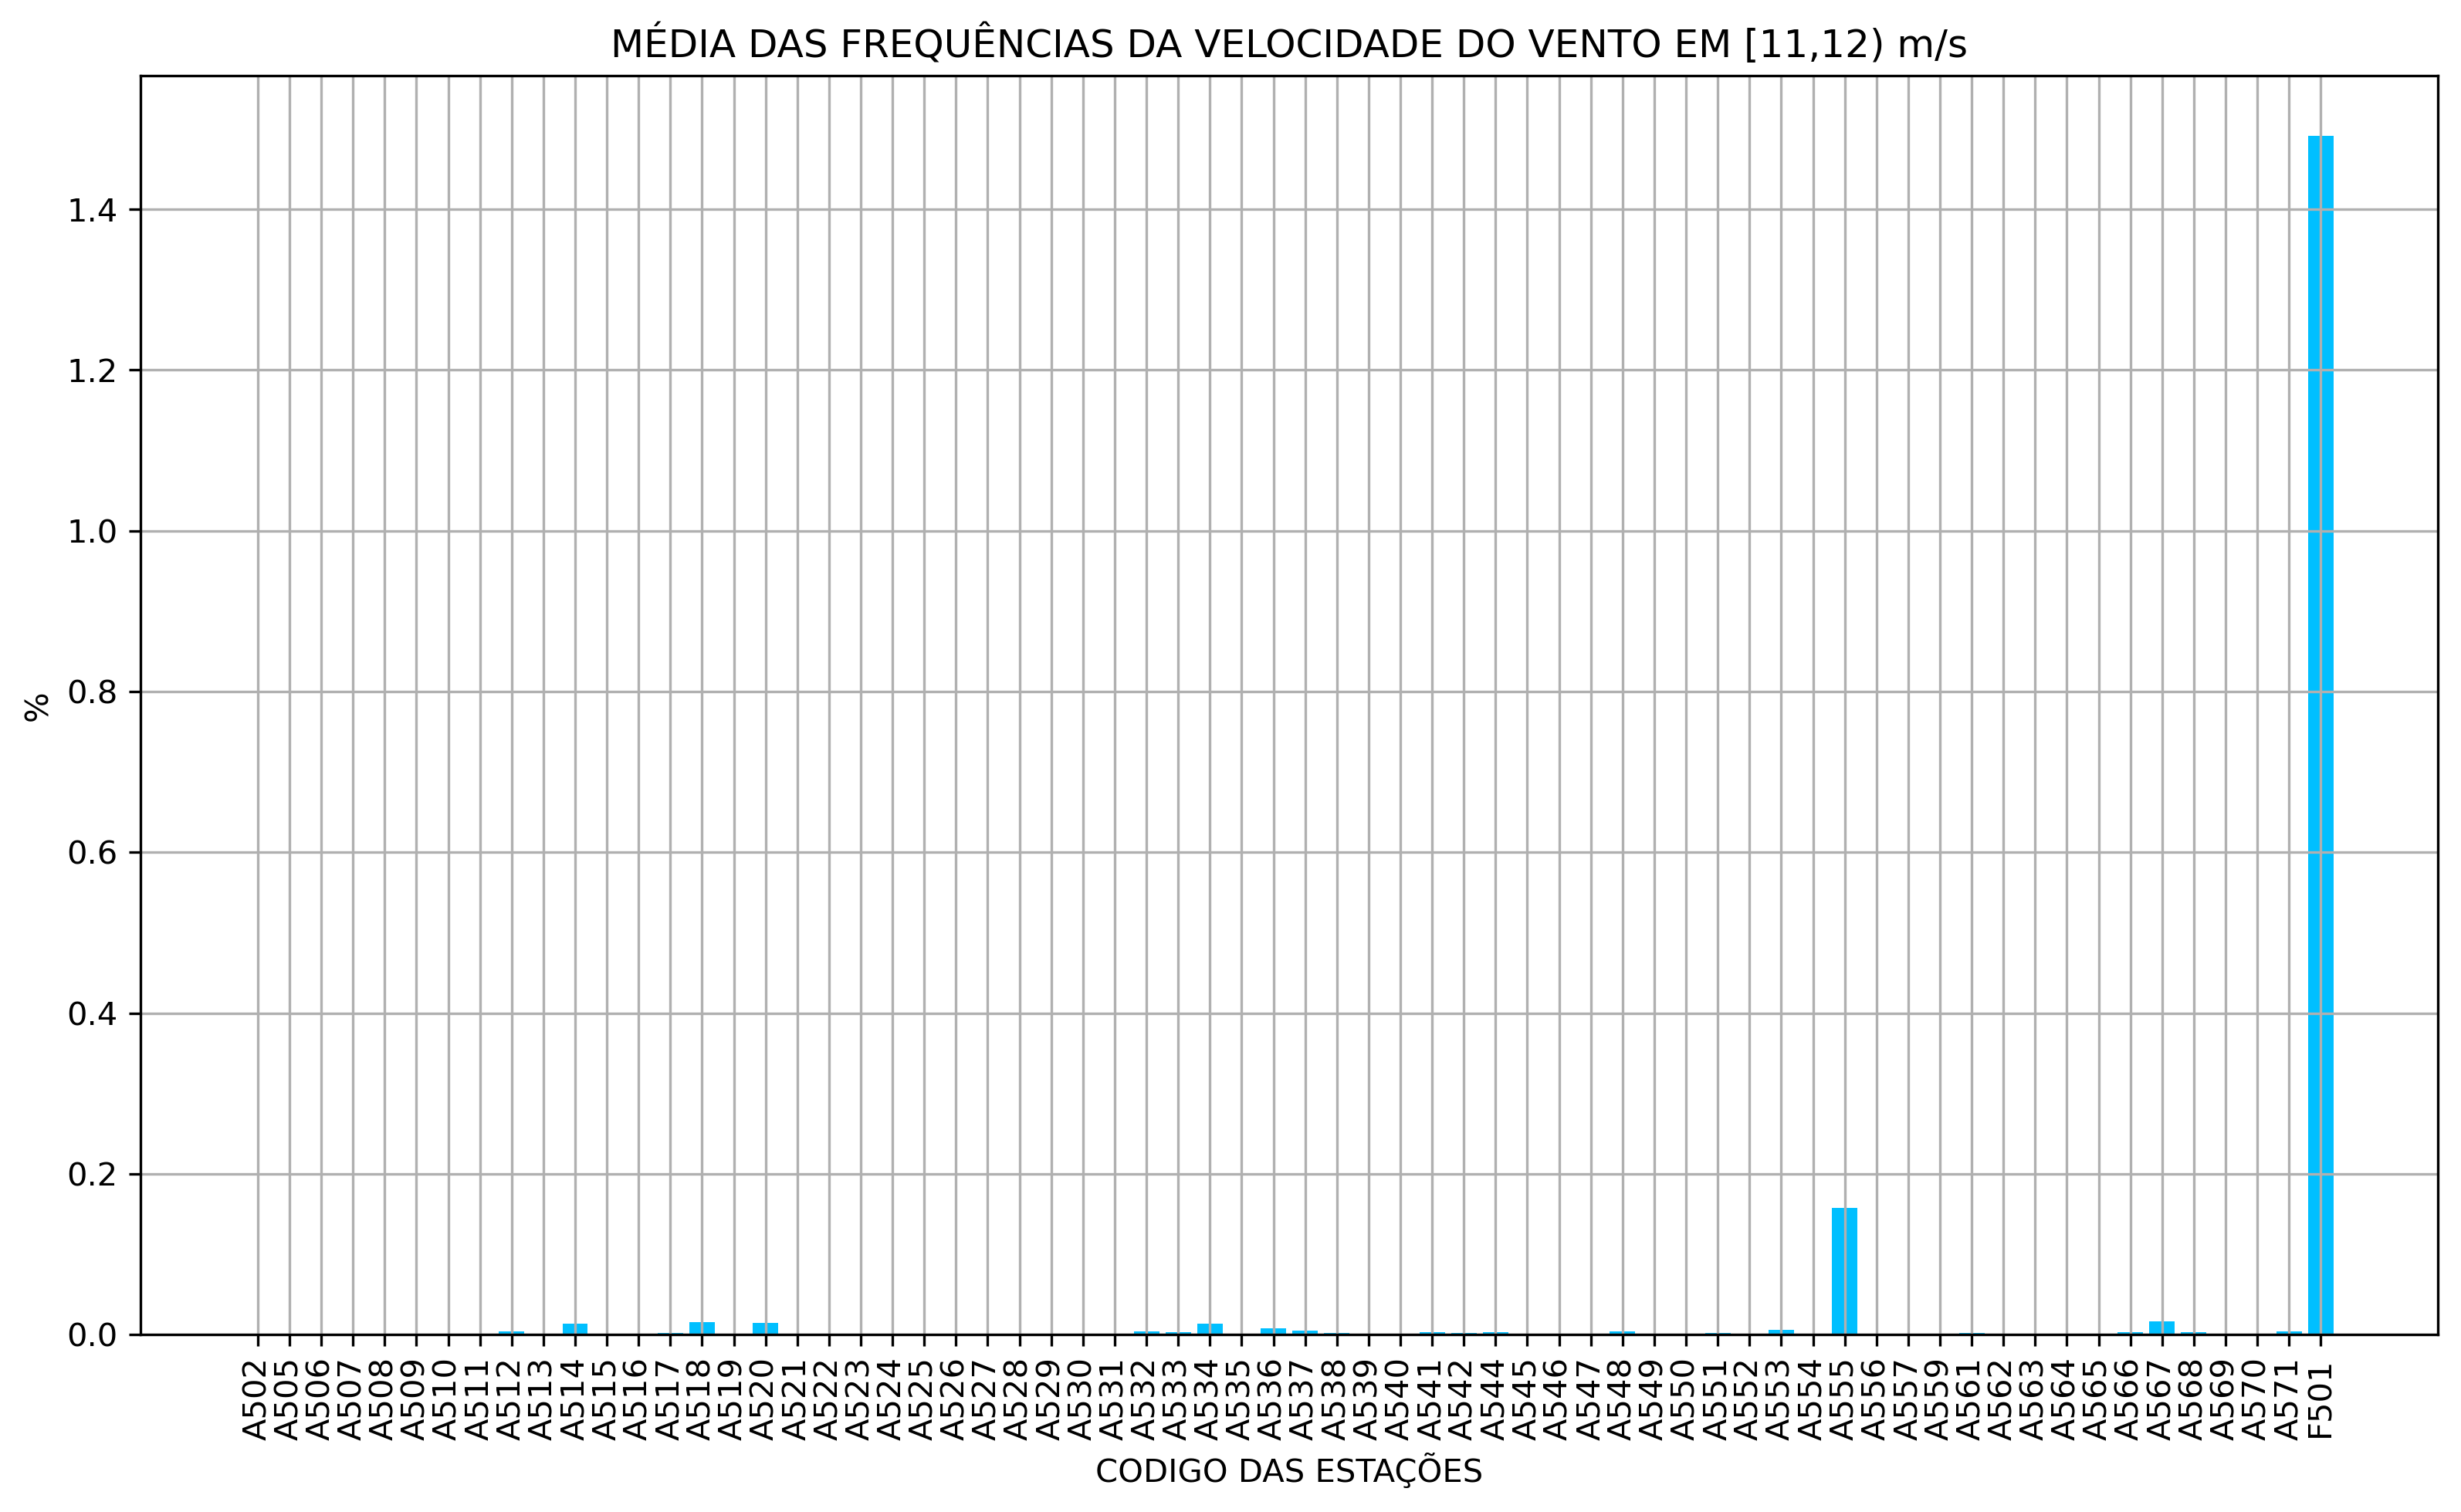

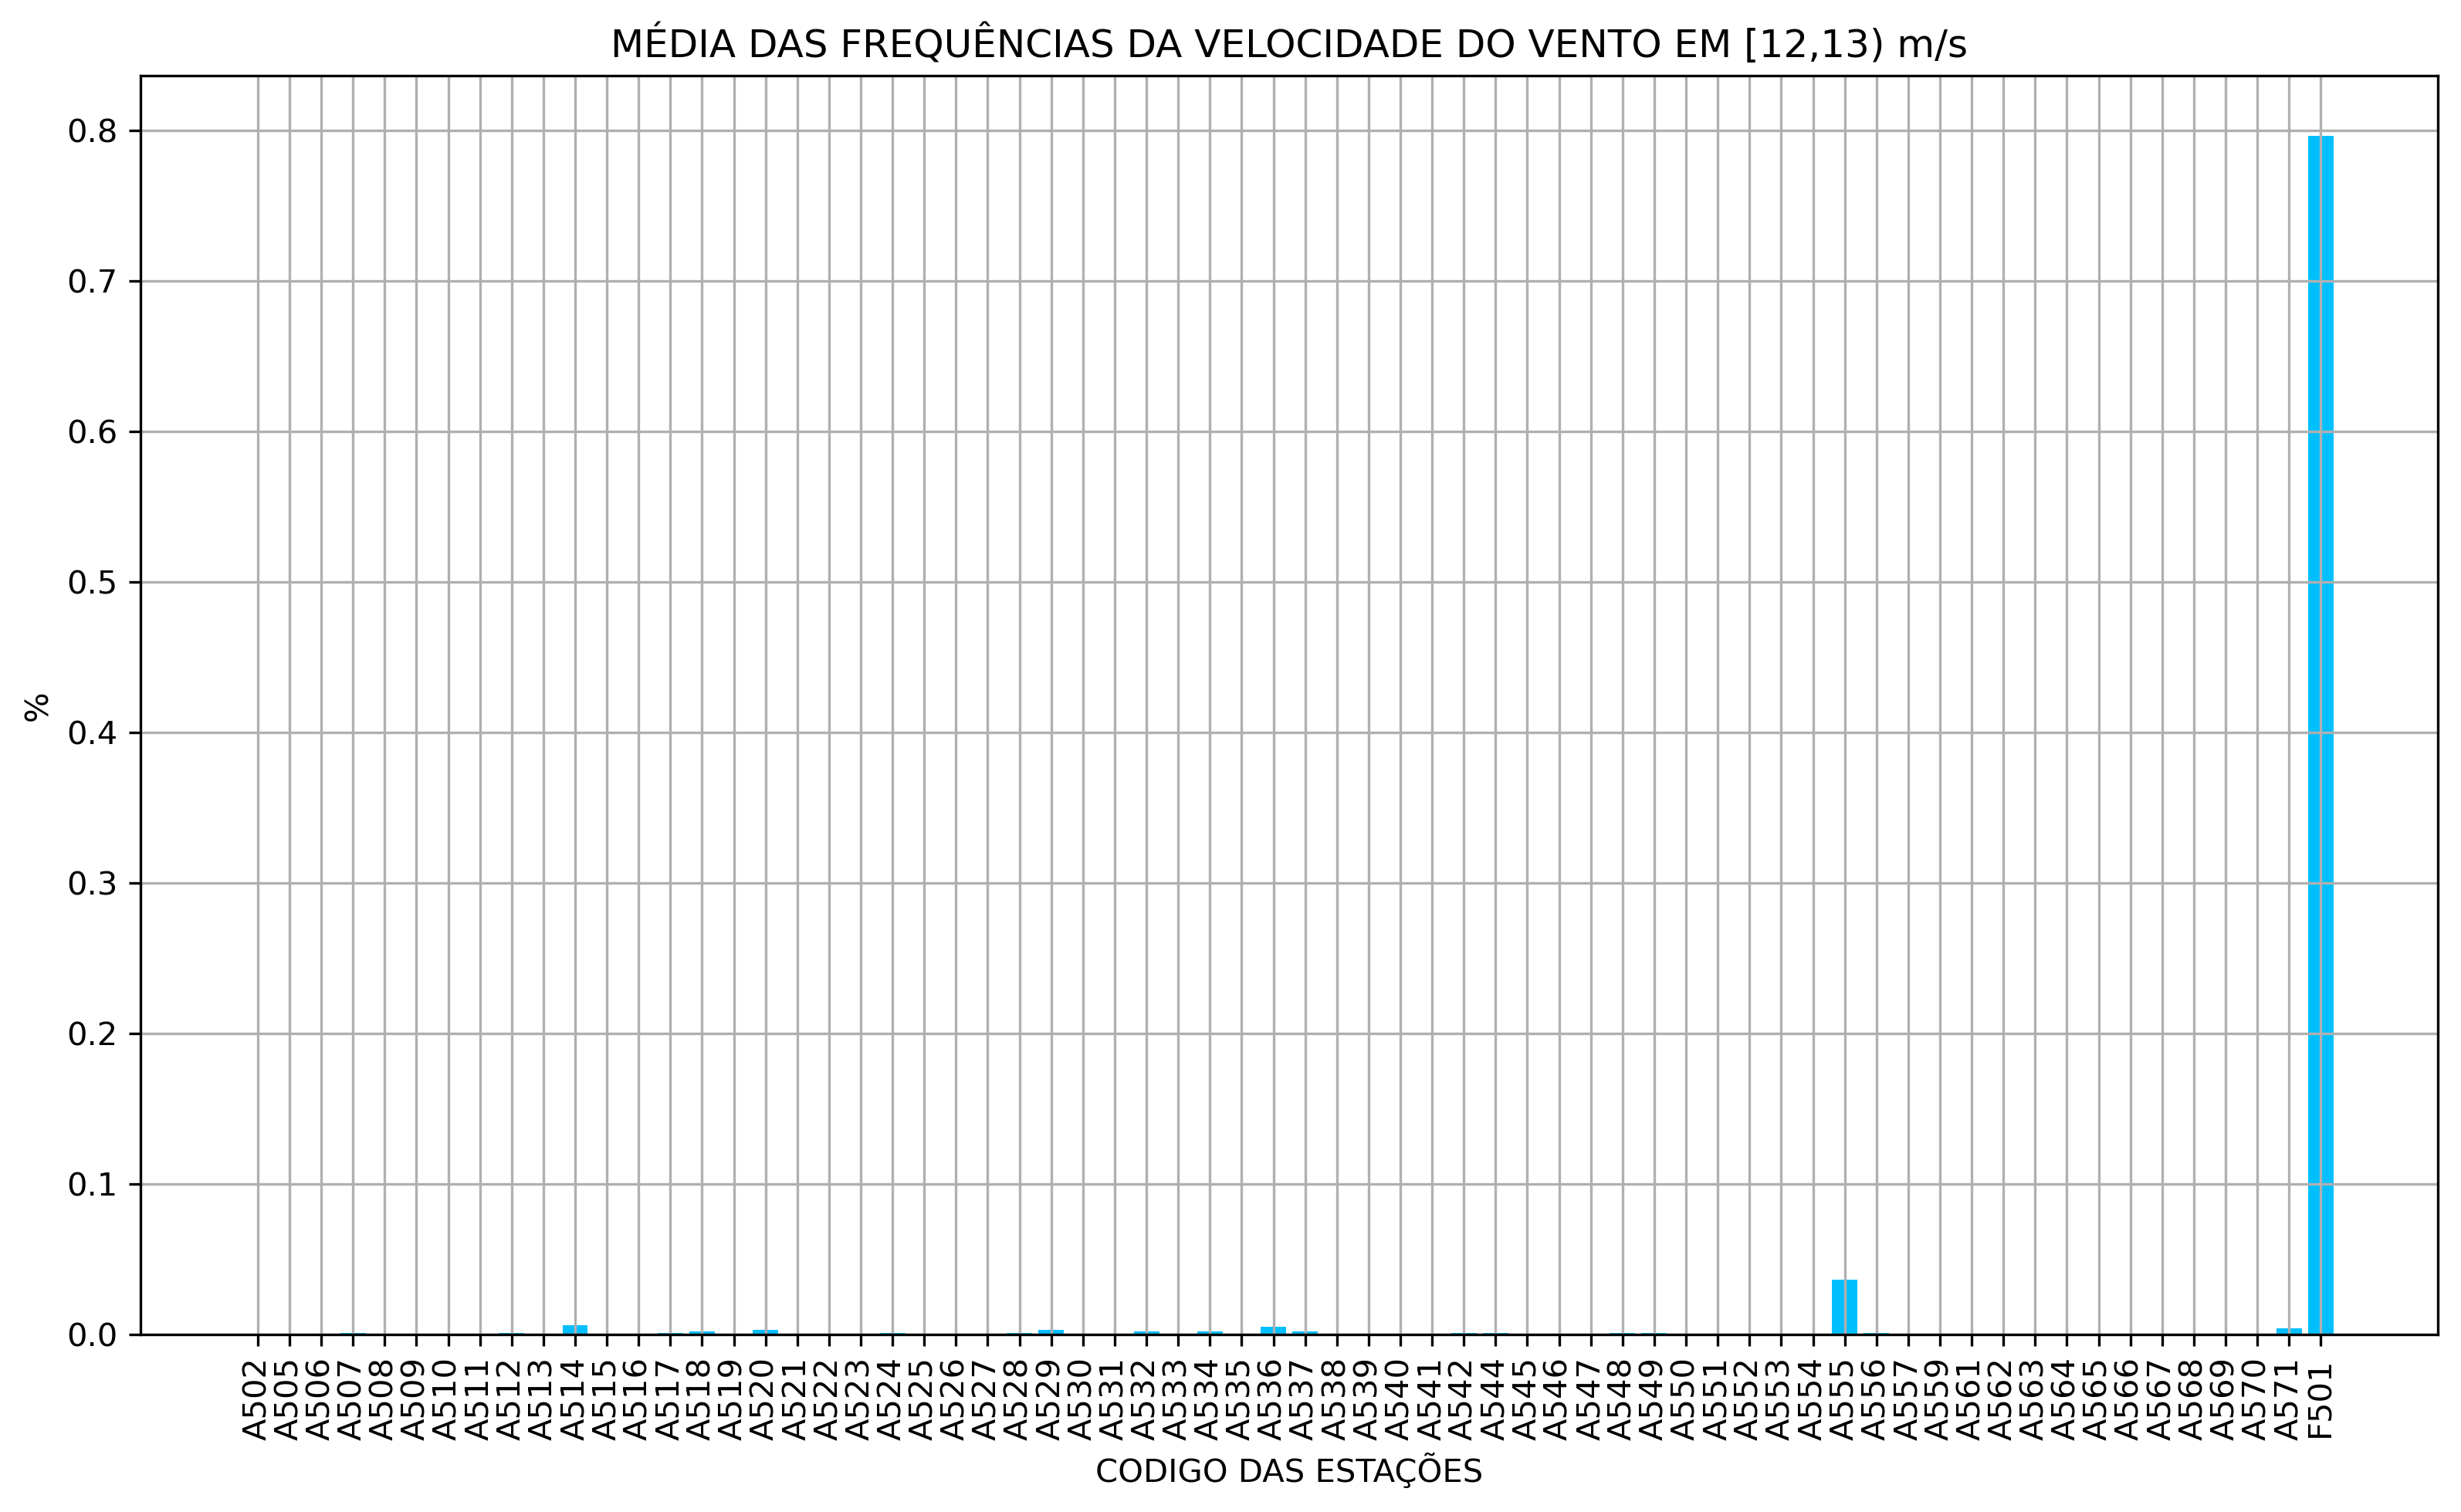

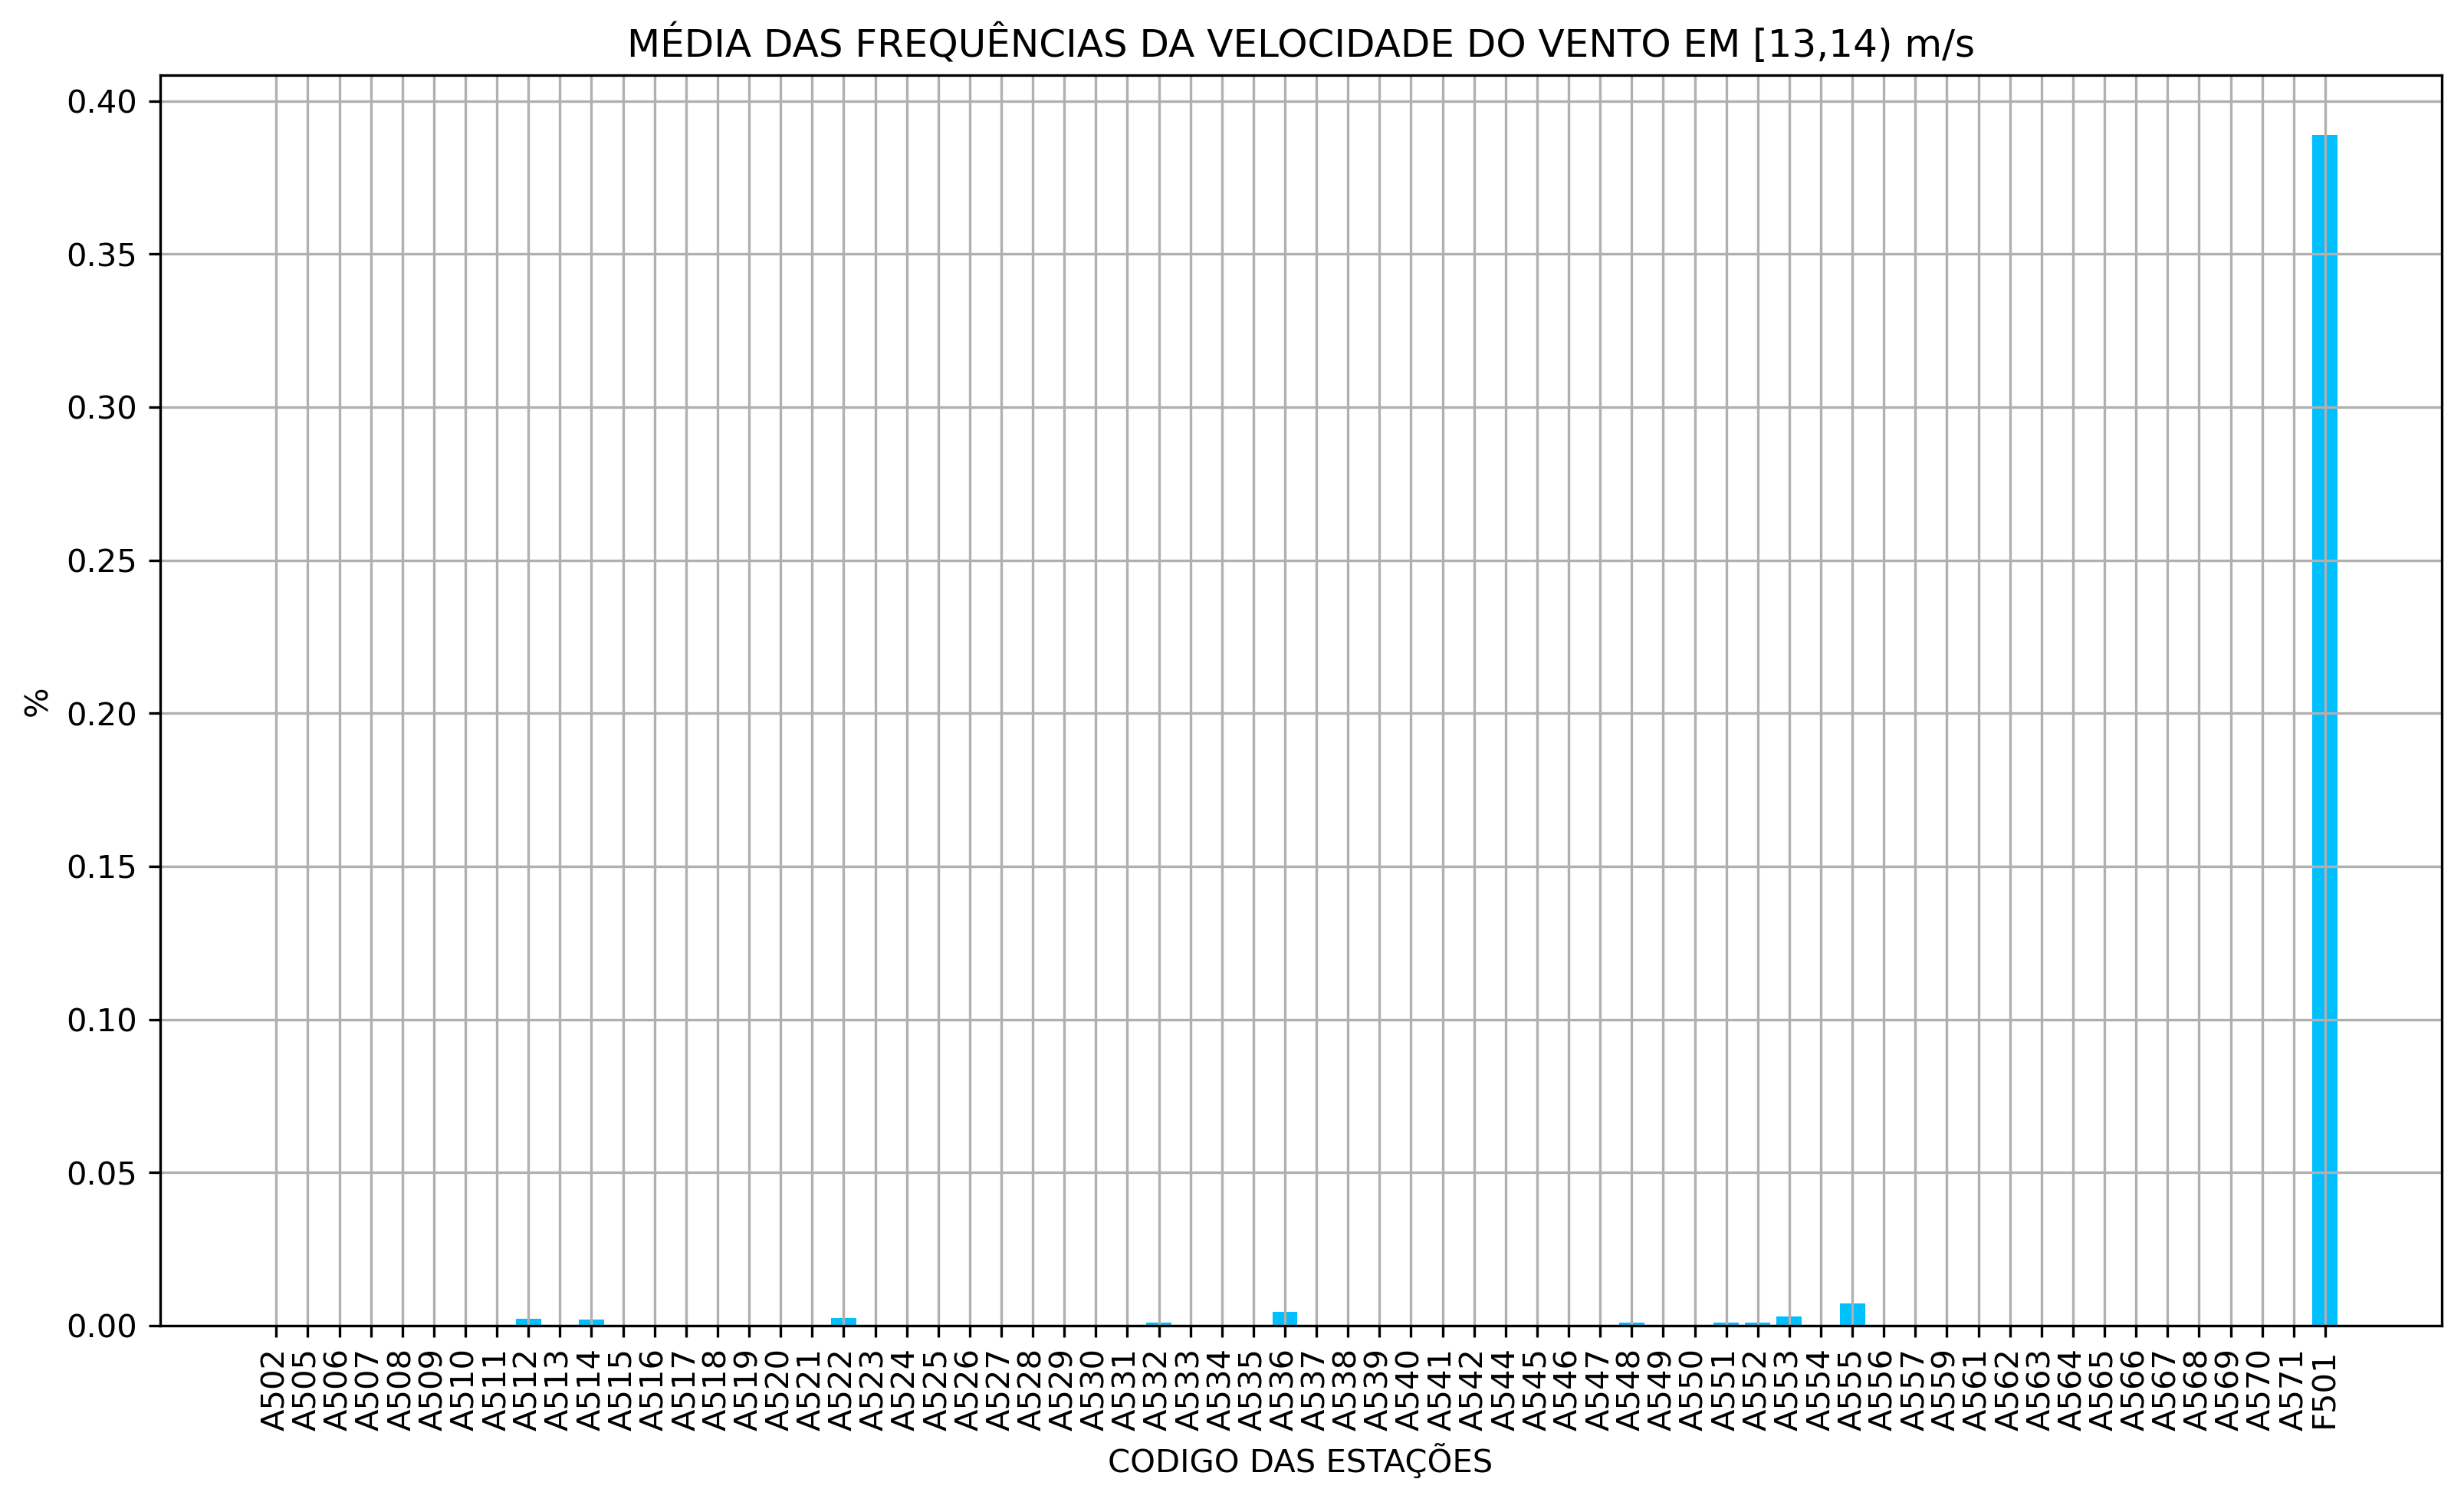

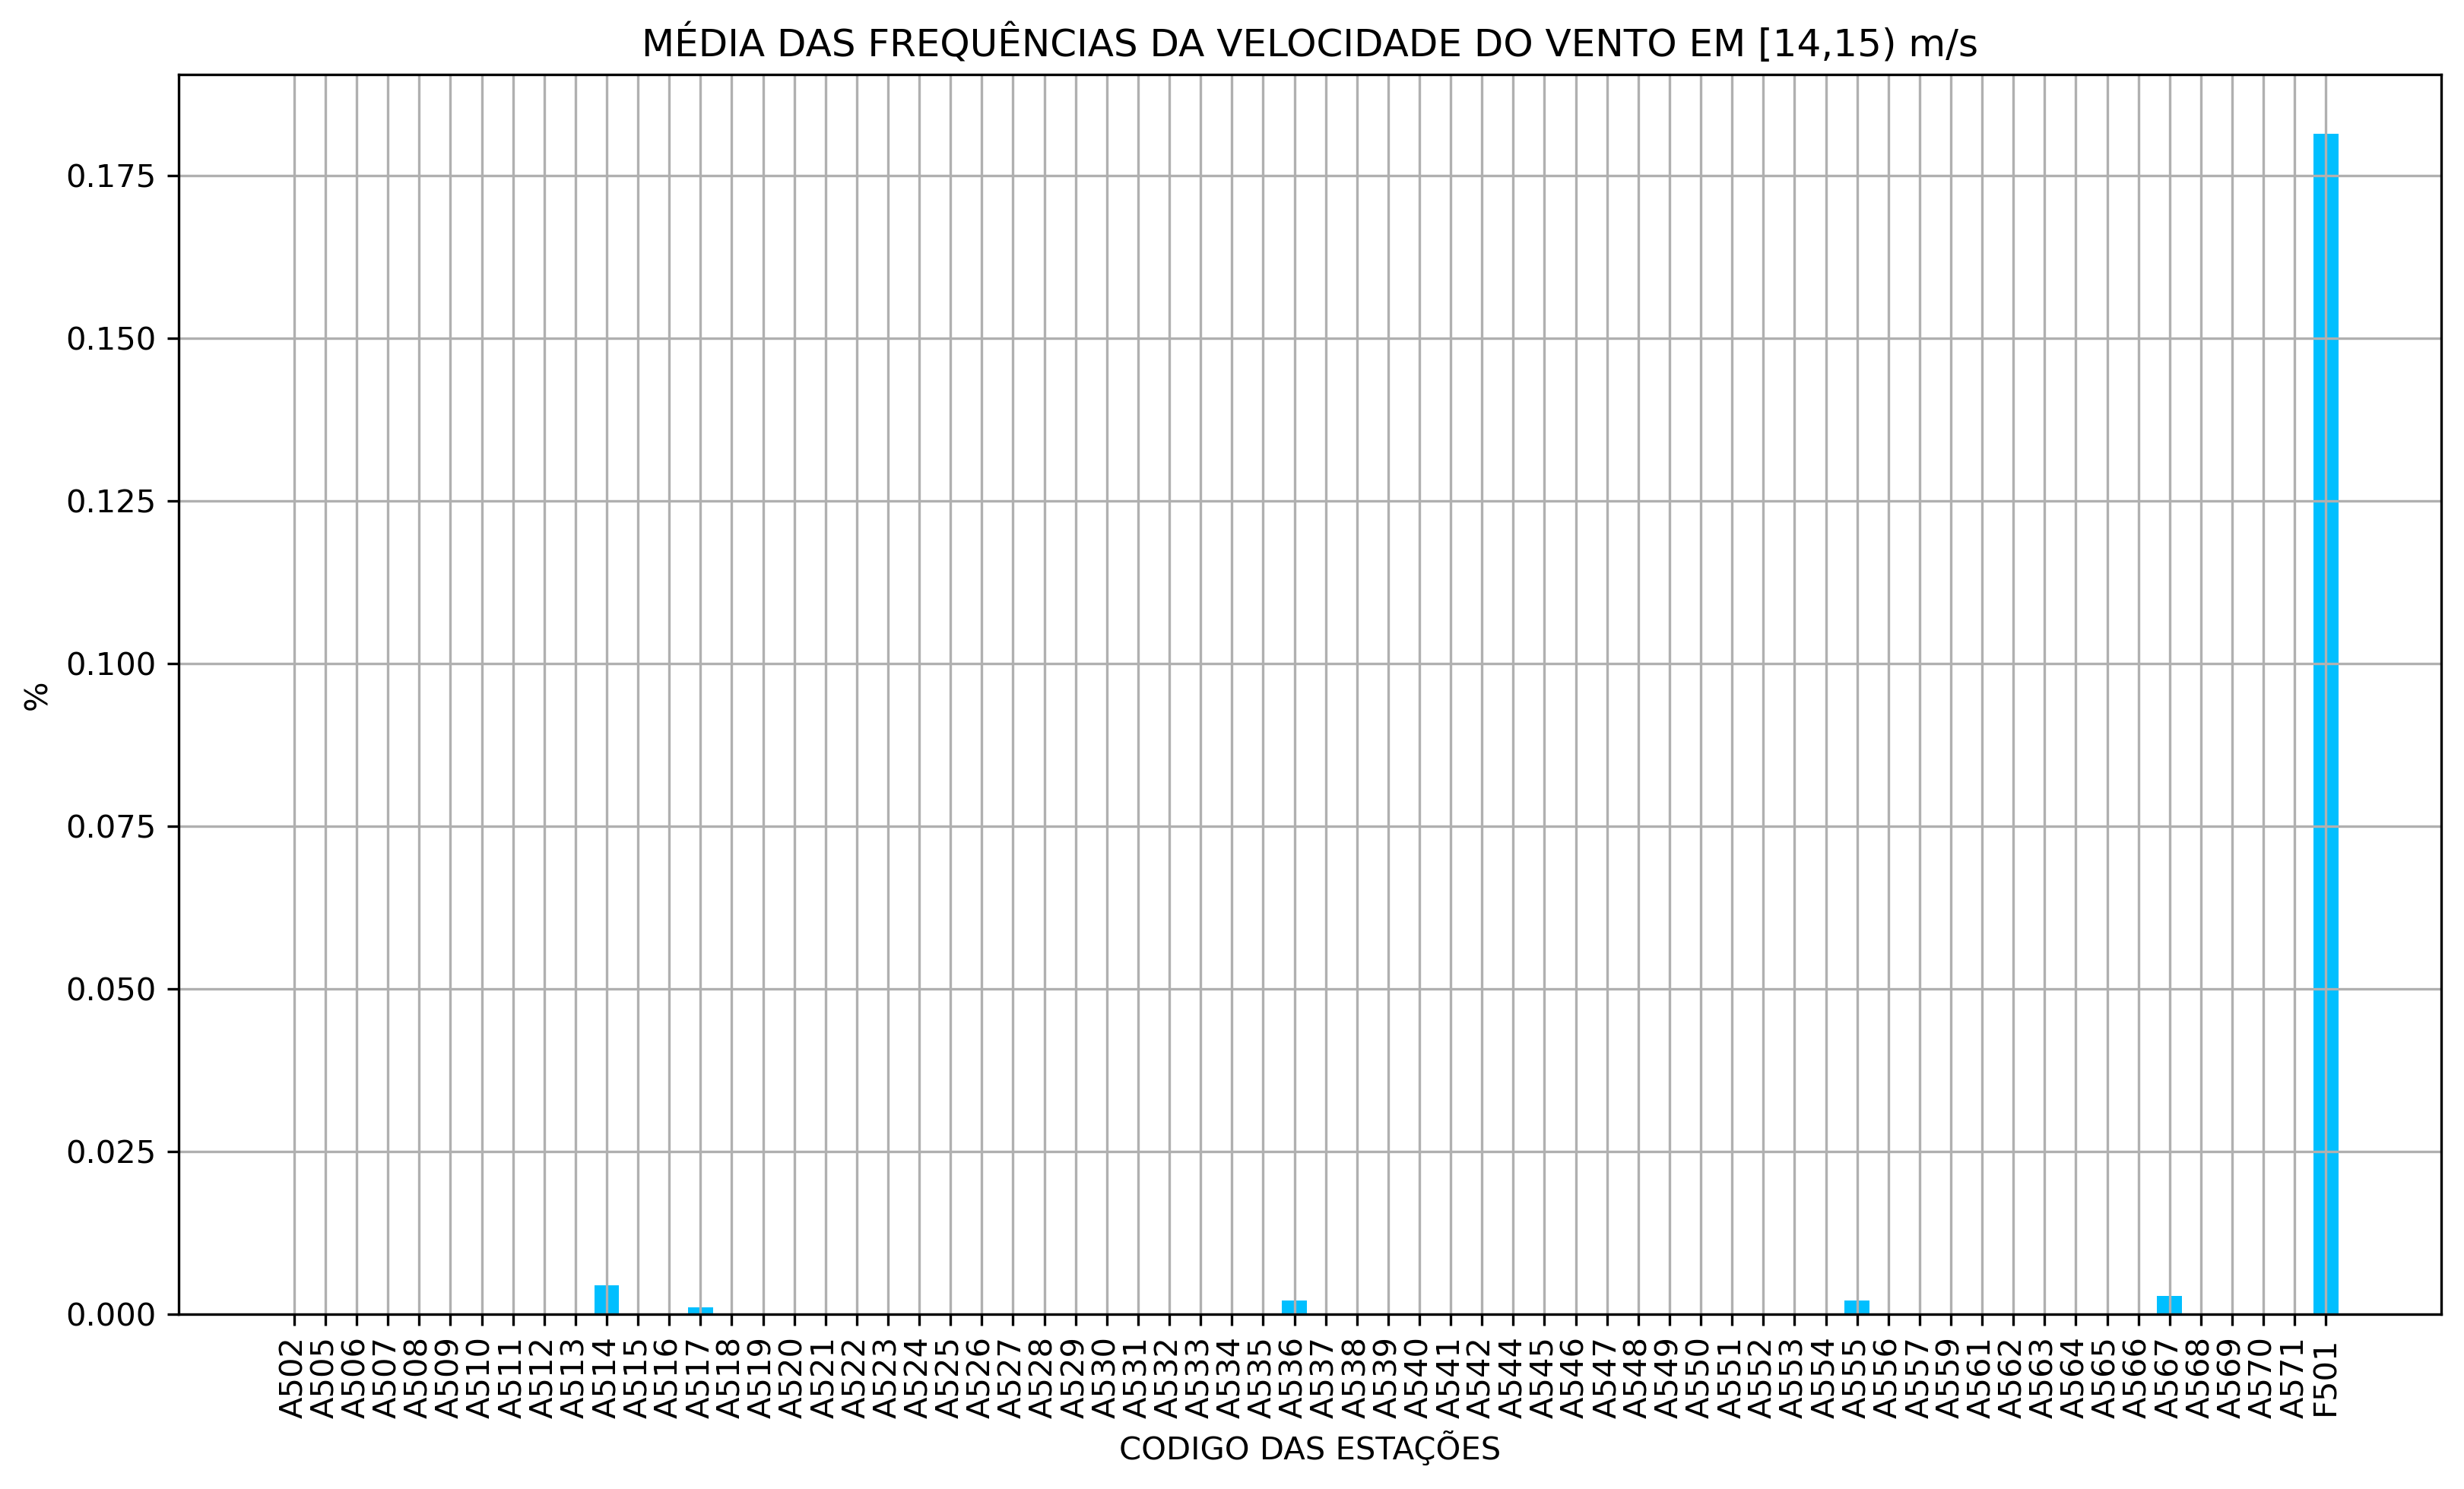

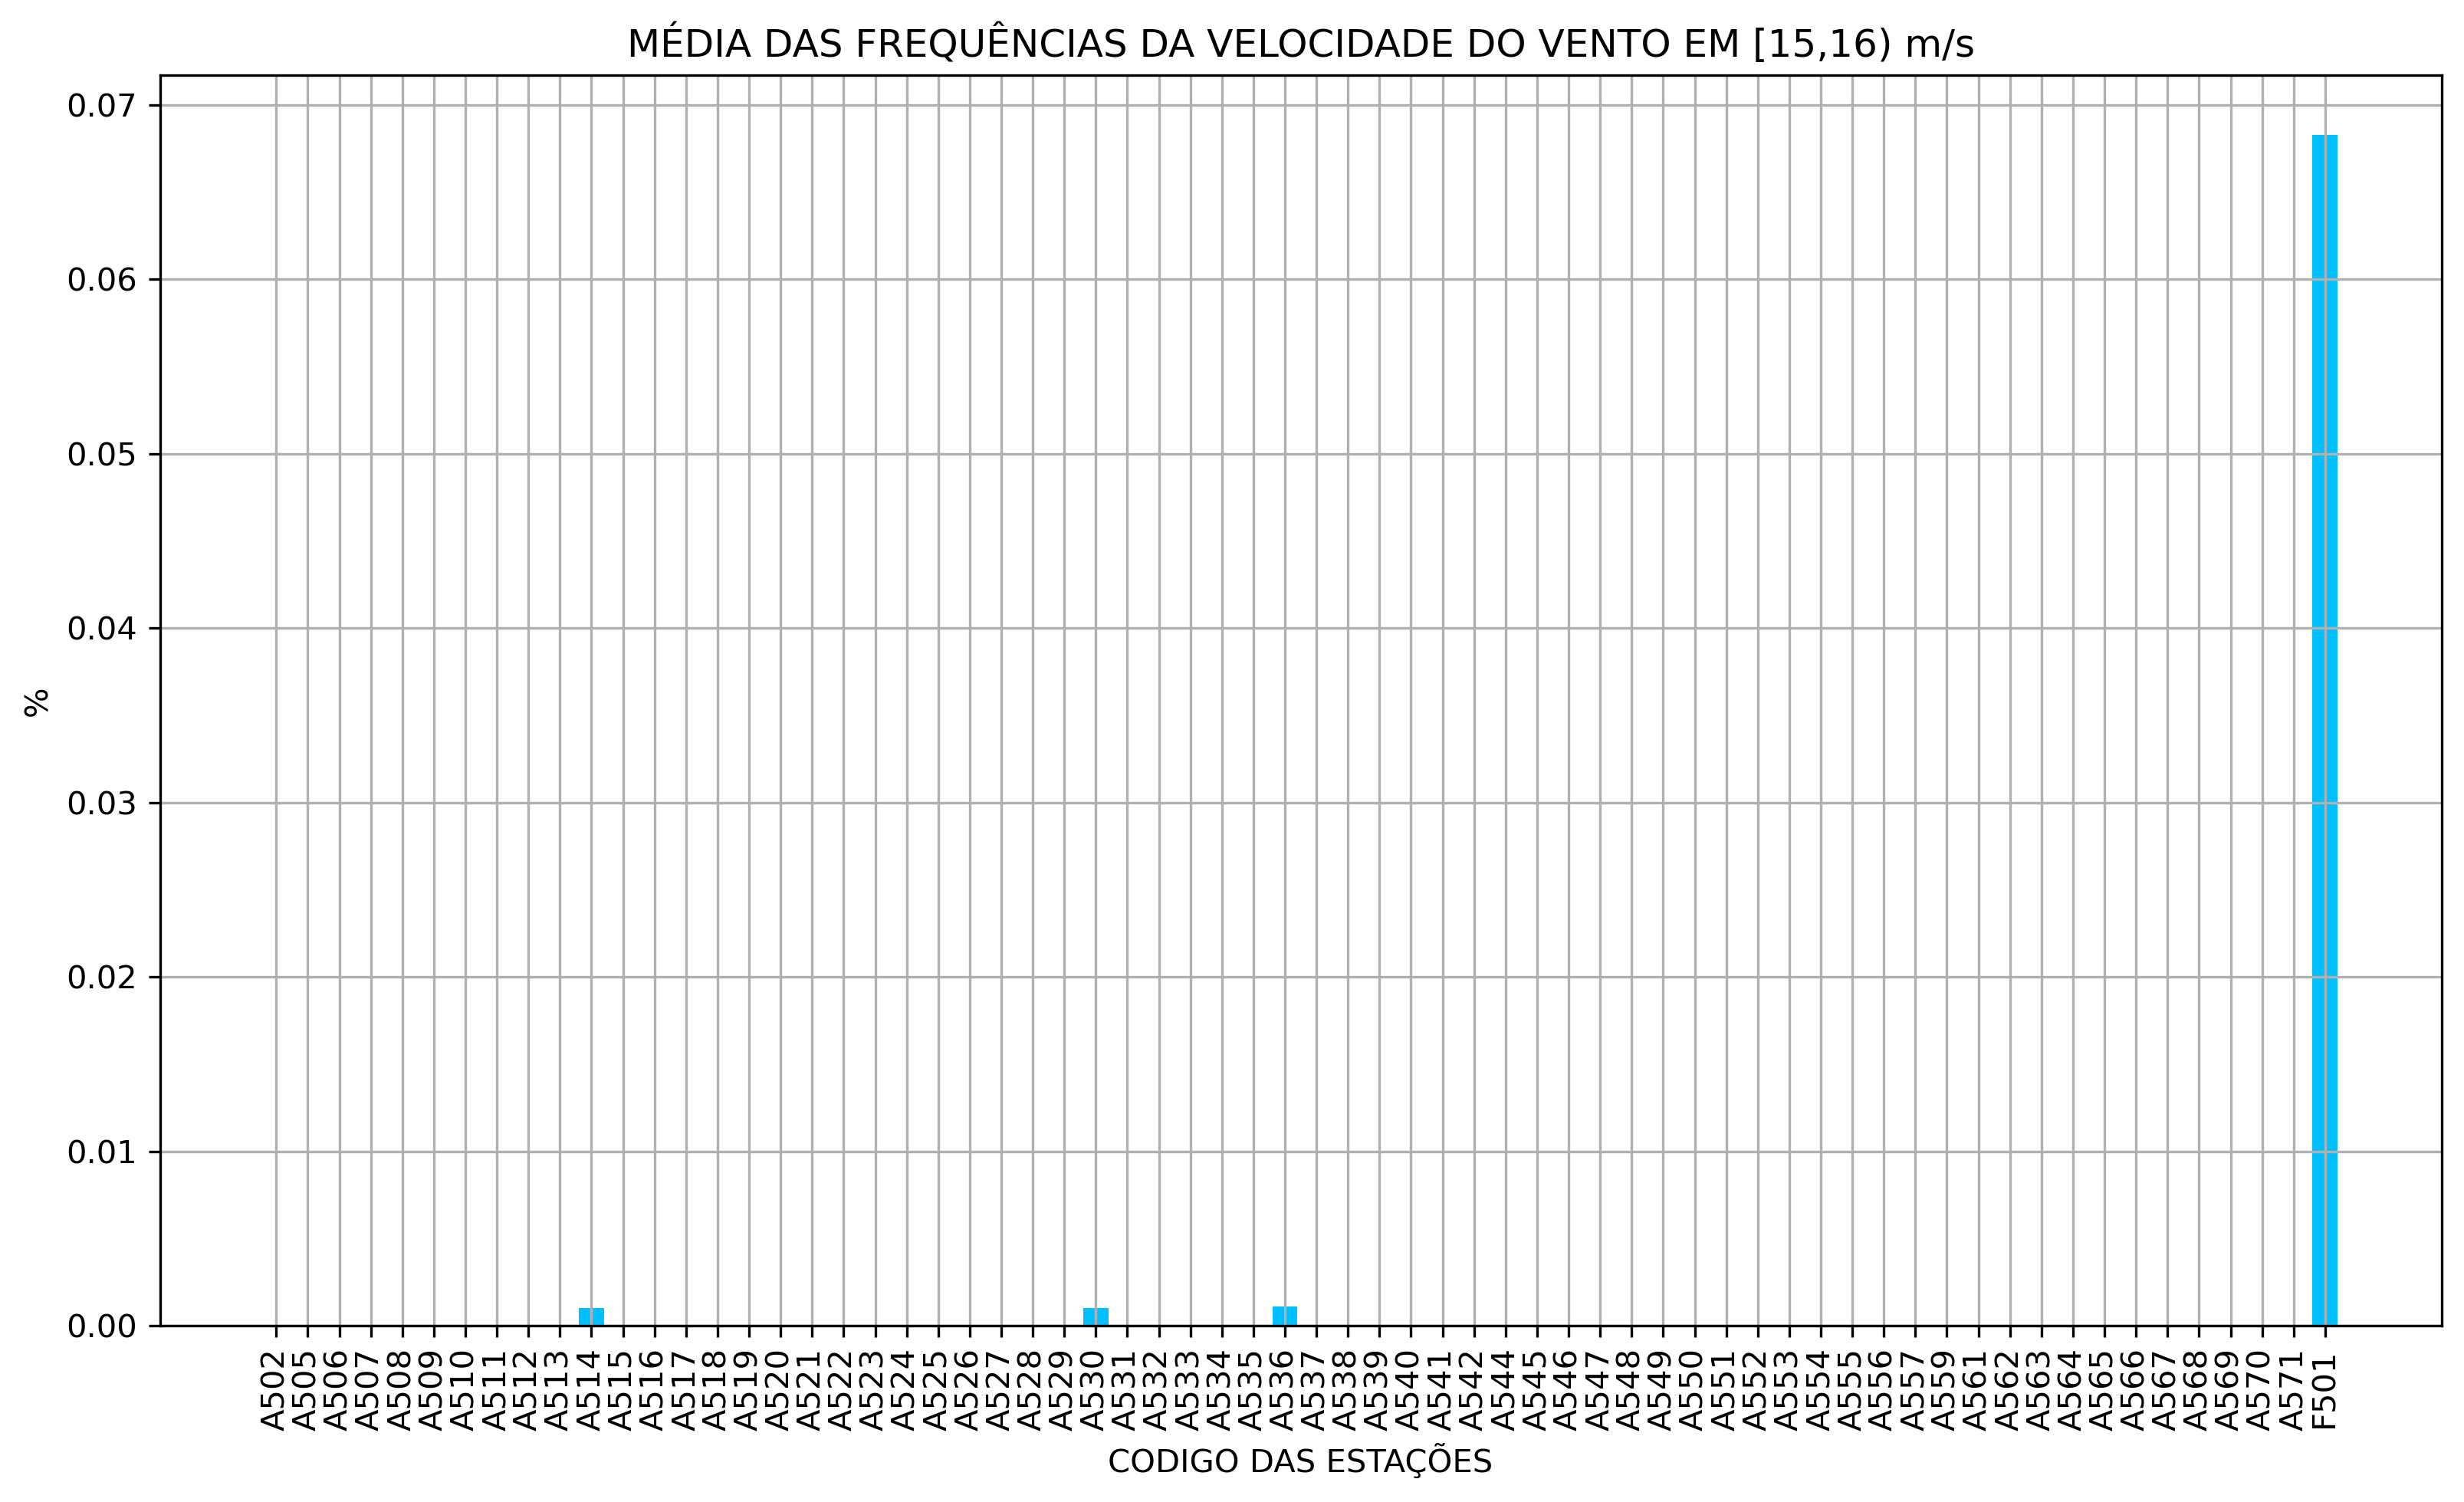

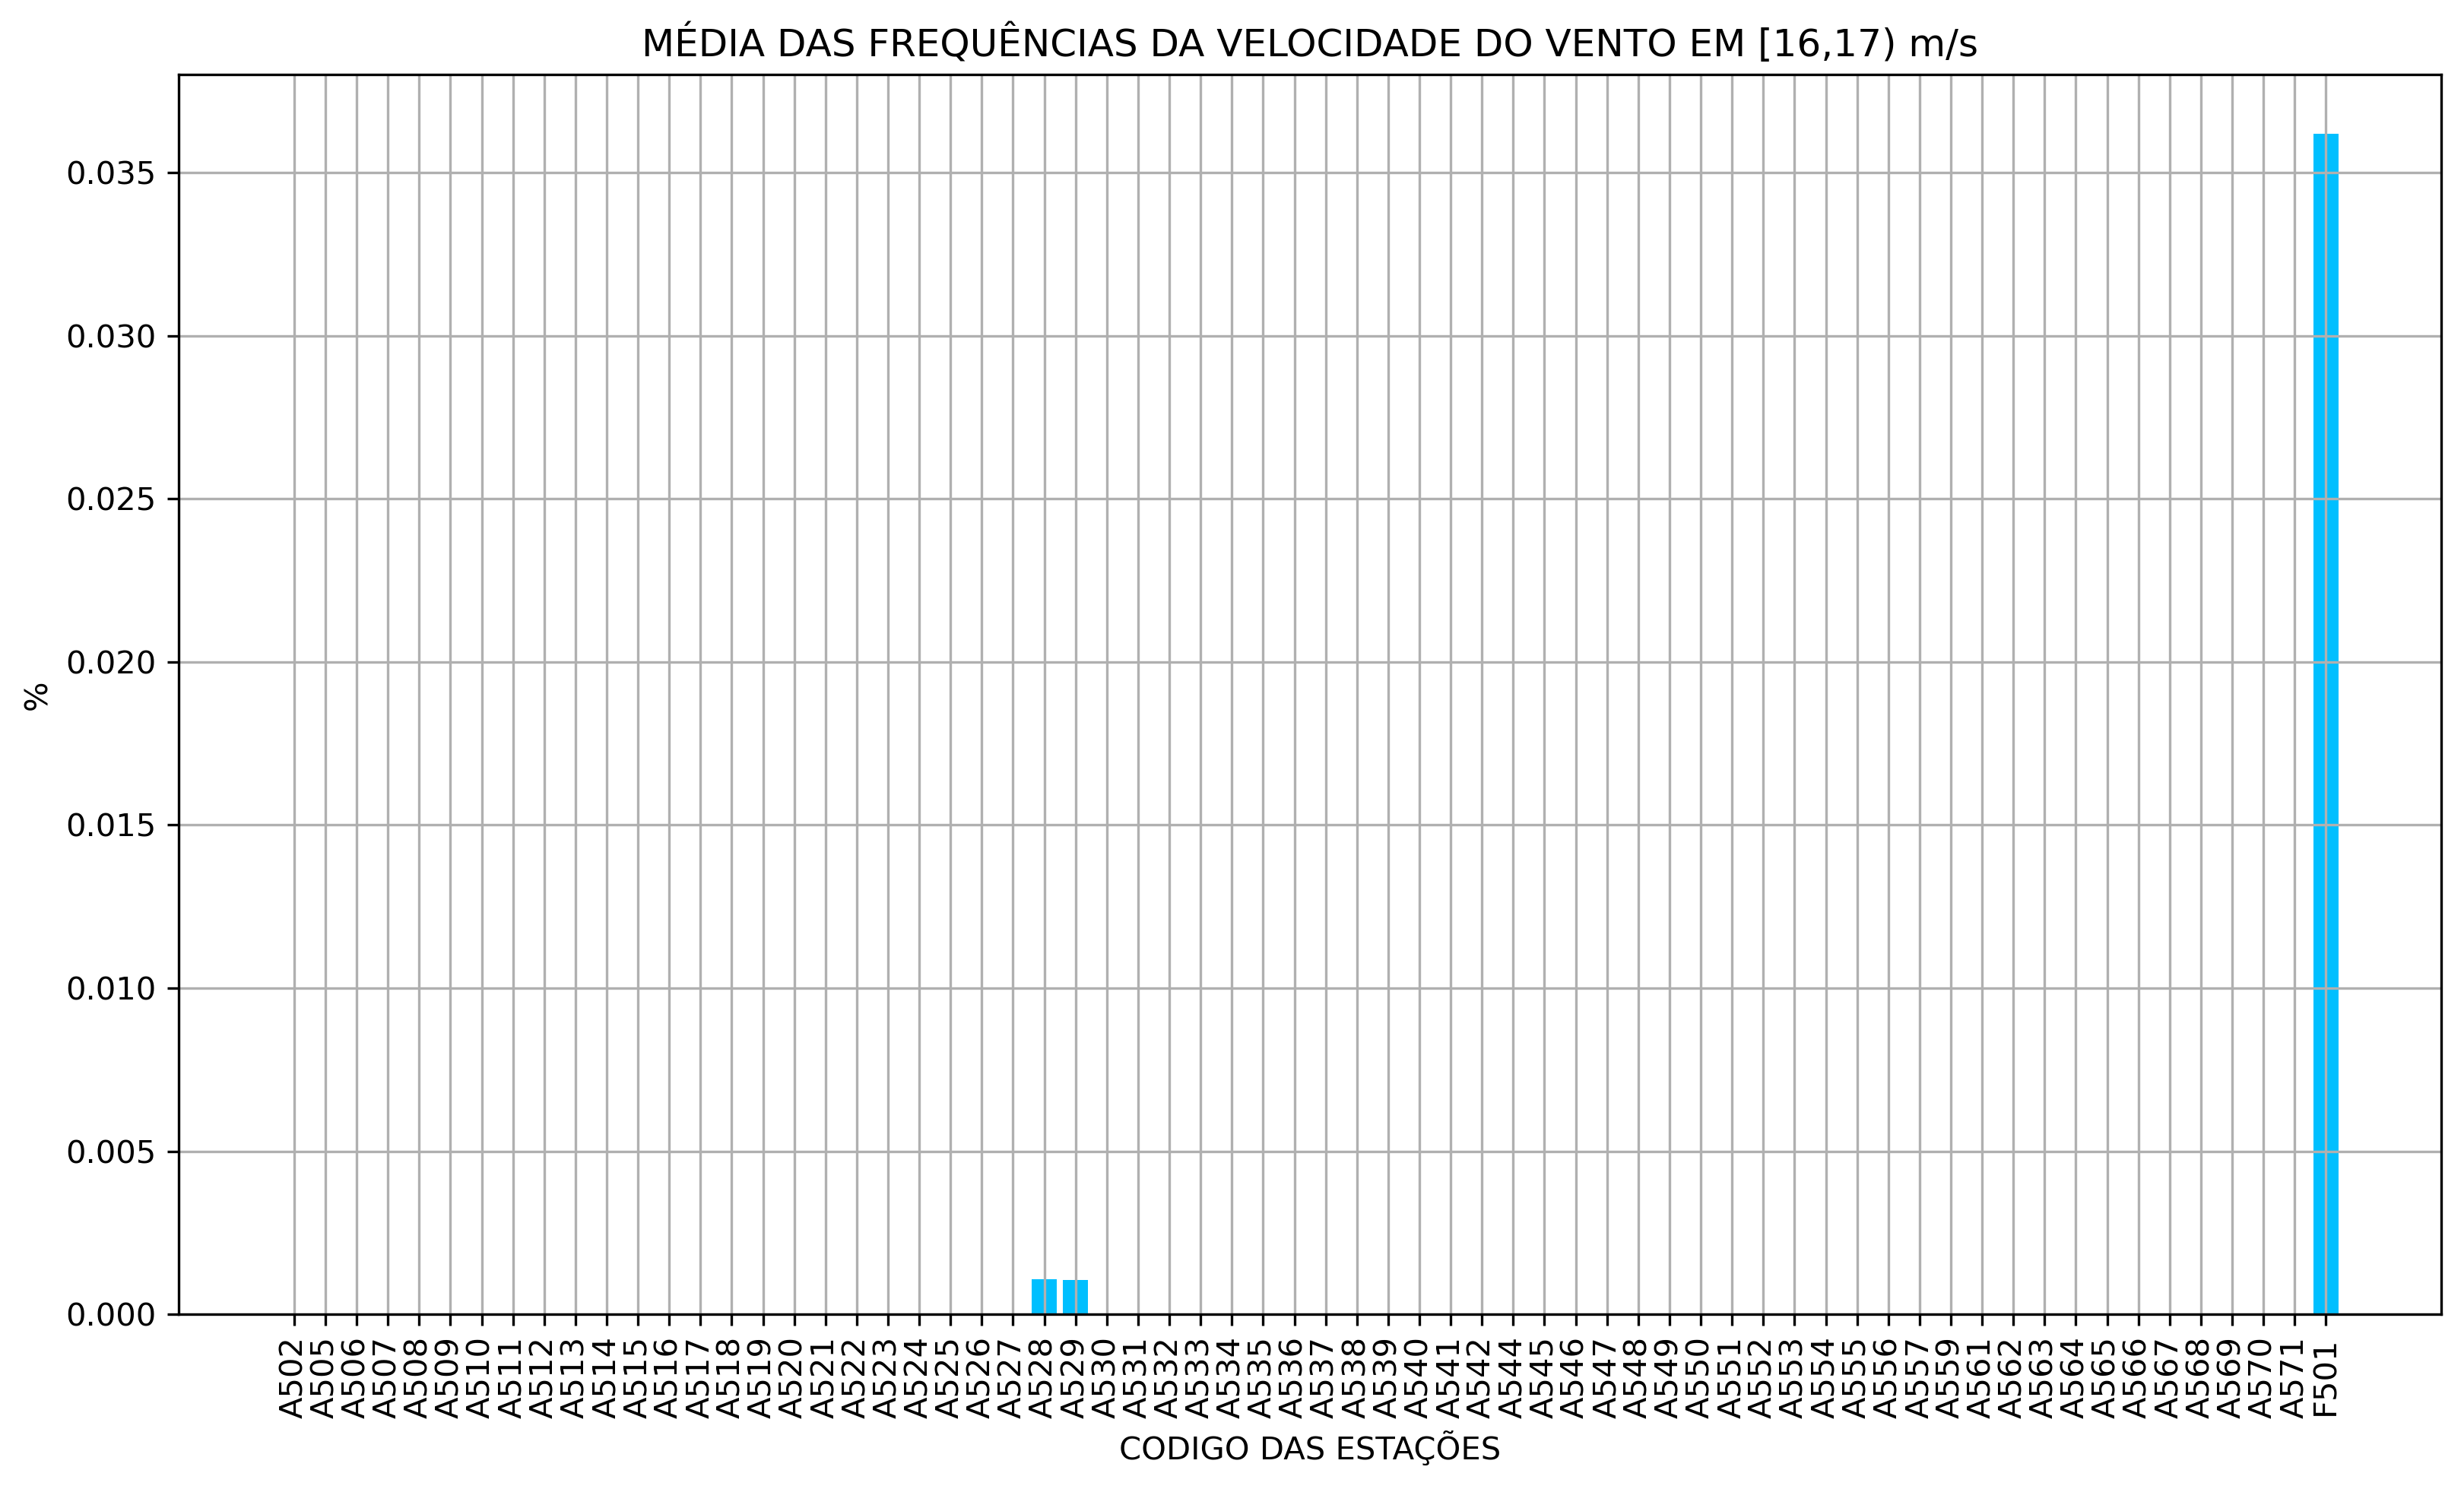

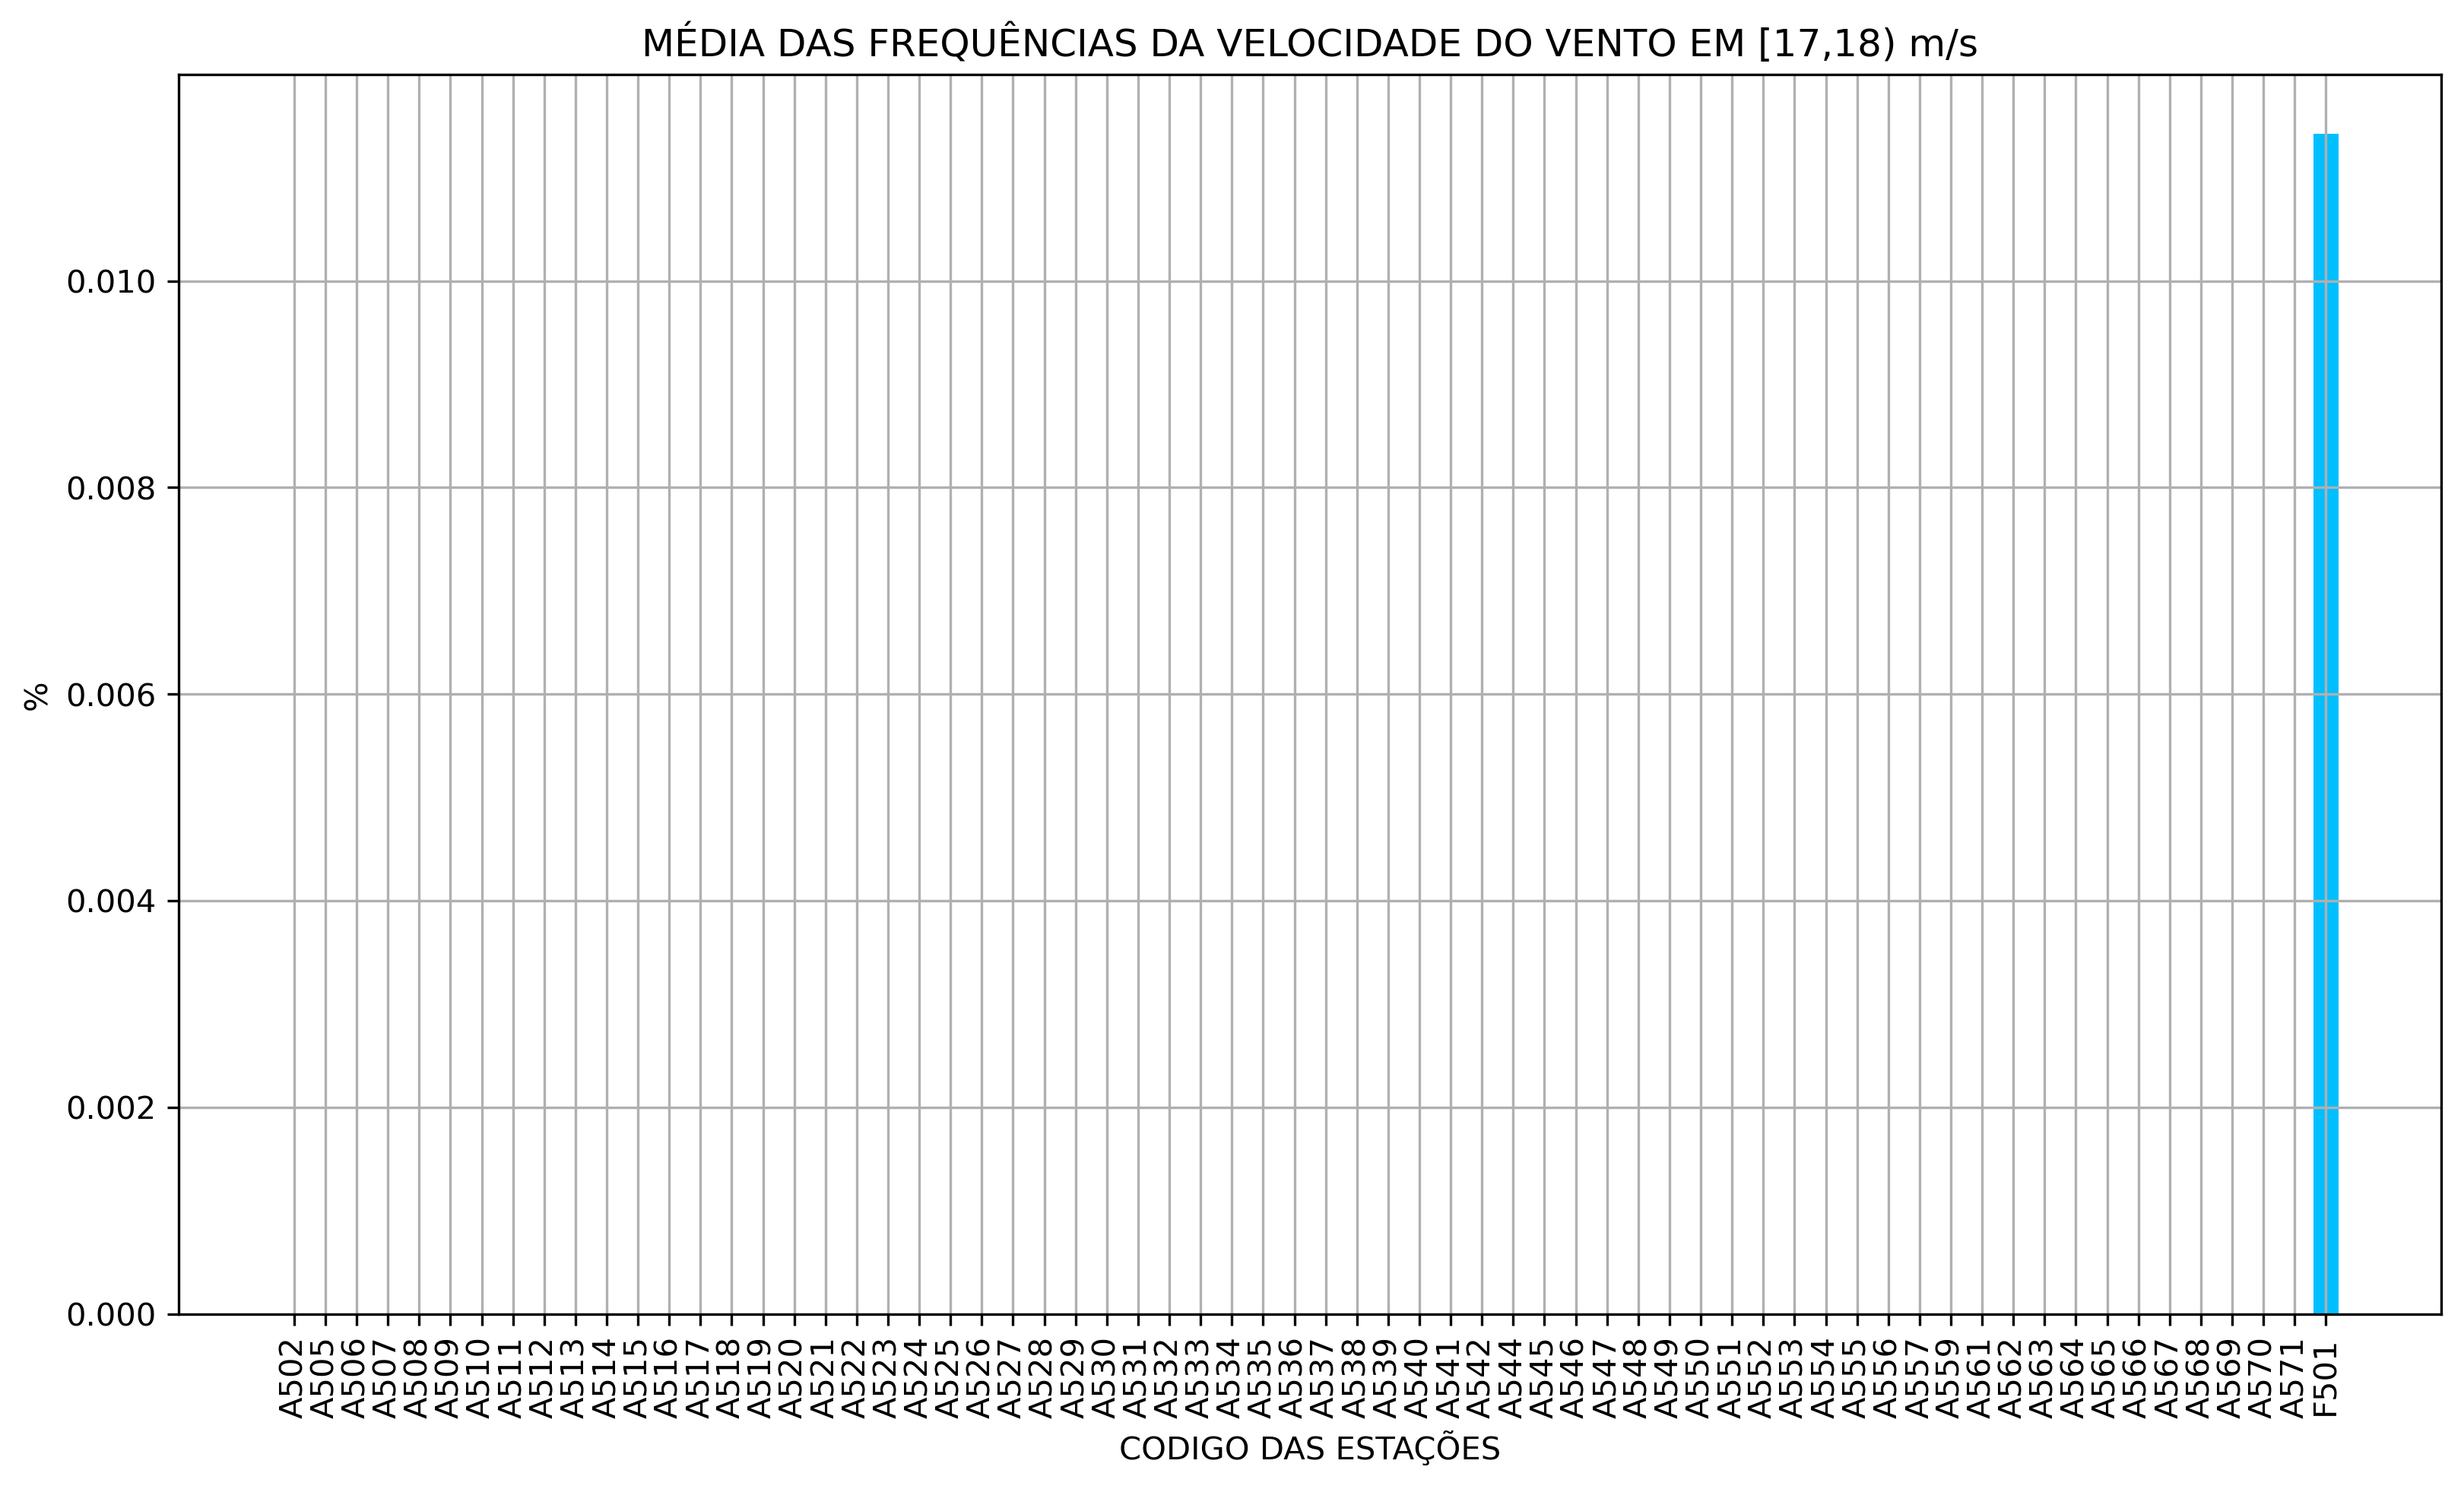

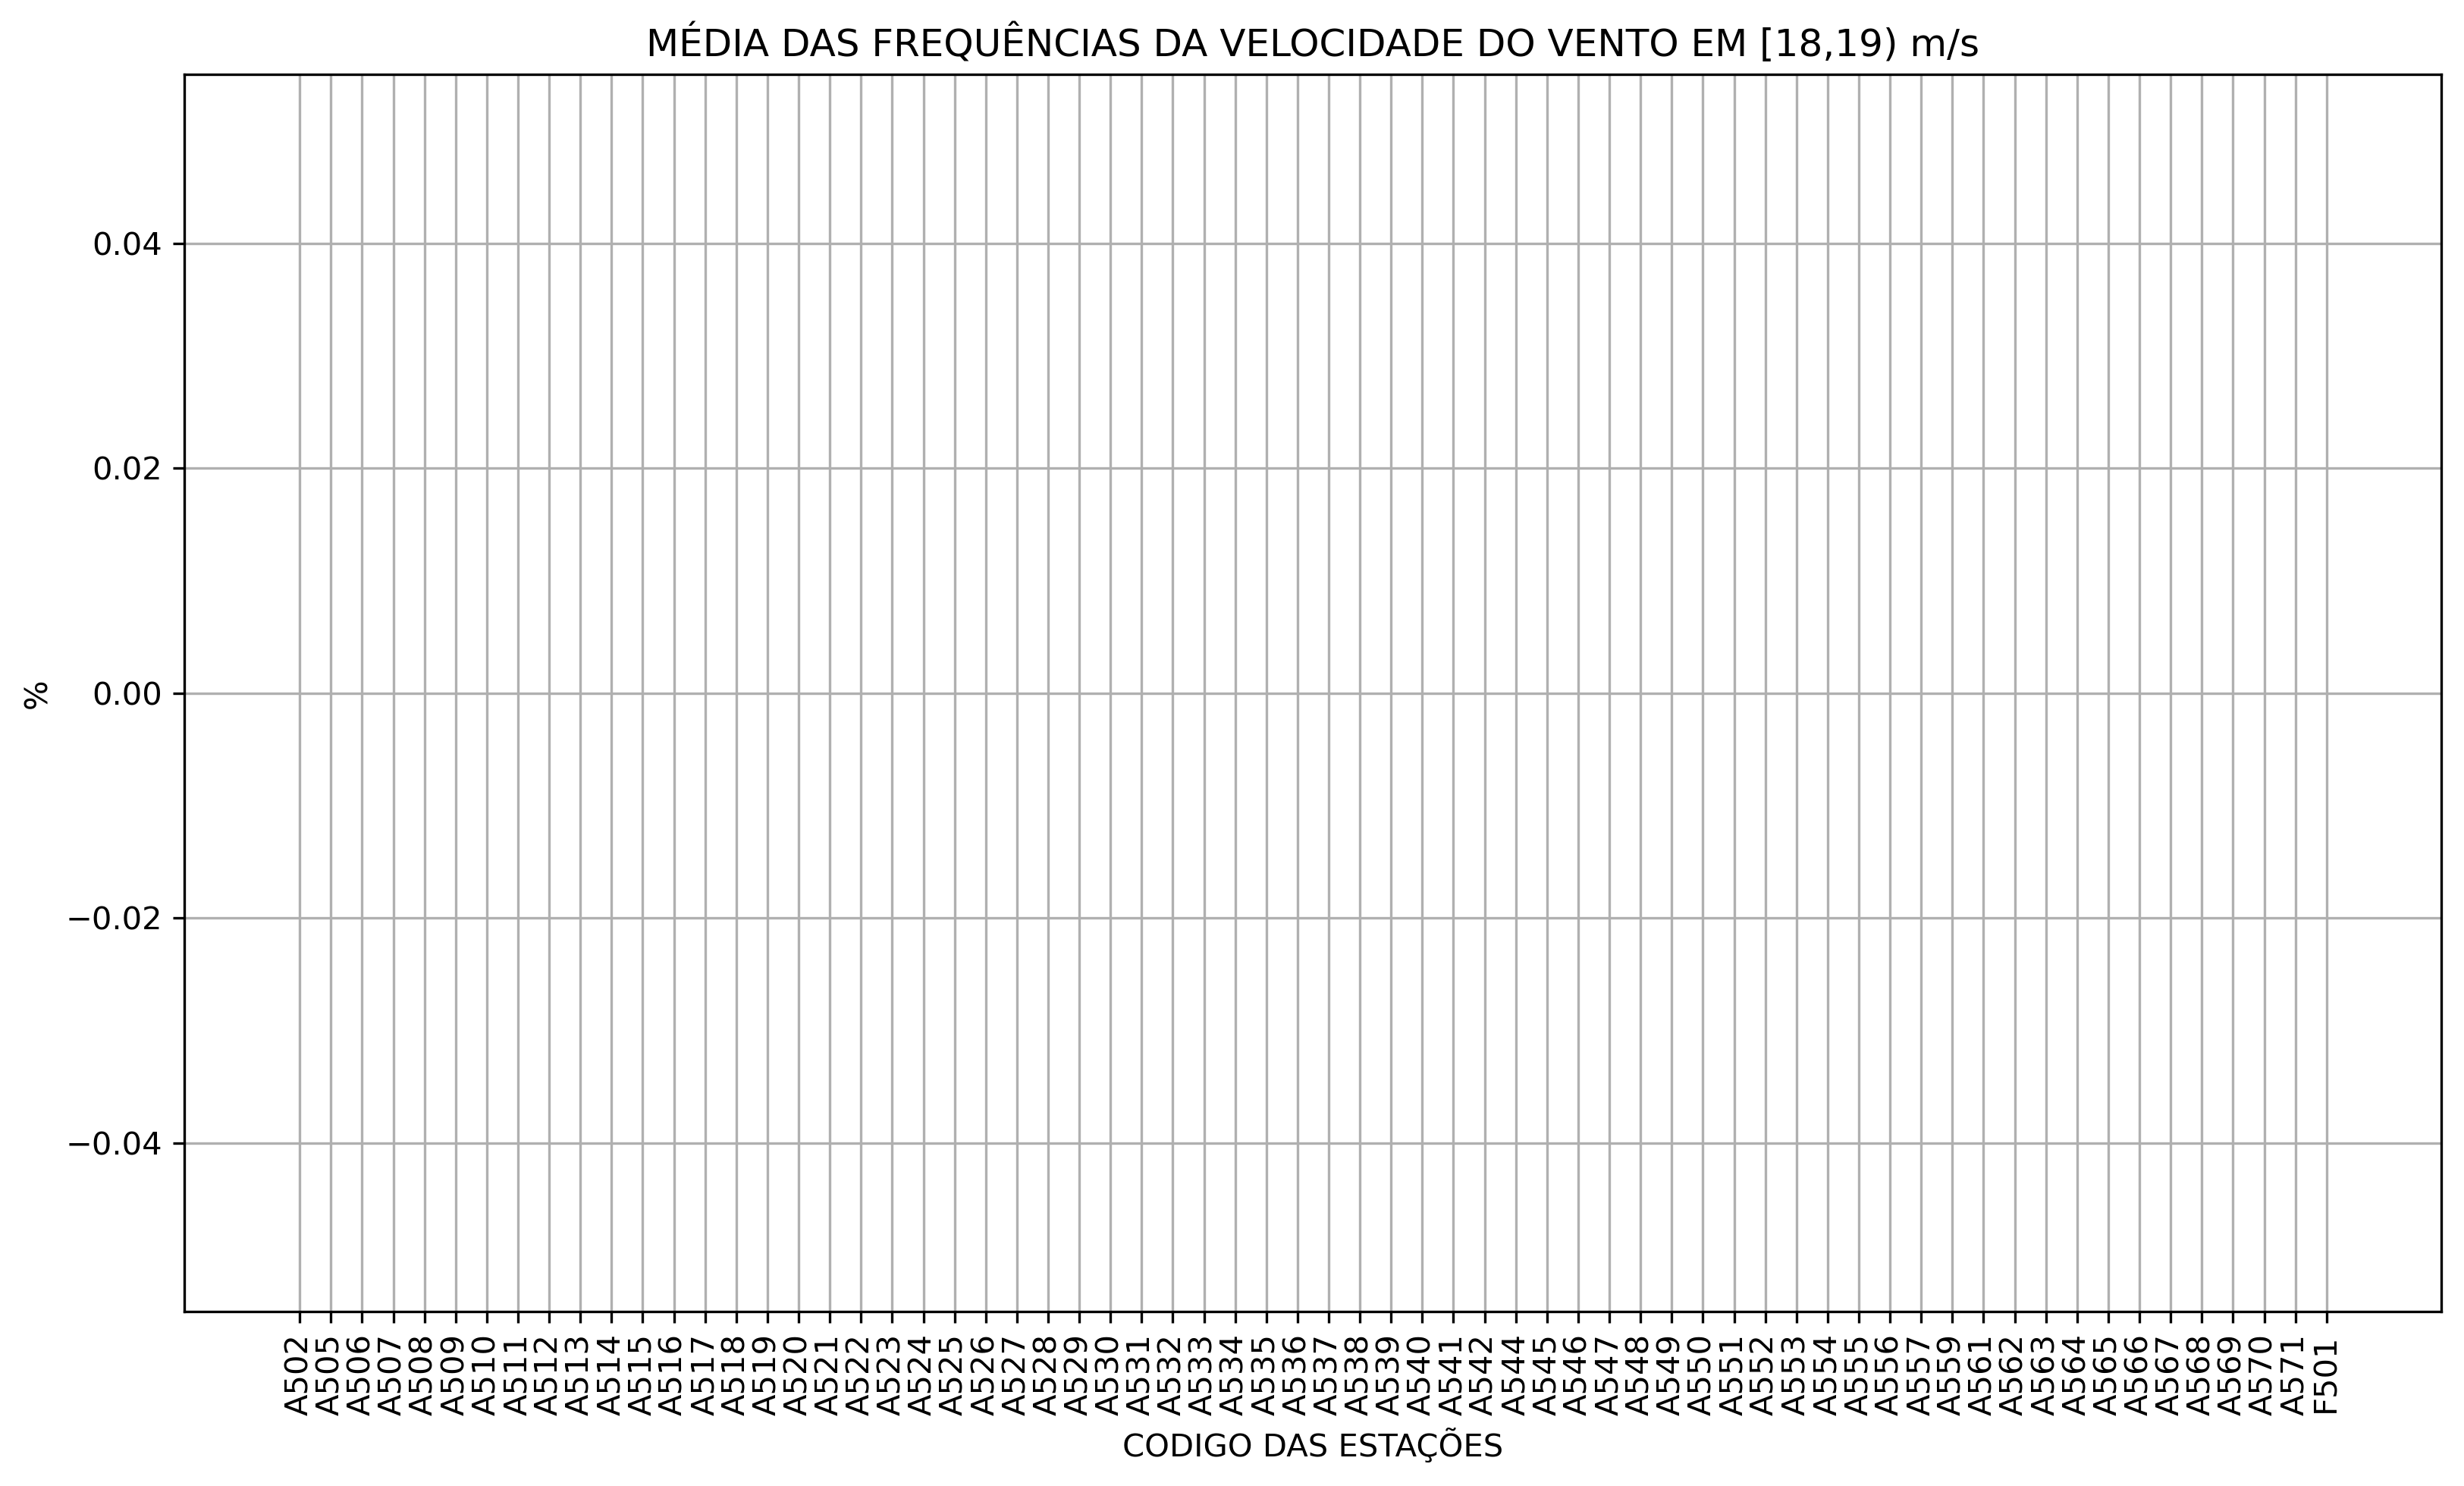

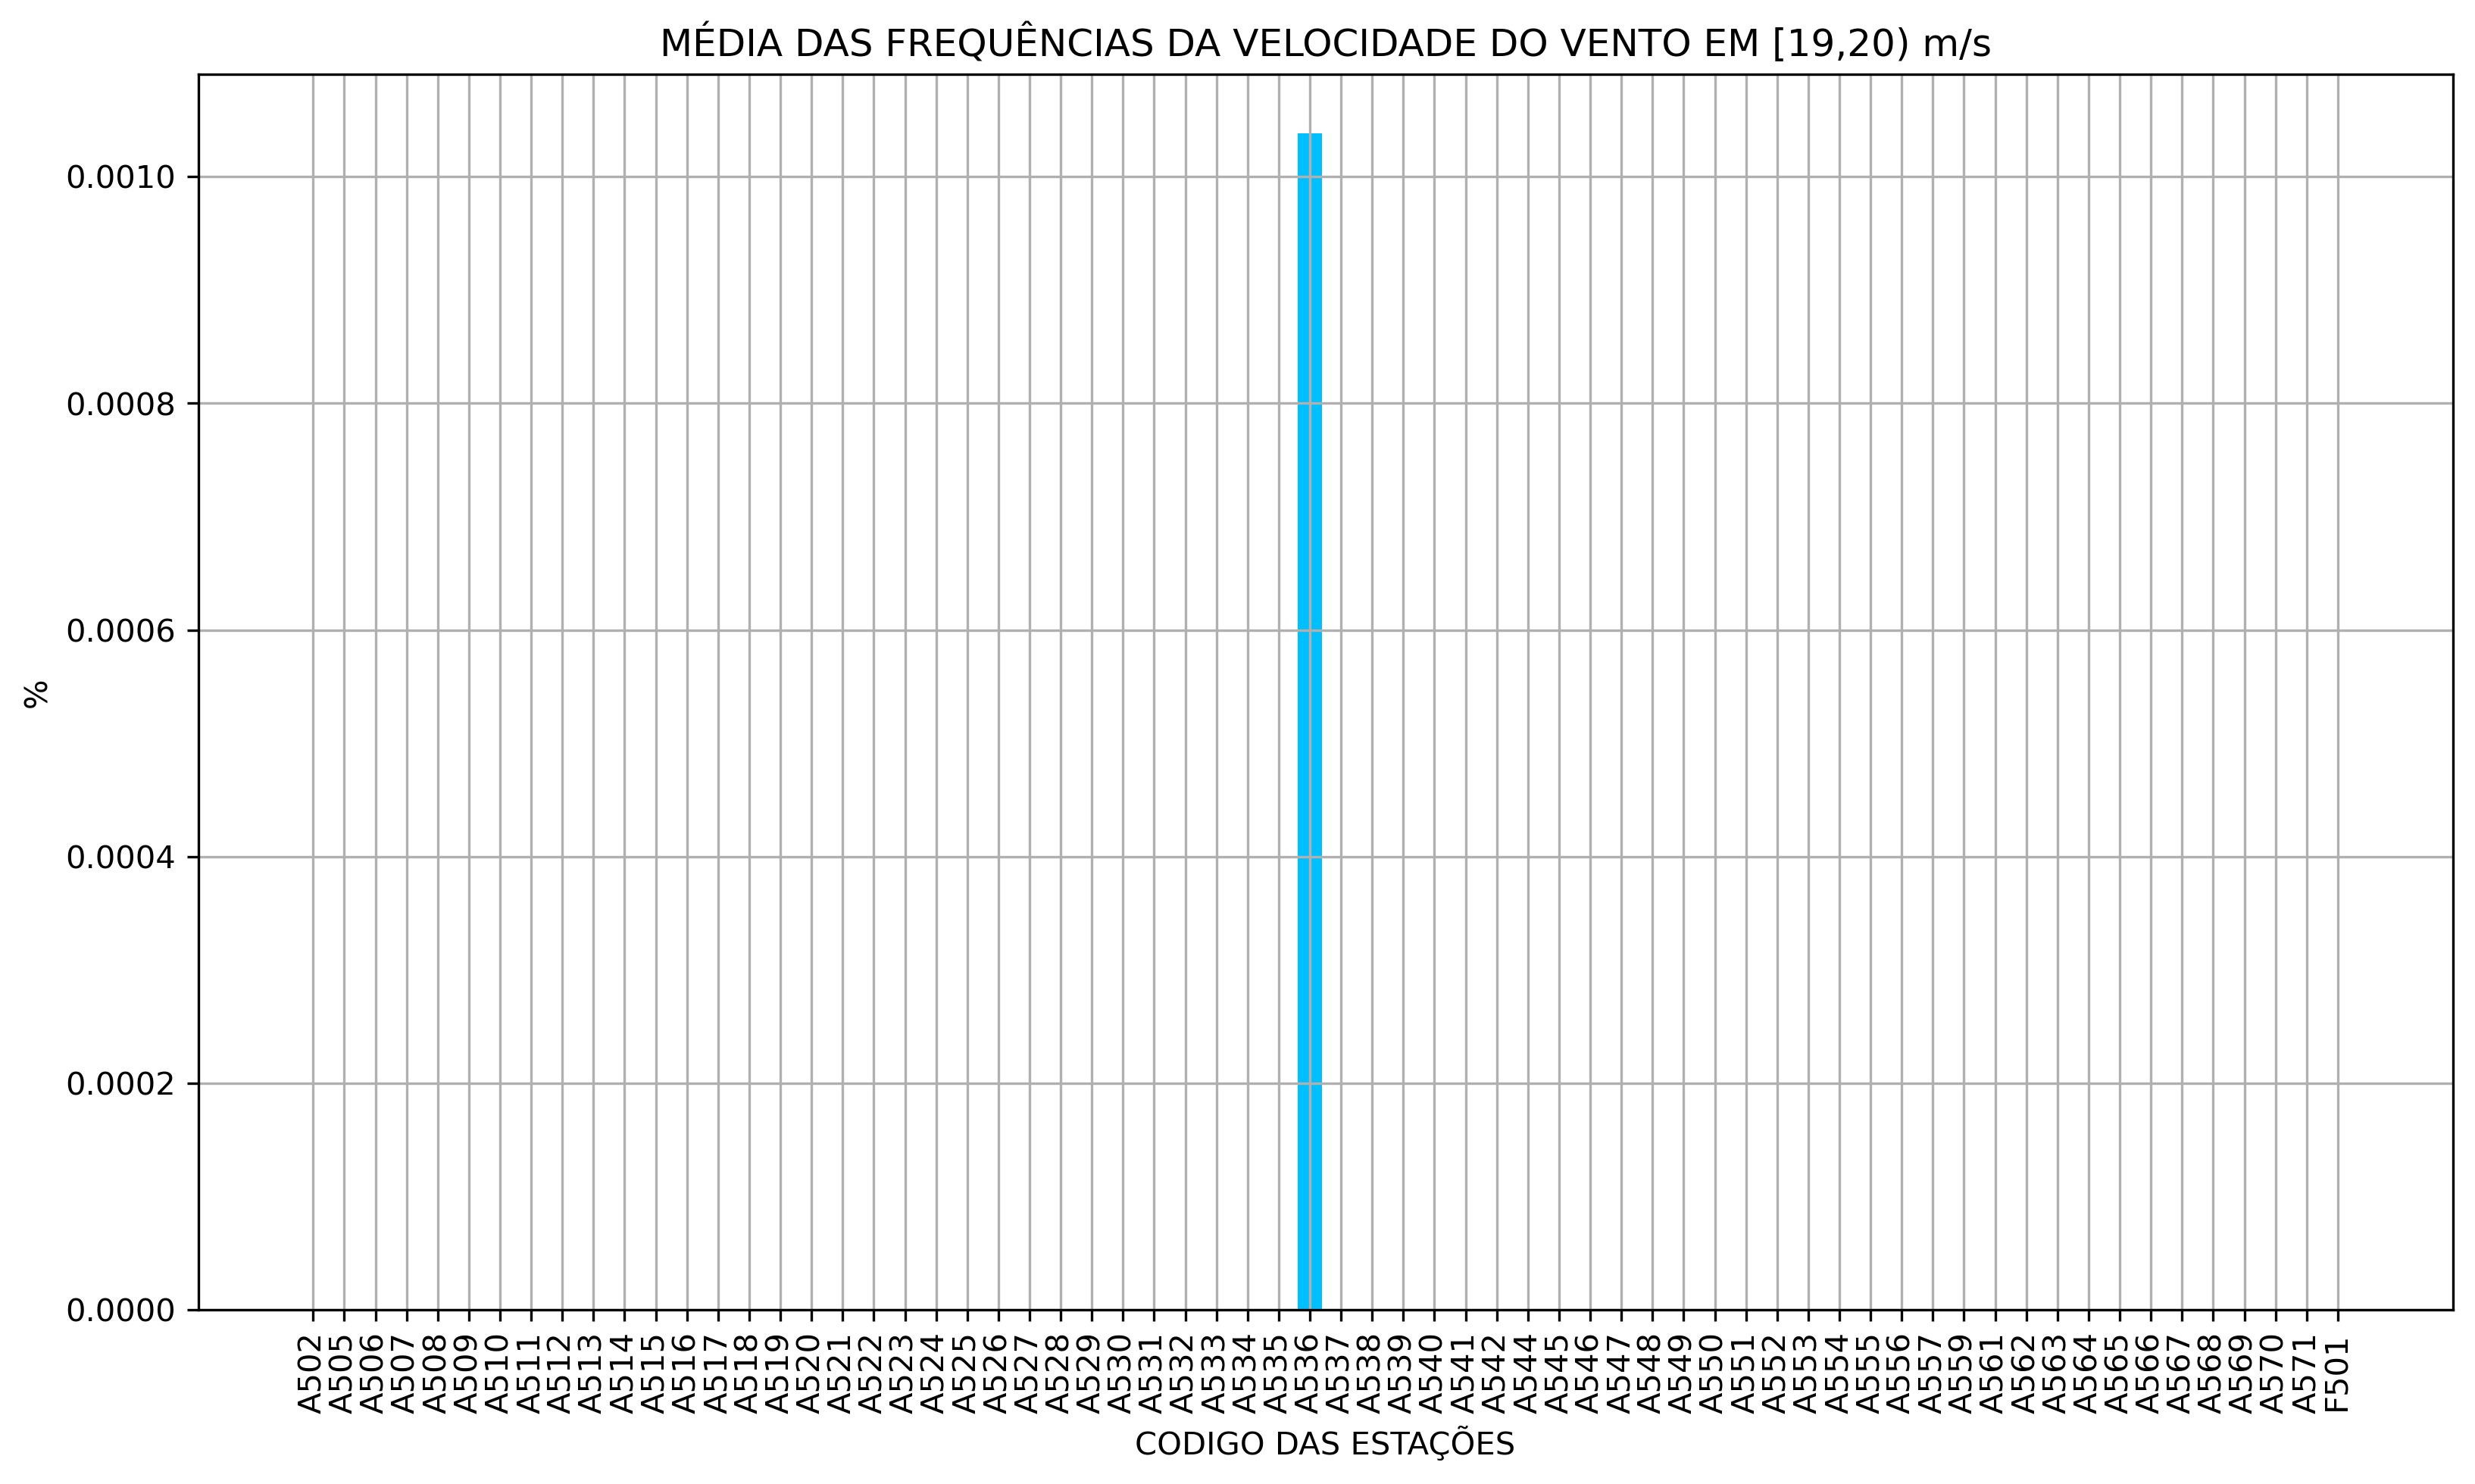

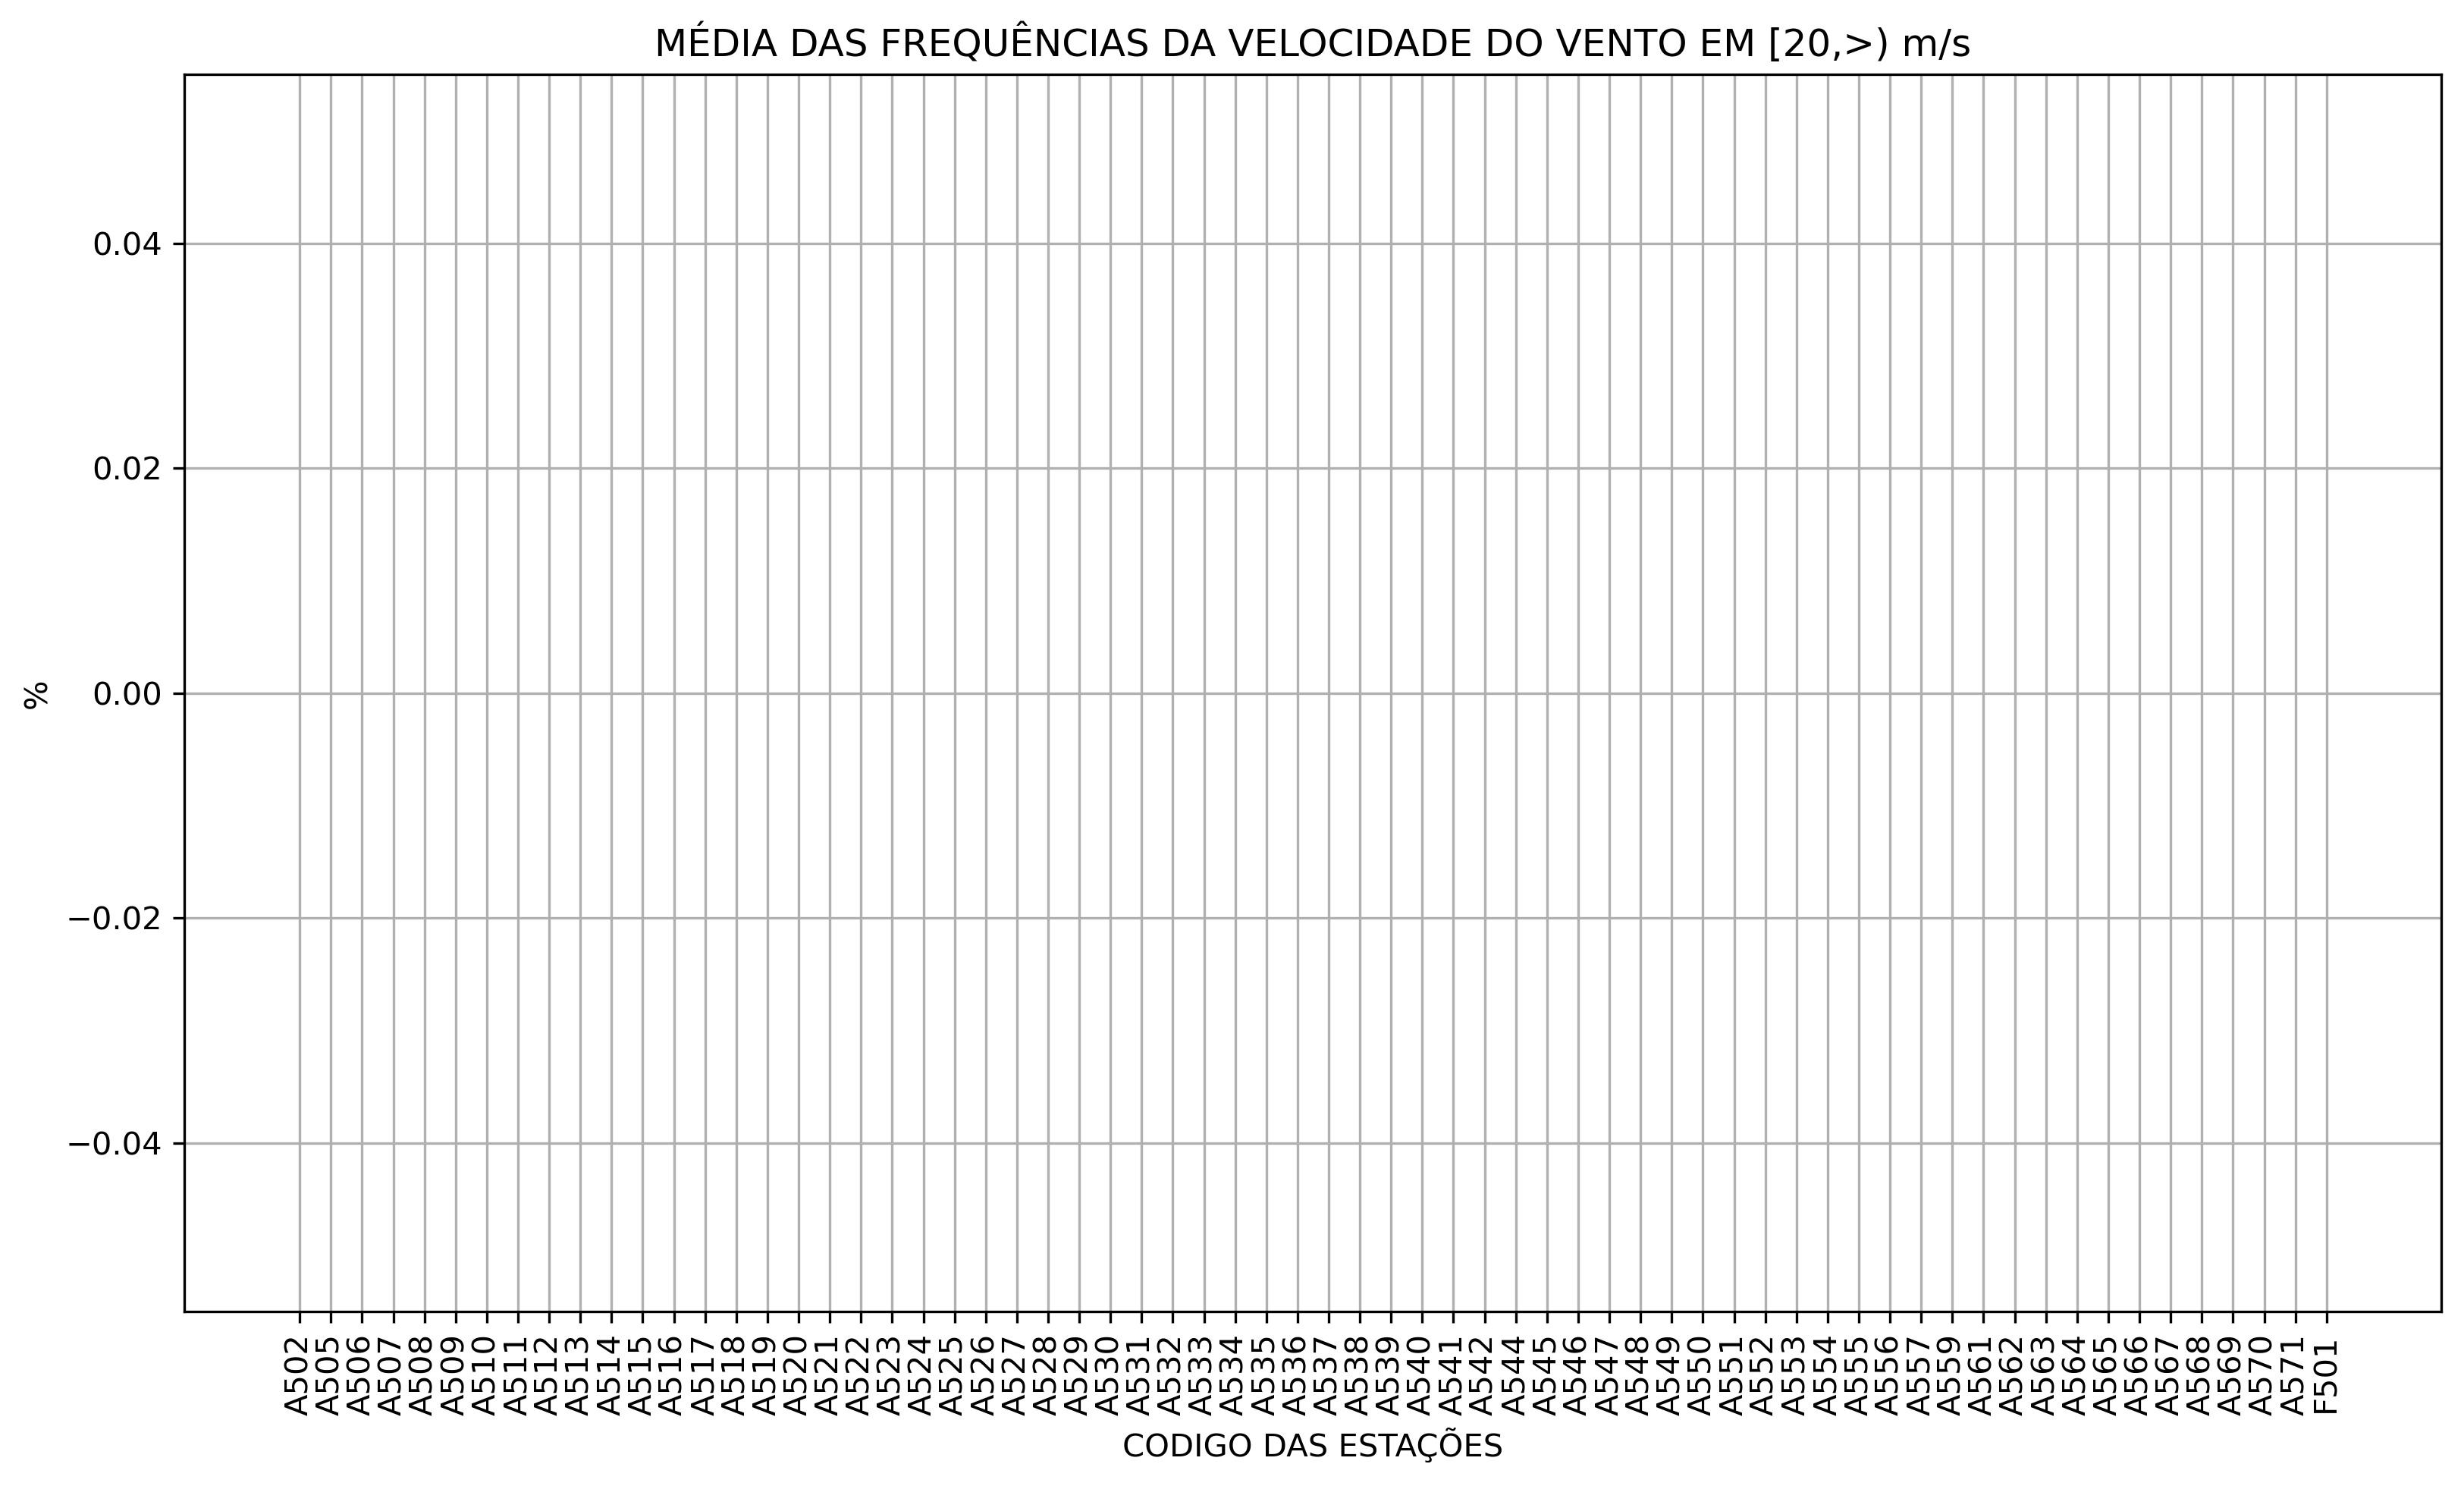

In [61]:
figuras = ['[0,2)', '[2,3)', '[3,4)', '[4,5)', '[5,6)', '[6,7)', '[7,8)',
       '[8,9)', '[9,10)', '[10,11)', '[11,12)', '[12,13)', '[13,14)',
       '[14,15)', '[15,16)', '[16,17)', '[17,18)', '[18,19)', '[19,20)',
       '[20,>)']

for i in figuras:

    fig, ax = plt.subplots(figsize=(12.8, 7.2), dpi=300)
    plt.bar(medias['codigo'],medias[i], color='#00BFFF')
    plt.xticks(medias['codigo'])
    plt.xticks(rotation=90)
    plt.xlabel('CODIGO DAS ESTAÇÕES')
    plt.ylabel('%')
    plt.title(f'MÉDIA DAS FREQUÊNCIAS DA VELOCIDADE DO VENTO EM {i} m/s')
    plt.grid()
    #plt.show()
    plt.savefig(f'figura {i}.png', format='png')

## CALCULANDO A PRODUÇÃO ESTIMADA

### CALCULAR O EAG

In [62]:
somatorio = pd.DataFrame(columns=['codigo','[0,2)', '[2,3)', '[3,4)', '[4,5)', '[5,6)', '[6,7)', '[7,8)',
       '[8,9)', '[9,10)', '[10,11)', '[11,12)', '[12,13)', '[13,14)',
       '[14,15)', '[15,16)', '[16,17)', '[17,18)', '[18,19)', '[19,20)',
       '[20,>)'])

In [63]:
somatorio.head()

,codigo,"[0,2)","[2,3)","[3,4)","[4,5)","[5,6)","[6,7)","[7,8)","[8,9)","[9,10)",...,"[11,12)","[12,13)","[13,14)","[14,15)","[15,16)","[16,17)","[17,18)","[18,19)","[19,20)","[20,>)"


In [64]:
# DADOS GENÉRICOS DE POTENCIA
potencia = [0,2,18,56,127,240,400,626,892,1223,1590,1830,1950,2050,2050,2050,2050,2050,2050,2050]

In [68]:
velocidade = {'[0,2)':potencia[0], '[2,3)':potencia[1], '[3,4)':potencia[2],\
       '[4,5)':potencia[3], '[5,6)':potencia[4], '[6,7)':potencia[5], '[7,8)':potencia[6],\
              '[8,9)':potencia[7],'[9,10)':potencia[8],'[10,11)':potencia[9],'[11,12)':potencia[10],\
              '[12,13)':potencia[11], '[13,14)':potencia[12],'[14,15)':potencia[13], '[15,16)':potencia[14],\
                     '[16,17)':potencia[15], '[17,18)':potencia[16], '[18,19)':potencia[17], '[19,20)':potencia[18],\
                            '[20,>)':potencia[19]}


In [69]:
indices = ['[0,2)', '[2,3)', '[3,4)', '[4,5)', '[5,6)', '[6,7)', '[7,8)',
       '[8,9)', '[9,10)', '[10,11)', '[11,12)', '[12,13)', '[13,14)',
       '[14,15)', '[15,16)', '[16,17)', '[17,18)', '[18,19)', '[19,20)',
       '[20,>)']

In [70]:

for a in codigos['codigo']:
    lista = [a]
    for i in indices:
        valor = medias[i].loc[medias['codigo']==a].apply(lambda x: x*velocidade[i])
        for i in valor:
            lista.append(i)
    somatorio.loc[len(somatorio)] = lista
        

In [71]:
somatorio.head()

,codigo,"[0,2)","[2,3)","[3,4)","[4,5)","[5,6)","[6,7)","[7,8)","[8,9)","[9,10)",...,"[11,12)","[12,13)","[13,14)","[14,15)","[15,16)","[16,17)","[17,18)","[18,19)","[19,20)","[20,>)"
0,A502,0.0,54.308926,219.193331,234.112124,160.855297,74.319809,26.927325,6.018257,1.851402,...,1.654217,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A505,0.0,54.983268,417.225902,563.818698,396.760167,182.806192,70.880015,16.963717,7.468675,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A506,0.0,39.958079,216.370940,280.376699,169.499156,67.593880,16.566118,1.952142,2.657941,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A507,0.0,56.446198,202.596855,136.274635,34.189372,4.241514,2.079617,0.000000,0.000000,...,0.000000,1.917736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A508,0.0,41.222800,188.261960,191.840742,111.949358,44.001392,11.505991,1.951400,0.000000,...,1.688615,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
list_col = list(somatorio)

In [73]:
somatorio['soma'] = somatorio[list_col].sum(axis=1)

/tmp/ipykernel_7006/3817319077.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  somatorio['soma'] = somatorio[list_col].sum(axis=1)


In [74]:
somatorio['kwh'] = somatorio['soma'].apply(lambda x: x*8760)

In [75]:
somatorio.to_excel(salvarSheet,sheet_name='potencia')

In [77]:
salvarSheet.save()

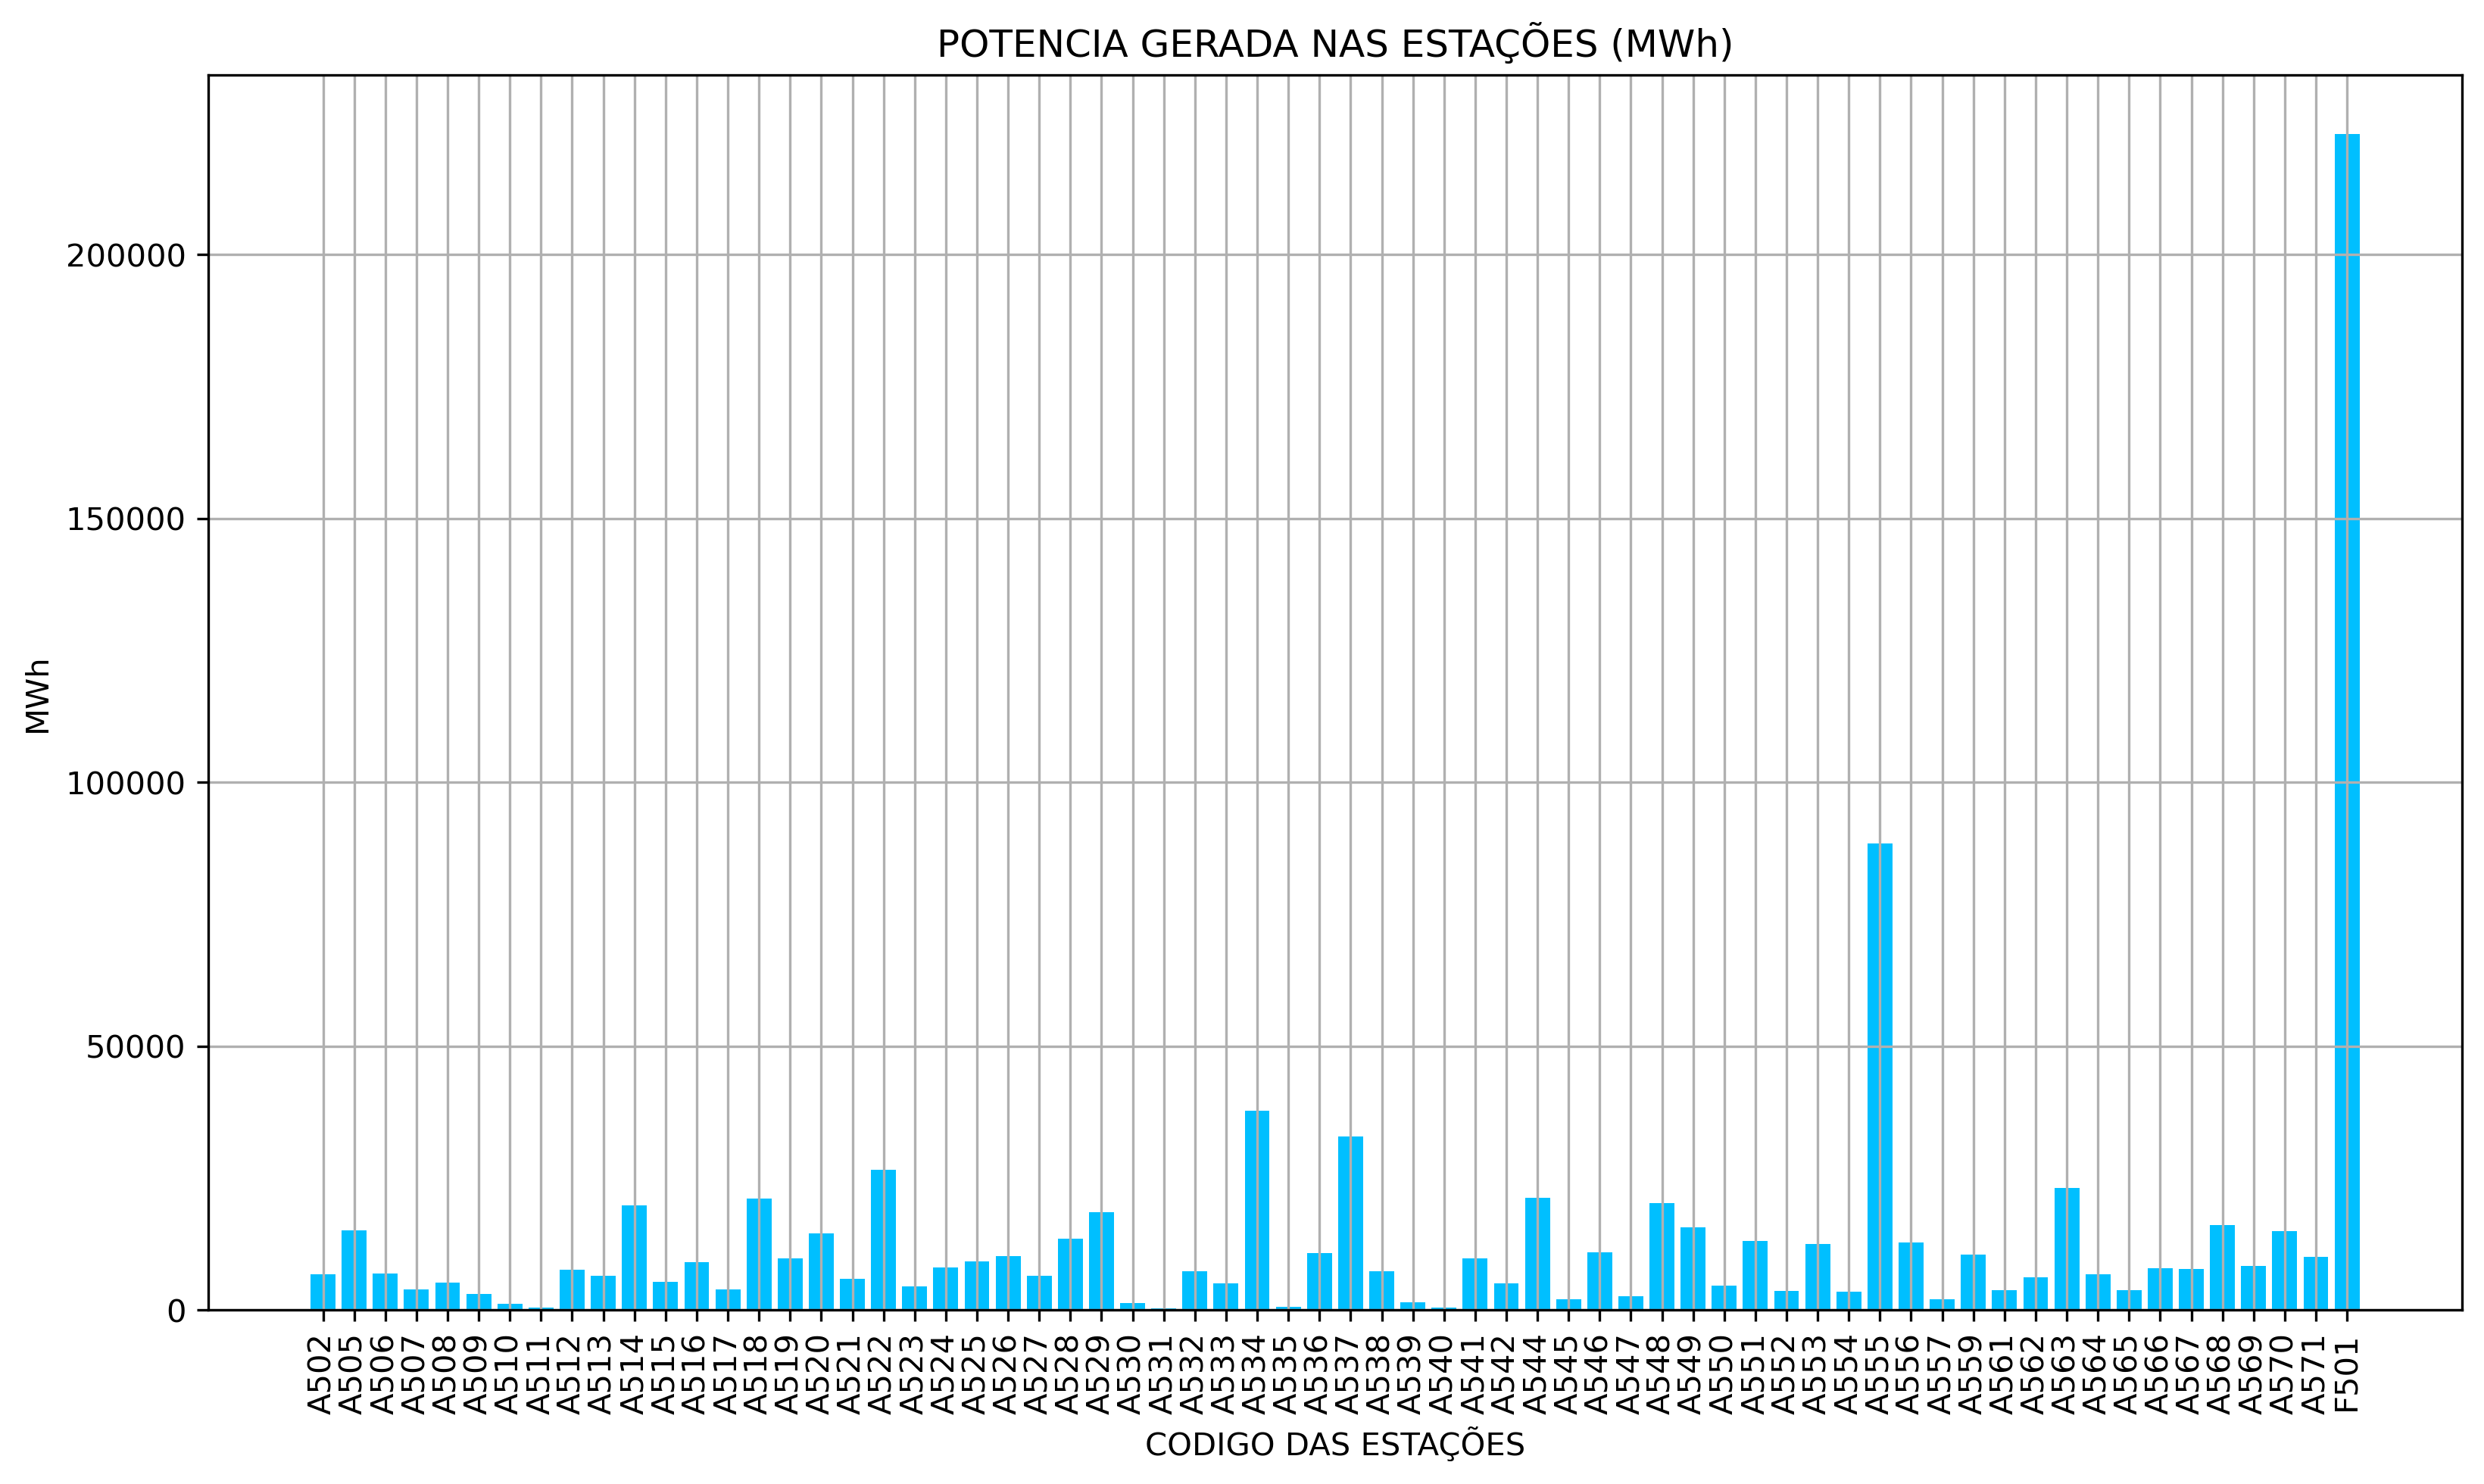

In [76]:
fig, ax = plt.subplots(figsize=(12.8, 7.2), dpi=300)
plt.bar(somatorio['codigo'],somatorio['kwh'].apply(lambda x: x/1000), color='#00BFFF')
plt.xticks(somatorio['codigo'])
plt.xticks(rotation=90)
plt.xlabel('CODIGO DAS ESTAÇÕES')
plt.ylabel('MWh')
plt.title(f'POTENCIA GERADA NAS ESTAÇÕES (MWh)')
plt.grid()
#plt.show()
plt.savefig(f'potencia gerada.png', format='png')